# NACA0012

## 无量纲化
来流条件：
$$p_0 = 75446 Pa ,\quad \rho_0 = 1.248 kg/m^3, \quad u_0 = 203.65 m/s, \quad Ma = 0.7, \quad T = 283.24 $$

$$ L_\inf = 1m,\quad p^* = \frac{p}{\rho_\infty u_\infty^2} = 1.458, u_\infty = 1,\rho_\infty = 1 , T^* = T/T_{\infty}$$

$$ \mu^* = \frac{\mu}{\mu_\infty}, \quad T^* = \frac{T}{T_\infty}, \quad e^* = \frac{e}{v_\infty}, Re = \frac{\rho_\infty u_\infty L}{\mu_\infty}, M = \frac{u_\infty}{\sqrt{\gamma RT_\infty}}, Pr = \frac{c_p \mu}{k} $$

$$ p^* = (\gamma -1) \rho^* e^*, T^* = \frac{\gamma M^2 p^*}{\rho^*}$$

## NS equation

$$\frac{\partial {\bf u}}{\partial t} + \frac{\partial { \bf f}}{\partial x} +\frac{\partial { \bf g }}{\partial y} = \frac{\partial {\bf s_x}}{\partial x} + \frac{\partial {\bf s_y}}{\partial y} $$

$${\bf u} = (\rho,\rho u,\rho v, E)^T$$, $$ {\bf f} = (\rho u, \rho u^2,\rho u v,(E+p)u)^T $$
$${\bf g} = (\rho v, \rho u v,\rho v^2+p, (E+p)v)^T$$
$${\bf s_x} = \frac{1}{Re}(0,\tau_{xx},\tau_{xy},\tau_{xx}u+\tau_{xy}v-q_x)^T$$
$${\bf s_y} = \frac{1}{Re}(0,\tau_{yx},\tau_{yy},\tau_{yx}u+\tau_{yy}v-q_y)^T$$

$$ E = \rho e + \frac{1}{2}\rho(u^2 +v^2) $$
$$ e = \frac{1}{\gamma -1} \frac{p}{\rho}$$
$$ p = \rho R T$$
$$\tau_{xx} = 2/3\mu(2u_x - v_y)$$
$$\tau_{yy} = 2/3\mu(2v_y - u_x)$$
$$\tau_{xy} =\tau_{yx} = \mu (u_y + v_x)$$
$$q_x = -\frac{c_p \mu}{Pr Re}\frac{\partial T}{\partial x}$$
$$q_y = -\frac{c_p \mu}{Pr Re}\frac{\partial T}{\partial y}$$

$$ p = \rho R T$$

## 简化
$$ U2_t = (\rho u)_t = \rho_t u+u_t \rho$$
$$ p_t = \rho_t R T + \rho R T_t $$
$$ U3_t = E_t = 1/(\gamma -1) p_t + 1/2 \rho_t (u^2 + v^2) + \rho (uu_t + vv_t) $$ 
$$ F1_x = \rho_x u + \rho u_x $$
$$ F2_x = \rho_x u^2 + 2\rho u u_x$$
$$ F3_x = \rho_x uv + \rho u v_x + \rho u_x v$$
$$ F4_x = (E_x +p_x) u + (E + p) u_x v$$

$$ S1_{xx} = 0 $$
$$ S2_{xx} = \frac{1}{Re} \left(2/3\mu_x(2u_x -v_y) + 2/3 \mu (2u_{xx} -v_{xy})\right) $$
$$ S3_{xx} = \frac{1}{Re} \left(\mu_x(u_y +v_x) + \mu (u_{xy} +v_{xx})\right) $$
$$ S4_{xx} =  S2_{xx} u + S3_{xx} v + \tau_{xx} u_x +\tau_{xy}v_x + q_{xx}  $$

$$ q_{xx} = \frac{c_P}{Pr Re}  (\mu_x T_x + \mu T_{xx})$$

## 粘性系数

$$\mu = \frac{\mu_0}{T_0^{3/2}} T^{3/2}\frac{T_0+S}{T+S}$$

$$\mu_x = \frac{\mu_0(T_0 +S) }{T_0^{3/2}} \frac{\sqrt{T}(T+3S)}{2(T+S)^2} T_x$$

## 非守恒NS

$$\frac{\partial \rho}{\partial t} + u \frac{\partial \rho}{\partial x} + v{\partial \rho}{\partial y} + \rho \Delta = 0 $$
$$ \rho(\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + u\frac{\partial u}{\partial x} + \frac{\partial p}{\partial x} = \frac{\mu}{\Re}(4/3 v_{yy} - 2/3 u_{xy} +v_{xy}+u_{yy}+4/3 u_{xx}-2/3v_{xy})

## 数据

$$ y= \pm 0.594689181 \cdot (0.298222773 \cdot \sqrt{x} - 0.127125232 \cdot x \\ - 0.357907906 \cdot x^2 + 0.291984971 \cdot x^3 - 0.105174606 \cdot x^4 )
$$

In [1]:
def Naca0012data(x):
    a = 0.594689181
    b = 0.298222773  
    c = 0.127125232 
    d = 0.357907906 
    e = 0.291984971 
    f = 0.105174606 
    y1 = a*(b*np.sqrt(x) - c*x-d*x**2+e*x**3 - f*x**4)
    y2 = -y1
    dy1 =  a*(0.5*b/np.sqrt(x) - c - 2*d*x +3*e*x**2 - 4*f*x**3)
    dy2 = -a*(0.5*b/np.sqrt(x) - c - 2*d*x +3*e*x**2 - 4*f*x**3)
    return y1,y2,dy1,dy2

## solver

In [2]:
import torch
import torch.nn as nn
import numpy as np
import time
import scipy.io
import matplotlib.pyplot as plt
from numpy import arange, meshgrid
#
from smt.sampling_methods import LHS
# Seeds
torch.manual_seed(123)
np.random.seed(123)
def train(epoch):
    model.train()
    def closure():
        optimizer.zero_grad()                                                     # Optimizer
        loss_pde = model.loss_pde(x_int_train)                                    # Loss function of PDE
        loss_ic = model.loss_ic(x_ic_train, rho_ic_train,u_ic_train,v_ic_train,p_ic_train)   # Loss function of IC
        loss_bdL = model.loss_bc(x_bcL_train, rho_bcL_train,u_bcL_train,v_bcL_train,p_bcL_train)   # Loss function of IC
       # loss_bdR = model.loss_bc1(x_bcR_train,rho_bcR_train,u_bcR_train,v_bcR_train,p_bcR_train)   # Loss function of IC
        #loss_cut = model.loss_bc1(x_cut_train,rho_cut_train,u_cut_train,v_cut_train,p_cut_train) 
        loss_bdI = model.bd_B(x_bcI_train, sin_bcI_train,cos_bcI_train)  

        loss_ib = loss_ic  +  loss_bdI #+loss_bdL
        loss = loss_pde + 10*loss_ib

        # Print iteration, loss of PDE and ICs
        print(f'epoch {epoch} loss_pde:{loss_pde:.8f}, loss_ib:{loss_ib:.8f}')
        loss.backward()
        return loss

    # Optimize loss function
    loss = optimizer.step(closure)
    loss_value = loss.item() if not isinstance(loss, float) else loss
    # Print total loss
    print(f'epoch {epoch}: loss {loss_value:.6f}')
    
# Calculate gradients using torch.autograd.grad
def gradients(outputs, inputs):
    return torch.autograd.grad(outputs, inputs,grad_outputs=torch.ones_like(outputs), create_graph=True)

# Convert torch tensor into np.array
def to_numpy(input):
    if isinstance(input, torch.Tensor):
        return input.detach().cpu().numpy()
    elif isinstance(input, np.ndarray):
        return input
    else:
        raise TypeError('Unknown type of input, expected torch.Tensor or ' \
                        'np.ndarray, but got {}'.format(type(input)))
def IC(x):
    N =x.shape[0]
    rho_init = np.zeros((x.shape[0]))                                              # rho - initial condition
    u_init = np.zeros((x.shape[0]))                                                # u - initial condition
    v_init = np.zeros((x.shape[0]))                                                # u - initial condition
    p_init = np.zeros((x.shape[0]))                                                # p - initial condition
    
    gamma = 1.4
    rho1 = 1.0
    p1 =  1.458
    v1 = 0.0
    u1 = 1.0
    
    rho2 = 1.0
    p2 = 1.
    v2 = 0.0
    #u1 = ms*npsqrt(gamma)
    u2 = 0.0
    # rho, p - initial condition
    for i in range(N):
        rho_init[i] = rho1
        u_init[i] =   u1
        v_init[i] =  v1
        p_init[i] =  p1
    return rho_init, u_init, v_init,p_init

def BC_L(x):
    N =x.shape[0]
    rho_init = np.zeros((x.shape[0]))                                              # rho - initial condition
    u_init = np.zeros((x.shape[0]))                                                # u - initial condition
    v_init = np.zeros((x.shape[0]))                                                # u - initial condition
    p_init = np.zeros((x.shape[0]))                                                # p - initial condition
    
    gamma = 1.4
    #u1 = ms*npsqrt(gamma)
    # rho, p - initial condition
    rho1 = 1.00
    p1 =  1.458
    v1 = 0.0
    u1 = 1.0
    for i in range(N):
        rho_init[i] = rho1
        u_init[i] =  u1
        v_init[i] =  v1
        p_init[i] =  p1
    return rho_init, u_init, v_init,p_init
def BC_R(x):
    N =x.shape[0]
    rho_init = np.zeros((x.shape[0]))                                              # rho - initial condition
    u_init = np.zeros((x.shape[0]))                                                # u - initial condition
    v_init = np.zeros((x.shape[0]))                                                # u - initial condition
    p_init = np.zeros((x.shape[0]))                                                # p - initial condition
    
    gamma = 1.4
    ms = 2.0
    rho1 = 1.0
    p1 = 1.0
    v1 = 0.0
    u1 = 0
    # rho, p - initial condition
    for i in range(N):
        rho_init[i] = rho1
        u_init[i] = u1
        v_init[i] = v1
        p_init[i] = p1

    return rho_init, u_init, v_init,p_init
def BC_Cut(x):
    N =x.shape[0]
    rho_init = np.zeros((x.shape[0]))
    u_init = np.zeros((x.shape[0]))
    v_init = np.zeros((x.shape[0]))
    p_init = np.zeros((x.shape[0]))
    
    gamma = 1.4
    ms = 2.0
    rho1 = 1.0
    p1 = 1.0
    v1 = 0.0
    u1 = 0
    # rho, p - initial condition
    for i in range(N):
        rho_init[i] = 10.01
        u_init[i] =  0
        v_init[i] = 0
        p_init[i] = 10.01

    return rho_init, u_init, v_init,p_init
    
class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()
        self.net = nn.Sequential()                                                  # Define neural network
        self.net.add_module('Linear_layer_1', nn.Linear(3, 90))                     # First linear layer
        self.net.add_module('Tanh_layer_1', nn.Tanh())                              # First activation Layer

        for num in range(2, 6):                                                     # Number of layers (2 through 7)
            self.net.add_module('Linear_layer_%d' % (num), nn.Linear(90, 90))       # Linear layer
            self.net.add_module('Tanh_layer_%d' % (num), nn.Tanh())                 # Activation Layer
        self.net.add_module('Linear_layer_final', nn.Linear(90, 4))                 # Output Layer

    # Forward Feed
    def forward(self, x):
        return self.net(x)

    def bd_B(self,x,sin,cos):
        yb = self.net(x)
        rhob,pb,ub,vb = yb[:, 0:1], yb[:, 1:2], yb[:, 2:3],yb[:,3:]
        drhob_g = gradients(rhob, x)[0]                                      # Gradient [u_t, u_x]
        rhob_x, rhob_y = drhob_g[:, 1:2], drhob_g[:, 2:3]                            # Partial derivatives u_t, u_x
        dub_g = gradients(ub, x)[0]                                      # Gradient [u_t, u_x]
        ub_x, ub_y = dub_g[:, 1:2], dub_g[:, 2:3]                            # Partial derivatives u_t, u_x
        dvb_g = gradients(vb, x)[0]                                      # Gradient [u_t, u_x]
        vb_x, vb_y = dvb_g[:, 1:2], dvb_g[:, 2:3]                            # Partial derivatives u_t, u_x
        dpb_g = gradients(pb, x)[0]                                      # Gradient [p_t, p_x]
        pb_x, pb_y = dpb_g[:, 1:2], dpb_g[:, 2:3]                            # Partial derivatives p_t, p_x
        
        deltau = ub_x + vb_y
        lam = 0.1*(abs(deltau) - deltau) + 1
        #lam = (deltau) - deltau) + 1
        
        fb = (((ub*cos + vb*sin)/lam)**2).mean() +\
            (((pb_x*cos + pb_y*sin)/lam)**2).mean() +\
            (((rhob_x*cos + rhob_y*sin)/lam)**2).mean()
        return fb
    def bd_OY(self,x):
        y = self.net(x)
        rho,p,u,v = y[:, 0:1], y[:, 1:2], y[:, 2:3],y[:,3:]
        
        drho_g = gradients(rho, x)[0]                                  # Gradient [rho_t, rho_x]
        rho_x,rho_y = drho_g[:, :1], drho_g[:, 1:2]                    # Partial derivatives rho_t, rho_x
        du_g = gradients(u, x)[0]                                      # Gradient [u_t, u_x]
        u_x, u_y = du_g[:, :1], du_g[:, 1:2]                            # Partial derivatives u_t, u_x
        dv_g = gradients(v, x)[0]                                      # Gradient [u_t, u_x]
        v_x, v_y = dv_g[:, :1], dv_g[:, 1:2]                            # Partial derivatives u_t, u_x
        dp_g = gradients(p, x)[0]                                      # Gradient [p_t, p_x]
        p_x, p_y = dp_g[:, :1], dp_g[:, 1:2]                            # Partial derivatives p_t, p_x
        
        deltau = u_x + v_y
        lam = 0.1*(abs(deltau) - deltau) + 1
        
        f = ((( u_y)/lam)**2).mean() +\
            ((( v_y)/lam)**2).mean() +\
            ((( p_y)/lam)**2).mean() +\
            ((( rho_y)/lam)**2).mean()
        return f
    
    def bd_OX(self,x):
        y = self.net(x)
        rho,p,u,v = y[:, 0:1], y[:, 1:2], y[:, 2:3],y[:,3:]
        
        drho_g = gradients(rho, x)[0]                                  # Gradient [rho_t, rho_x]
        rho_x,rho_y = drho_g[:, :1], drho_g[:, 1:2]                    # Partial derivatives rho_t, rho_x
        du_g = gradients(u, x)[0]                                      # Gradient [u_t, u_x]
        u_x, u_y = du_g[:, :1], du_g[:, 1:2]                            # Partial derivatives u_t, u_x
        dv_g = gradients(v, x)[0]                                      # Gradient [u_t, u_x]
        v_x, v_y = dv_g[:, :1], dv_g[:, 1:2]                            # Partial derivatives u_t, u_x
        dp_g = gradients(p, x)[0]                                      # Gradient [p_t, p_x]
        p_x, p_y = dp_g[:, :1], dp_g[:, 1:2]                            # Partial derivatives p_t, p_x
        
        deltau = u_x + v_y
        lam = 0.1*(abs(deltau) - deltau) + 1
        
        f = ((( u_x)/lam)**2).mean() +\
            ((( v_x)/lam)**2).mean() +\
            ((( p_x)/lam)**2).mean() +\
            ((( rho_x)/lam)**2).mean()
        return f
     
    # Loss function for PDE
    def loss_pde(self, x):
        
       # yL = self.net(x_intL_train)
       # yR = self.net(x_intR_train)
       # yU = self.net(x_intU_train)
       # yD = self.net(x_intD_train)
       # rhoL,pL,uL,vL = yL[:, 0:1], yL[:, 1:2], yL[:, 2:3],yL[:,3:]
       # rhoR,pR,uR,vR = yR[:, 0:1], yR[:, 1:2], yR[:, 2:3],yR[:,3:]
       # rhoU,pU,uU,vU = yU[:, 0:1], yU[:, 1:2], yU[:, 2:3],yU[:,3:]
       # rhoD,pD,uD,vD = yD[:, 0:1], yD[:, 1:2], yD[:, 2:3],yD[:,3:]
        y = self.net(x)
        gamma = 1.4                                                    # Heat Capacity Ratio
        epsilon = 1e-5
        rho,T,u,v = y[:, 0:1], y[:, 1:2], y[:, 2:3],y[:,3:]
        
        drho_g = gradients(rho,x)[0]
        rho_t,rho_x,rho_y = drho_g[:, :1],drho_g[:,1:2],drho_g[:,2:3]
        dT_g = gradients(T,x)[0]
        T_t,T_x,T_y = dT_g[:, :1],dT_g[:,1:2],dT_g[:,2:3]
        du_g = gradients(u,x)[0]
        u_t,u_x,u_y = du_g[:, :1],du_g[:,1:2],du_g[:,2:3]
        dv_g = gradients(v,x)[0]
        v_t,v_x,v_y = dv_g[:, :1],dv_g[:,1:2],dv_g[:,2:3]
        dux_g = gradients(u_x,x)[0]
        u_xx,u_xy = dux_g[:,1:2],dux_g[:,2:3]
        duy_g = gradients(u_y,x)[0]
        u_yy = duy_g[:,2:3]
        dvx_g = gradients(v_x,x)[0]
        v_xx,v_xy = dvx_g[:,1:2],dvx_g[:,2:3]
        dvy_g = gradients(v_y,x)[0]
        v_yy = dvy_g[:,2:3]
        
        Re = 500
        Pr = 0.72
        R = 287
        
        Ma = 0.7
        gamma = 1.4
        
        p = 1/gamma/Ma**2 *rho *T
        e =  p/(gamma - 1)
        E = rho*e + 0.5*rho*(u**2+v**2)
        
        p_t = 1/(gamma*Ma**2)*(rho_t*T+T_t*rho)
        p_x = 1/(gamma*Ma**2)*(rho_x*T+T_x*rho)
        p_y = 1/(gamma*Ma**2)*(rho_y*T+T_y*rho)
        E_y = rho_y*e + rho*p_y/(gamma -1) + 0.5*rho_y*(u**2+v**2) + \
               rho*(u_y*u + v_y*v)
        
        U1_t = rho_t
        U2_t = rho_t*u + rho*u_t
        U3_t = rho_t*v + rho*v_t
        U4_t = rho_t*e + rho*p_t/(gamma -1) + 0.5*rho_t*(u**2+v**2) + \
               rho*(u_t*u + v_t*v)
            
        
        f1_x = rho_x*u + u_x*rho
        f2_x = rho_x*u**2 + 2*rho*u*u_x + p_x
        f3_x = rho_x*u*v + rho*u_x*v + rho*u*v_x
        f4_x = u_x*(E+p) +u*(E_x + p_x)
        
        g1_y = rho_y*u + u_y*rho
        g2_y = rho_y*u**2 + 2*rho*u*u_y + p_y
        g3_y = rho_y*u*v + rho*u_y*v + rho*u*v_y
        g4_y = u_y*(E+p) +u*(E_y + p_y)
        
        
        
        
        rhoE = p/(gamma - 1) +0.5*rho*(u**2+v**2)
        
        f1 = rho*u
        f2 = rho*u*u+p
        f3 = rho*u*v
        f4 = (rhoE+p)*u
        
        g1 = rho*v
        g2 = rho*v*u
        g3 = rho*v*v + p
        g4 = (rhoE+p)*v
        
        drho_g = gradients(rho,x)[0]
        U1_t = drho_g[:, :1]
        dU2_g = gradients(f1,x)[0]
        U2_t = dU2_g[:, :1]
        dU3_g = gradients(g1,x)[0]
        U3_t = dU3_g[:, :1]
        dU4_g = gradients(rhoE,x)[0]
        U4_t = dU4_g[:, :1]
        
        df1_g = gradients(f1, x)[0]                                  # Gradient [rho_t, rho_x]
        f1_x = df1_g[:, 1:2]
        df2_g = gradients(f2, x)[0]                                      # Gradient [u_t, u_x]
        f2_x = df2_g[:, 1:2]
        df3_g = gradients(f3, x)[0]                                      # Gradient [u_t, u_x]
        f3_x = df3_g[:, 1:2]
        df4_g = gradients(f4, x)[0]                                      # Gradient [u_t, u_x]
        f4_x = df4_g[:, 1:2]
        
        dg1_g = gradients(g1, x)[0]                                  # Gradient [rho_t, rho_x]
        g1_y = dg1_g[:, 2:3]
        dg2_g = gradients(g2, x)[0]                                      # Gradient [u_t, u_x]
        g2_y = dg2_g[:, 2:3]
        dg3_g = gradients(g3, x)[0]                                      # Gradient [u_t, u_x]
        g3_y = dg3_g[:, 2:3]
        dg4_g = gradients(g4, x)[0]                                      # Gradient [u_t, u_x]
        g4_y = dg4_g[:, 2:3]
        
        
        du_g = gradients(u, x)[0]                                
        u_x = du_g[:, 1:2]         
        dv_g = gradients(v, x)[0]                    
        v_y = dv_g[:, 2:3]         
        
      #  rho,p,u,v = y[:, 0:1], y[:, 1:2], y[:, 2:3],y[:,3:]
      #  gamma = 1.4                                                    # Heat Capacity Ratio
      #  epsilon = 1e-5
      #  s = torch.log((abs(p)+epsilon)/(abs(rho)+epsilon)**1.4)
      #  eta = -rho*s
      #  phi1 = -rho*u*s
      #  phi2 = -rho*v*s
      #  
      #  drho_g = gradients(rho, x)[0]                                  # Gradient [rho_t, rho_x]
      #  rho_t, rho_x,rho_y = drho_g[:, :1], drho_g[:, 1:2],drho_g[:,2:]
      #  du_g = gradients(u, x)[0]                                      # Gradient [u_t, u_x]
      #  u_t, u_x, u_y = du_g[:, :1], du_g[:, 1:2], du_g[:,2:]                            # Partial derivatives u_t, u_x
      #  dv_g = gradients(v, x)[0]                                      # Gradient [u_t, u_x]
      #  v_t, v_x, v_y = dv_g[:, :1], dv_g[:, 1:2], dv_g[:,2:]                            # Partial derivatives u_t, u_x
      #  
      #  E = p/0.4 + 0.5*rho*(u**2+v**2)
      #  EL = pL/0.4 + 0.5*rhoL*(uL**2+vL**2)
      #  ER = pR/0.4 + 0.5*rhoR*(uR**2+vR**2)
      #  EU = pU/0.4 + 0.5*rhoU*(uU**2+vU**2)
      #  ED = pD/0.4 + 0.5*rhoD*(uD**2+vD**2)
      #  dE_g = gradients(E, x)[0]                                      # Gradient [u_t, u_x]
      #  E_t = dE_g[:, :1]
      #  
      #  
      #  deta_g = gradients(eta, x)[0]                                      # Gradient [p_t, p_x]
      #  eta_t, eta_x,eta_y = deta_g[:, :1], deta_g[:, 1:2],deta_g[2:3]                            # Partial derivatives p_t, p_x
      #  dphi1_g = gradients(phi1, x)[0]                                      # Gradient [p_t, p_x]
      #  dphi2_g = gradients(phi2, x)[0]                                      # Gradient [p_t, p_x]
      #  phi1_t, phi1_x,phi1_y = dphi1_g[:, :1], dphi1_g[:, 1:2],dphi1_g[:,2:3]                           # Partial derivatives p_t, p_x
      #  phi2_t, phi2_x,phi2_y = dphi2_g[:, :1], dphi2_g[:, 1:2],dphi2_g[:,2:3]                           # Partial derivatives p_t, p_x
        
        d = np.random.rand()
        deltau = u_x + v_y
        nab = abs(deltau) - deltau
        
        #a = np.sqrt(1.4*p/rho)
       # q = 0.01*(rho*deltau**2)
        
        d = 1.0
        lam = d*(0.1*nab) + 1
        #lam = d + 1
       # lam = 1/lam
        
        f = (((U1_t + f1_x+g1_y )/lam)**2).mean() +\
            (((U2_t + f2_x+g2_y )/lam)**2).mean() +\
            (((U3_t + f3_x+g3_y )/lam)**2).mean() +\
            (((U4_t + f4_x+g4_y )/lam)**2).mean()

      #  p = p+q
        
      #  dp_g = gradients(p, x)[0]                                      # Gradient [p_t, p_x]
      #  p_t, p_x, p_y = dp_g[:, :1], dp_g[:, 1:2], dp_g[:,2:]                            # Partial derivatives p_t, p_x
      #  
      #  s1 = rho_t + (rhoR*uR - rhoL*uL)/0.02 +  (rhoU*uU - rhoD*uD)/0.02 
      #  s2 = u*rho_t + u_t*rho + (rhoR*uR*uR +pR - rhoL*uL*uL-pL)/0.02 \
      #       +(rhoU*uU*vU - rhoD*uD*vD)/0.02 
      #  s3 = v*rho_t + v_t*rho + (rhoU*vU*vU +pU - rhoD*vD*vD-pD)/0.02 \
      #       +(rhoR*uR*vR - rhoL*uL*vL)/0.02 
      #  s4 = E_t + ((ER+pR)*uR - (EL+pL)*uL)/0.02 + ((EU+pU)*vU - (ED+pD)*vD)/0.02 
      #  
      #  du_gg = gradients(u_x, x)[0]                                      # Gradient [u_t, u_x]
      #  u_xx, u_xy = du_gg[:, :1], du_gg[:, 1:2]                            # Partial derivatives u_t, u_x
      #  
      #  dv_gg = gradients(v_y, x)[0]                                      # Gradient [u_t, u_x]
      #  v_yx, v_yy = dv_gg[:, :1], dv_gg[:, 1:2]                            # Partial derivatives u_t, u_x
      #  
      #  vis = -0.1*(u_xx + v_yy)
#
      #  f = (((rho_t+rho*deltau+u*rho_x + v*rho_y)/lam)**2).mean() +\
      #      (((rho*u_t+rho*u*u_x+rho*v*u_y+p_x +rho*vis)/lam)**2).mean() +\
      #      (((rho*v_t+rho*u*v_x+rho*v*v_y+p_y +rho*vis)/lam)**2).mean() +\
      #      (((p_t+u*p_x+v*p_y+1.4*p*deltau +rho*vis)/lam)**2).mean() + \
      #      ((abs(s1)+s1)**2).mean() +\
      #      ((abs(s3)+s3)**2).mean() +\
      #      ((abs(s2)+s2)**2).mean() +\
      #      ((abs(s4)+s4)**2).mean()
      #      #(((abs(eta_t+phi1_x + phi2_y)+eta_t+phi1_x+ phi2_y))**2).mean()
    #
      #      #((abs(rho-1) - (rho-1))**2).mean()   + \
      #      #((abs(p-0.7) - (p-0.7))**2).mean() +\
        return f

    # Loss function for initial condition
    def loss_ic(self, x_ic, rho_ic, u_ic, v_ic,p_ic):
        U_ic = self.net(x_ic)                                                      # Initial condition
        rho_ic_nn, p_ic_nn,u_ic_nn,v_ic_nn = U_ic[:, 0], U_ic[:, 1], U_ic[:, 2],U_ic[:,3]            # rho, u, p - initial condition

        # Loss function for the initial condition
        loss_ics = ((u_ic_nn - u_ic) ** 2).mean() + \
               ((rho_ic_nn- rho_ic) ** 2).mean()  + \
               ((p_ic_nn - p_ic) ** 2).mean() +\
               ((v_ic_nn - v_ic) ** 2).mean()

        return loss_ics

    def loss_bc(self, x_ic, rho_ic, u_ic, v_ic,p_ic):
        U_ic = self.net(x_ic)                                                      # Initial condition
        rho_ic_nn, p_ic_nn,u_ic_nn,v_ic_nn = U_ic[:, 0], U_ic[:, 1], U_ic[:, 2],U_ic[:,3]            # rho, u, p - initial condition

        # Loss function for the initial condition
        loss_ics = ((u_ic_nn - u_ic) ** 2).mean() + \
               ((rho_ic_nn- rho_ic) ** 2).mean()  + \
               ((p_ic_nn - p_ic) ** 2).mean() +\
               ((v_ic_nn - v_ic) ** 2).mean()

        return loss_ics
    def loss_bc1(self, x_ic, rho_ic, u_ic, v_ic,p_ic):
        U_ic = self.net(x_ic)                                                      # Initial condition
        rho_ic_nn, p_ic_nn,u_ic_nn,v_ic_nn = U_ic[:, 0], U_ic[:, 1], U_ic[:, 2],U_ic[:,3]            # rho, u, p - initial condition

        # Loss function for the initial condition
        loss_ics = ((rho_ic_nn- rho_ic) ** 2).mean()  + \
               ((p_ic_nn - p_ic) ** 2).mean() 

        return loss_ics

def BD_naca0012(t,xb,yb,n):
    x = np.zeros((2*n,3)) 
    sin = np.zeros((2*n,1)) 
    cos = np.zeros((2*n,1)) 

    for i in range(n):
        xd = np.random.rand()
        yd1,yd2,dy1,dy2 = Naca0012data(xd)
        
        x[i,0] = np.random.rand()*t
        x[i,1] = xb + xd
        x[i,2] = yb  + yd1
        cos[i,0] = -dy1/np.sqrt(dy1**2 + 1)
        sin[i,0] =   1/np.sqrt(dy1**2 + 1)
    for i in range(n):
        xd = np.random.rand()
        yd1,yd2,dy1,dy2 = Naca0012data(xd)
        
        x[i+n,0] = np.random.rand()*t
        x[i+n,1] = xb + xd
        x[i+n,2] = yb  + yd2
        cos[i+n,0] = -dy2/np.sqrt(dy2**2 + 1)
        sin[i+n,0] =  1/np.sqrt(dy2**2 + 1)
    return x, sin,cos
def BD_circle(t,xc,yc,r,n):
    x = np.zeros((n,3)) 
    sin = np.zeros((n,1)) 
    cos = np.zeros((n,1)) 

    for i in range(n):
        the = 2*np.random.rand()*np.pi
        xd = np.cos(the + np.pi/2)
        yd = np.sin(the + np.pi/2)
        x[i,0] = np.random.rand()*t
        x[i,1] = xc  + xd*r
        x[i,2] = yc  + yd*r
        cos[i,0] = xd 
        sin[i,0] = yd
        #cos[i,0] = 1
        #sin[i,0] = 0
    return x, sin,cos

def Pertur(x, dx):
    N =x.shape[0]
    xL = np.zeros((N,3))
    xR = np.zeros((N,3))
    xU = np.zeros((N,3))
    xD = np.zeros((N,3))
    
    for i in range(N):
        xL[i,0] = x[i,0]
        xR[i,0] = x[i,0]
        xU[i,0] = x[i,0]
        xD[i,0] = x[i,0]
        
        
        xL[i,1] = x[i,1] - dx
        xR[i,1] = x[i,1] + dx
        xU[i,1] = x[i,1]
        xD[i,1] = x[i,1]
        
        xL[i,2] = x[i,2] 
        xR[i,2] = x[i,2]
        xU[i,2] = x[i,2] + dx
        xD[i,2] = x[i,2] - dx
        
    return xL,xR,xU,xD
    
    
    
def BD_BackCorner(t,n):
    
    x = np.zeros((n,3)) 
    x2 = np.zeros((n,3)) 
    sin = np.zeros((n,1)) 
    sin2 = np.zeros((n,1)) 
    cos = np.zeros((n,1)) 
    cos2 = np.zeros((n,1)) 
    
    for i in range(n):
        x[i,0] = np.random.rand()*t
        x[i,1] = np.random.rand()*0.3 + 0.2
        x[i,2] = 1.5
        sin[i] = 1
        cos[i] = 0
    for i in range(n):
        x2[i,0] = np.random.rand()*t
        x2[i,1] = np.random.rand()*0.5
        x2[i,2] = 1.5
        sin2[i] = 1
        cos2[i] = 0
    x = np.vstack((x,x2))
    sin = np.vstack((sin,sin2))
    cos = np.vstack((cos,cos2))
    
    for i in range(n):
        x2[i,0] = np.random.rand()*t
        x2[i,1] = 0.5
        x2[i,2] = np.random.rand()*1.5
        sin2[i] = 0
        cos2[i] = 1
        
    x = np.vstack((x,x2))
    sin = np.vstack((sin,sin2))
    cos = np.vstack((cos,cos2))
    
    for i in range(n):
        x2[i,0] = np.random.rand()*t
        x2[i,1] = 0.5
        x2[i,2] = np.random.rand()*0.3 + 1.2
        sin2[i] = 0
        cos2[i] = 1
        
    x = np.vstack((x,x2))
    sin = np.vstack((sin,sin2))
    cos = np.vstack((cos,cos2))
        
    return x,sin,cos

# Solve Euler equations using PINNs
# def main():
  # Initialization
#device = torch.device('cuda')                                          # Run on CPU
device = torch.device('cuda')                                          # Run on CPU
lr = 0.001                                                           # Learning rate
num_ib = 1000                                                # Random sampled points from IC0
num_int = 10000                                                # Random sampled points in interior
Tend = 0.4
Lx = 2.0
Ly = 1.0
rx = 0.5
ry = 0.50
rd = 0.25


xlimits = np.array([[0.,Tend],[0.0, Lx], [0,Ly]])  #interal
sampling = LHS(xlimits=xlimits)
x_int_train = sampling(num_int)

#xlimits = np.array([[0.,Tend],[0.5, 2], [0.5,2]])  #interal
#sampling = LHS(xlimits=xlimits)
#x_int1_train = sampling(num_int)
#x_int_train =  np.vstack((x_int_train,x_int1_train))

A = []
for i in range(num_int):
    x = x_int_train[i,1]
    y = x_int_train[i,2]
    if ((x - rx)>0 and (x-rx)<1):
        y1,y2,dy1,dy2 = Naca0012data(x-rx)
        if ((y-ry)>y2 and (y-ry)<y1):
            A.append(i)
x_int_train = np.delete(x_int_train,A,axis=0)

#xlimits = np.array([[0.0, Tend], [1.0, 4.0], [0.2,1.0]])
#sampling = LHS(xlimits=xlimits)
#x_int_train_add = sampling(3*num_int)
#x_int_train = np.vstack((x_int_train,x_int_train_add))

#x_intL_train,x_intR_train,x_intU_train,x_intD_train = Pertur(x_int_train, 0.01)

xlimits = np.array([[0.,0.0],[0.0,Lx], [0.0,Ly]])  #interal
sampling = LHS(xlimits=xlimits)
x_ic_train = sampling(num_ib)
A = []
for i in range(num_ib):
    x = x_ic_train[i,1]
    y = x_ic_train[i,2]
    if ((x - rx)>0 and (x-rx)<1):
        y1,y2,dy1,dy2 = Naca0012data(x-rx)
        if ((y-ry)>y2 and (y-ry)<y1):
            A.append(i)
x_ic_train = np.delete(x_ic_train,A,axis=0)


#xlimits = np.array([[0.0, 0.0], [1.0, 4.0], [0.2,1.0]])
#sampling = LHS(xlimits=xlimits)
#x_ic_train_add = sampling(3*num_int)
#x_ic_train = np.vstack((x_ic_train,x_ic_train_add))


xlimits = np.array([[0.0,Tend],[0.0, 0.0], [0.0,Ly]])
sampling = LHS(xlimits=xlimits)
x_bcL_train =  sampling(num_ib)
#
#xlimits = np.array([[0.0,Tend], [Lx, Lx], [0.0,Ly]])
#sampling = LHS(xlimits=xlimits)
#x_bcR_train =  sampling(num_ib)
#
#
#xlimits = np.array([[0.0,Tend],[0.0, Lx], [Ly,Ly]])
#sampling = LHS(xlimits=xlimits)
#x_bcU_train =  sampling(num_ib)
#
#xlimits = np.array([[0.0,Tend], [0.0, Lx], [0.0,0.0]])
#sampling = LHS(xlimits=xlimits)
#x_bcD_train =  sampling(num_ib)                                           # Vectorized whole domain

#xlimits = np.array([[0.0,0.0],[0.0, Lx], [0.0,Ly]])
#sampling = LHS(xlimits=xlimits)
#x_ic_train =  sampling(num_ib)
#A = []
#for i in range(num_ib):
#    x = x_ic_train[i,1]
#    y = x_ic_train[i,2]
#    if ((x-rx)**2 + (y-ry)**2 ) < rd**2:
#        A.append(i)
#x_ic_train = np.delete(x_ic_train,A,axis=0)


x_bcI_train,sin_bcI_train,cos_bcI_train = BD_naca0012(Tend,rx,ry,num_ib)
#x_bcI_train,sin_bcI_train,cos_bcI_train = BD_circle(Tend,rx,ry,rd,num_ib)
#x_bcI_train,sin_bcI_train,cos_bcI_train = BD_BackCorner(Tend,num_ib)

rho_bcL_train, u_bcL_train,v_bcL_train, p_bcL_train = BC_L(x_bcL_train)  
#rho_bcR_train, u_bcR_train,v_bcR_train, p_bcR_train = BC_L(x_bcR_train)  
#rho_cut_train, u_cut_train,v_cut_train, p_cut_train = BC_Cut(x_cut_train)  
rho_ic_train, u_ic_train,v_ic_train, p_ic_train = IC(x_ic_train)  


x_int_train = torch.tensor(x_int_train, requires_grad=True, dtype=torch.float32).to(device)
#x_intL_train = torch.tensor(x_intL_train,dtype=torch.float32).to(device)
#x_intR_train = torch.tensor(x_intR_train,dtype=torch.float32).to(device)
#x_intU_train = torch.tensor(x_intU_train,dtype=torch.float32).to(device)
#x_intD_train = torch.tensor(x_intD_train,dtype=torch.float32).to(device)

rho_bcL_train = torch.tensor(rho_bcL_train, dtype=torch.float32).to(device)
u_bcL_train = torch.tensor(u_bcL_train, dtype=torch.float32).to(device)
v_bcL_train = torch.tensor(v_bcL_train, dtype=torch.float32).to(device)
p_bcL_train = torch.tensor(p_bcL_train, dtype=torch.float32).to(device)

#rho_bcR_train = torch.tensor(rho_bcR_train, dtype=torch.float32).to(device)
#u_bcR_train = torch.tensor(u_bcR_train, dtype=torch.float32).to(device)
#v_bcR_train = torch.tensor(v_bcR_train, dtype=torch.float32).to(device)
#p_bcR_train = torch.tensor(p_bcR_train, dtype=torch.float32).to(device)
#
#x_bcD_train = torch.tensor(x_bcD_train,requires_grad=True, dtype=torch.float32).to(device)
#x_bcU_train = torch.tensor(x_bcU_train, requires_grad=True, dtype=torch.float32).to(device)
#x_bcR_train = torch.tensor(x_bcR_train, requires_grad=True, dtype=torch.float32).to(device)
x_bcL_train = torch.tensor(x_bcL_train, dtype=torch.float32).to(device)
x_bcI_train = torch.tensor(x_bcI_train, requires_grad=True, dtype=torch.float32).to(device)
sin_bcI_train = torch.tensor(sin_bcI_train, dtype=torch.float32).to(device)
cos_bcI_train = torch.tensor(cos_bcI_train, dtype=torch.float32).to(device)

#rho_cut_train = torch.tensor(rho_cut_train, dtype=torch.float32).to(device)
#u_cut_train = torch.tensor(u_cut_train, dtype=torch.float32).to(device)
#v_cut_train = torch.tensor(v_cut_train, dtype=torch.float32).to(device)
#p_cut_train = torch.tensor(p_cut_train, dtype=torch.float32).to(device)
#x_cut_train = torch.tensor(x_cut_train, dtype=torch.float32).to(device)

rho_ic_train = torch.tensor(rho_ic_train, dtype=torch.float32).to(device)
u_ic_train = torch.tensor(u_ic_train, dtype=torch.float32).to(device)
v_ic_train = torch.tensor(v_ic_train, dtype=torch.float32).to(device)
p_ic_train = torch.tensor(p_ic_train, dtype=torch.float32).to(device)
x_ic_train = torch.tensor(x_ic_train, dtype=torch.float32).to(device)


#model = DNN().to(device)

#optimizer = torch.optim.LBFGS(model.parameters(),lr=lr,max_iter=500)
#rho_ic_train.clone().detach().requires_grad_(True)
#u_ic_train.clone().detach().requires_grad_(True)
# Initialize neural network

print('Start training...')

Start training...


<Figure size 640x480 with 0 Axes>

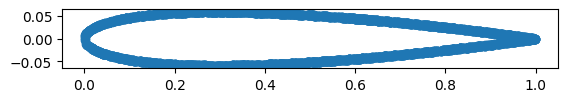

In [83]:
plt.figure()
plt.scatter(x_bc[:,1],x_bc[:,2])
#plt.pcolor(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.colorbar(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.scatter(x_int_train[:,1],)
#plt.pcolor(x[:],u[:,1])
#plt.pcolor(x[:],u[:,2])
ax = plt.gca()
ax.set_aspect(1)
plt.show()


In [3]:
model = DNN().to(device)

In [85]:
lr = 0.001
#optimizer = torch.optim.LBFGS(model.parameters(),lr=lr,max_iter=500)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer_Adam,gamma=0.995)
#optimizer = torch.optim.LBFGS(model.parameters(),lr=0.5,max_iter=20)
#optimizer_LBFGS = torch.optim.LBFGS(model.parameters(), lr=0.01, max_iter=50000)

In [86]:
epochs = 10000
tic = time.time()
for epoch in range(1, epochs+1):
    train(epoch)
toc = time.time()
print(f'Total training time: {toc - tic}')


epoch 1 loss_pde:0.00178309, loss_ib:3.49998498
epoch 1: loss 35.001633
epoch 2 loss_pde:0.00169636, loss_ib:3.02585912
epoch 2: loss 30.260286
epoch 3 loss_pde:0.00444889, loss_ib:2.55717134
epoch 3: loss 25.576160
epoch 4 loss_pde:0.01713872, loss_ib:2.06827855
epoch 4: loss 20.699924
epoch 5 loss_pde:0.05833724, loss_ib:1.55737102
epoch 5: loss 15.632048
epoch 6 loss_pde:0.17001729, loss_ib:1.04486811
epoch 6: loss 10.618698
epoch 7 loss_pde:0.42658380, loss_ib:0.57798374
epoch 7: loss 6.206421
epoch 8 loss_pde:0.89412093, loss_ib:0.22915606
epoch 8: loss 3.185682
epoch 9 loss_pde:1.43860257, loss_ib:0.07138803
epoch 9: loss 2.152483
epoch 10 loss_pde:1.58204603, loss_ib:0.11248512
epoch 10: loss 2.706897
epoch 11 loss_pde:1.15647507, loss_ib:0.25119507
epoch 11: loss 3.668426
epoch 12 loss_pde:0.66702086, loss_ib:0.34873515
epoch 12: loss 4.154372
epoch 13 loss_pde:0.43436050, loss_ib:0.34325260
epoch 13: loss 3.866887
epoch 14 loss_pde:0.41384351, loss_ib:0.26301500
epoch 14: loss

epoch 113: loss 0.212005
epoch 114 loss_pde:0.00162748, loss_ib:0.02102893
epoch 114: loss 0.211917
epoch 115 loss_pde:0.00159149, loss_ib:0.02102583
epoch 115: loss 0.211850
epoch 116 loss_pde:0.00155783, loss_ib:0.02102290
epoch 116: loss 0.211787
epoch 117 loss_pde:0.00152539, loss_ib:0.02101880
epoch 117: loss 0.211713
epoch 118 loss_pde:0.00149340, loss_ib:0.02101303
epoch 118: loss 0.211624
epoch 119 loss_pde:0.00146141, loss_ib:0.02100619
epoch 119: loss 0.211523
epoch 120 loss_pde:0.00142927, loss_ib:0.02099958
epoch 120: loss 0.211425
epoch 121 loss_pde:0.00139708, loss_ib:0.02099436
epoch 121: loss 0.211341
epoch 122 loss_pde:0.00136508, loss_ib:0.02099080
epoch 122: loss 0.211273
epoch 123 loss_pde:0.00133360, loss_ib:0.02098824
epoch 123: loss 0.211216
epoch 124 loss_pde:0.00130293, loss_ib:0.02098561
epoch 124: loss 0.211159
epoch 125 loss_pde:0.00127330, loss_ib:0.02098220
epoch 125: loss 0.211095
epoch 126 loss_pde:0.00124486, loss_ib:0.02097794
epoch 126: loss 0.211024


epoch 223 loss_pde:0.00086861, loss_ib:0.02061676
epoch 223: loss 0.207036
epoch 224 loss_pde:0.00087170, loss_ib:0.02061366
epoch 224: loss 0.207008
epoch 225 loss_pde:0.00087487, loss_ib:0.02061057
epoch 225: loss 0.206981
epoch 226 loss_pde:0.00087814, loss_ib:0.02060749
epoch 226: loss 0.206953
epoch 227 loss_pde:0.00088148, loss_ib:0.02060443
epoch 227: loss 0.206926
epoch 228 loss_pde:0.00088492, loss_ib:0.02060137
epoch 228: loss 0.206899
epoch 229 loss_pde:0.00088845, loss_ib:0.02059833
epoch 229: loss 0.206872
epoch 230 loss_pde:0.00089207, loss_ib:0.02059530
epoch 230: loss 0.206845
epoch 231 loss_pde:0.00089579, loss_ib:0.02059228
epoch 231: loss 0.206819
epoch 232 loss_pde:0.00089960, loss_ib:0.02058926
epoch 232: loss 0.206792
epoch 233 loss_pde:0.00090352, loss_ib:0.02058626
epoch 233: loss 0.206766
epoch 234 loss_pde:0.00090752, loss_ib:0.02058327
epoch 234: loss 0.206740
epoch 235 loss_pde:0.00091163, loss_ib:0.02058028
epoch 235: loss 0.206714
epoch 236 loss_pde:0.0009

epoch 332: loss 0.204855
epoch 333 loss_pde:0.00164013, loss_ib:0.02032008
epoch 333: loss 0.204841
epoch 334 loss_pde:0.00165023, loss_ib:0.02031770
epoch 334: loss 0.204827
epoch 335 loss_pde:0.00166036, loss_ib:0.02031532
epoch 335: loss 0.204814
epoch 336 loss_pde:0.00167054, loss_ib:0.02031296
epoch 336: loss 0.204800
epoch 337 loss_pde:0.00168075, loss_ib:0.02031059
epoch 337: loss 0.204787
epoch 338 loss_pde:0.00169100, loss_ib:0.02030823
epoch 338: loss 0.204773
epoch 339 loss_pde:0.00170128, loss_ib:0.02030588
epoch 339: loss 0.204760
epoch 340 loss_pde:0.00171160, loss_ib:0.02030354
epoch 340: loss 0.204747
epoch 341 loss_pde:0.00172195, loss_ib:0.02030120
epoch 341: loss 0.204734
epoch 342 loss_pde:0.00173234, loss_ib:0.02029887
epoch 342: loss 0.204721
epoch 343 loss_pde:0.00174275, loss_ib:0.02029654
epoch 343: loss 0.204708
epoch 344 loss_pde:0.00175320, loss_ib:0.02029423
epoch 344: loss 0.204695
epoch 345 loss_pde:0.00176368, loss_ib:0.02029192
epoch 345: loss 0.204683


epoch 442 loss_pde:0.00276416, loss_ib:0.02011066
epoch 442: loss 0.203871
epoch 443 loss_pde:0.00277265, loss_ib:0.02010930
epoch 443: loss 0.203866
epoch 444 loss_pde:0.00278108, loss_ib:0.02010796
epoch 444: loss 0.203861
epoch 445 loss_pde:0.00278945, loss_ib:0.02010662
epoch 445: loss 0.203856
epoch 446 loss_pde:0.00279775, loss_ib:0.02010530
epoch 446: loss 0.203851
epoch 447 loss_pde:0.00280599, loss_ib:0.02010399
epoch 447: loss 0.203846
epoch 448 loss_pde:0.00281416, loss_ib:0.02010269
epoch 448: loss 0.203841
epoch 449 loss_pde:0.00282227, loss_ib:0.02010140
epoch 449: loss 0.203836
epoch 450 loss_pde:0.00283031, loss_ib:0.02010012
epoch 450: loss 0.203832
epoch 451 loss_pde:0.00283829, loss_ib:0.02009885
epoch 451: loss 0.203827
epoch 452 loss_pde:0.00284620, loss_ib:0.02009760
epoch 452: loss 0.203822
epoch 453 loss_pde:0.00285404, loss_ib:0.02009635
epoch 453: loss 0.203818
epoch 454 loss_pde:0.00286182, loss_ib:0.02009511
epoch 454: loss 0.203813
epoch 455 loss_pde:0.0028

epoch 551: loss 0.203473
epoch 552 loss_pde:0.00332865, loss_ib:0.02001415
epoch 552: loss 0.203470
epoch 553 loss_pde:0.00333101, loss_ib:0.02001362
epoch 553: loss 0.203467
epoch 554 loss_pde:0.00333333, loss_ib:0.02001310
epoch 554: loss 0.203464
epoch 555 loss_pde:0.00333563, loss_ib:0.02001257
epoch 555: loss 0.203461
epoch 556 loss_pde:0.00333789, loss_ib:0.02001206
epoch 556: loss 0.203458
epoch 557 loss_pde:0.00334012, loss_ib:0.02001155
epoch 557: loss 0.203456
epoch 558 loss_pde:0.00334232, loss_ib:0.02001103
epoch 558: loss 0.203453
epoch 559 loss_pde:0.00334448, loss_ib:0.02001053
epoch 559: loss 0.203450
epoch 560 loss_pde:0.00334662, loss_ib:0.02001002
epoch 560: loss 0.203447
epoch 561 loss_pde:0.00334873, loss_ib:0.02000952
epoch 561: loss 0.203444
epoch 562 loss_pde:0.00335080, loss_ib:0.02000903
epoch 562: loss 0.203441
epoch 563 loss_pde:0.00335285, loss_ib:0.02000853
epoch 563: loss 0.203438
epoch 564 loss_pde:0.00335487, loss_ib:0.02000804
epoch 564: loss 0.203435


epoch 661 loss_pde:0.00346412, loss_ib:0.01997042
epoch 661: loss 0.203168
epoch 662 loss_pde:0.00346474, loss_ib:0.01997009
epoch 662: loss 0.203166
epoch 663 loss_pde:0.00346535, loss_ib:0.01996976
epoch 663: loss 0.203163
epoch 664 loss_pde:0.00346596, loss_ib:0.01996944
epoch 664: loss 0.203160
epoch 665 loss_pde:0.00346656, loss_ib:0.01996911
epoch 665: loss 0.203158
epoch 666 loss_pde:0.00346716, loss_ib:0.01996879
epoch 666: loss 0.203155
epoch 667 loss_pde:0.00346776, loss_ib:0.01996846
epoch 667: loss 0.203152
epoch 668 loss_pde:0.00346834, loss_ib:0.01996813
epoch 668: loss 0.203150
epoch 669 loss_pde:0.00346893, loss_ib:0.01996781
epoch 669: loss 0.203147
epoch 670 loss_pde:0.00346951, loss_ib:0.01996749
epoch 670: loss 0.203144
epoch 671 loss_pde:0.00347009, loss_ib:0.01996716
epoch 671: loss 0.203142
epoch 672 loss_pde:0.00347066, loss_ib:0.01996684
epoch 672: loss 0.203139
epoch 673 loss_pde:0.00347123, loss_ib:0.01996652
epoch 673: loss 0.203136
epoch 674 loss_pde:0.0034

epoch 770: loss 0.202882
epoch 771 loss_pde:0.00351674, loss_ib:0.01993623
epoch 771: loss 0.202879
epoch 772 loss_pde:0.00351716, loss_ib:0.01993593
epoch 772: loss 0.202876
epoch 773 loss_pde:0.00351758, loss_ib:0.01993563
epoch 773: loss 0.202874
epoch 774 loss_pde:0.00351800, loss_ib:0.01993532
epoch 774: loss 0.202871
epoch 775 loss_pde:0.00351842, loss_ib:0.01993502
epoch 775: loss 0.202869
epoch 776 loss_pde:0.00351884, loss_ib:0.01993471
epoch 776: loss 0.202866
epoch 777 loss_pde:0.00351926, loss_ib:0.01993441
epoch 777: loss 0.202863
epoch 778 loss_pde:0.00351968, loss_ib:0.01993411
epoch 778: loss 0.202861
epoch 779 loss_pde:0.00352010, loss_ib:0.01993380
epoch 779: loss 0.202858
epoch 780 loss_pde:0.00352052, loss_ib:0.01993350
epoch 780: loss 0.202856
epoch 781 loss_pde:0.00352093, loss_ib:0.01993320
epoch 781: loss 0.202853
epoch 782 loss_pde:0.00352135, loss_ib:0.01993289
epoch 782: loss 0.202850
epoch 783 loss_pde:0.00352177, loss_ib:0.01993259
epoch 783: loss 0.202848


epoch 880 loss_pde:0.00356267, loss_ib:0.01990267
epoch 880: loss 0.202589
epoch 881 loss_pde:0.00356310, loss_ib:0.01990235
epoch 881: loss 0.202587
epoch 882 loss_pde:0.00356353, loss_ib:0.01990203
epoch 882: loss 0.202584
epoch 883 loss_pde:0.00356395, loss_ib:0.01990172
epoch 883: loss 0.202581
epoch 884 loss_pde:0.00356438, loss_ib:0.01990140
epoch 884: loss 0.202578
epoch 885 loss_pde:0.00356481, loss_ib:0.01990109
epoch 885: loss 0.202576
epoch 886 loss_pde:0.00356524, loss_ib:0.01990077
epoch 886: loss 0.202573
epoch 887 loss_pde:0.00356567, loss_ib:0.01990045
epoch 887: loss 0.202570
epoch 888 loss_pde:0.00356610, loss_ib:0.01990014
epoch 888: loss 0.202567
epoch 889 loss_pde:0.00356653, loss_ib:0.01989982
epoch 889: loss 0.202565
epoch 890 loss_pde:0.00356696, loss_ib:0.01989950
epoch 890: loss 0.202562
epoch 891 loss_pde:0.00356739, loss_ib:0.01989918
epoch 891: loss 0.202559
epoch 892 loss_pde:0.00356782, loss_ib:0.01989887
epoch 892: loss 0.202556
epoch 893 loss_pde:0.0035

epoch 989: loss 0.202277
epoch 990 loss_pde:0.00361070, loss_ib:0.01986632
epoch 990: loss 0.202274
epoch 991 loss_pde:0.00361115, loss_ib:0.01986597
epoch 991: loss 0.202271
epoch 992 loss_pde:0.00361160, loss_ib:0.01986562
epoch 992: loss 0.202268
epoch 993 loss_pde:0.00361204, loss_ib:0.01986527
epoch 993: loss 0.202265
epoch 994 loss_pde:0.00361249, loss_ib:0.01986492
epoch 994: loss 0.202262
epoch 995 loss_pde:0.00361293, loss_ib:0.01986456
epoch 995: loss 0.202259
epoch 996 loss_pde:0.00361338, loss_ib:0.01986421
epoch 996: loss 0.202255
epoch 997 loss_pde:0.00361382, loss_ib:0.01986386
epoch 997: loss 0.202252
epoch 998 loss_pde:0.00361427, loss_ib:0.01986351
epoch 998: loss 0.202249
epoch 999 loss_pde:0.00361471, loss_ib:0.01986315
epoch 999: loss 0.202246
epoch 1000 loss_pde:0.00361516, loss_ib:0.01986280
epoch 1000: loss 0.202243
epoch 1001 loss_pde:0.00361561, loss_ib:0.01986245
epoch 1001: loss 0.202240
epoch 1002 loss_pde:0.00361605, loss_ib:0.01986209
epoch 1002: loss 0.2

epoch 1096: loss 0.201922
epoch 1097 loss_pde:0.00365913, loss_ib:0.01982597
epoch 1097: loss 0.201919
epoch 1098 loss_pde:0.00365959, loss_ib:0.01982556
epoch 1098: loss 0.201915
epoch 1099 loss_pde:0.00366006, loss_ib:0.01982515
epoch 1099: loss 0.201912
epoch 1100 loss_pde:0.00366052, loss_ib:0.01982473
epoch 1100: loss 0.201908
epoch 1101 loss_pde:0.00366098, loss_ib:0.01982432
epoch 1101: loss 0.201904
epoch 1102 loss_pde:0.00366144, loss_ib:0.01982391
epoch 1102: loss 0.201901
epoch 1103 loss_pde:0.00366190, loss_ib:0.01982349
epoch 1103: loss 0.201897
epoch 1104 loss_pde:0.00366236, loss_ib:0.01982308
epoch 1104: loss 0.201893
epoch 1105 loss_pde:0.00366283, loss_ib:0.01982266
epoch 1105: loss 0.201889
epoch 1106 loss_pde:0.00366329, loss_ib:0.01982225
epoch 1106: loss 0.201886
epoch 1107 loss_pde:0.00366375, loss_ib:0.01982183
epoch 1107: loss 0.201882
epoch 1108 loss_pde:0.00366421, loss_ib:0.01982141
epoch 1108: loss 0.201878
epoch 1109 loss_pde:0.00366468, loss_ib:0.01982099

epoch 1203: loss 0.201481
epoch 1204 loss_pde:0.00370949, loss_ib:0.01977669
epoch 1204: loss 0.201476
epoch 1205 loss_pde:0.00370997, loss_ib:0.01977617
epoch 1205: loss 0.201472
epoch 1206 loss_pde:0.00371045, loss_ib:0.01977565
epoch 1206: loss 0.201467
epoch 1207 loss_pde:0.00371093, loss_ib:0.01977512
epoch 1207: loss 0.201462
epoch 1208 loss_pde:0.00371141, loss_ib:0.01977460
epoch 1208: loss 0.201457
epoch 1209 loss_pde:0.00371190, loss_ib:0.01977407
epoch 1209: loss 0.201453
epoch 1210 loss_pde:0.00371238, loss_ib:0.01977354
epoch 1210: loss 0.201448
epoch 1211 loss_pde:0.00371286, loss_ib:0.01977301
epoch 1211: loss 0.201443
epoch 1212 loss_pde:0.00371335, loss_ib:0.01977248
epoch 1212: loss 0.201438
epoch 1213 loss_pde:0.00371383, loss_ib:0.01977195
epoch 1213: loss 0.201433
epoch 1214 loss_pde:0.00371431, loss_ib:0.01977141
epoch 1214: loss 0.201428
epoch 1215 loss_pde:0.00371480, loss_ib:0.01977088
epoch 1215: loss 0.201424
epoch 1216 loss_pde:0.00371528, loss_ib:0.01977034

epoch 1310: loss 0.200882
epoch 1311 loss_pde:0.00376218, loss_ib:0.01971135
epoch 1311: loss 0.200876
epoch 1312 loss_pde:0.00376268, loss_ib:0.01971063
epoch 1312: loss 0.200869
epoch 1313 loss_pde:0.00376319, loss_ib:0.01970990
epoch 1313: loss 0.200862
epoch 1314 loss_pde:0.00376369, loss_ib:0.01970918
epoch 1314: loss 0.200855
epoch 1315 loss_pde:0.00376419, loss_ib:0.01970845
epoch 1315: loss 0.200849
epoch 1316 loss_pde:0.00376470, loss_ib:0.01970771
epoch 1316: loss 0.200842
epoch 1317 loss_pde:0.00376520, loss_ib:0.01970698
epoch 1317: loss 0.200835
epoch 1318 loss_pde:0.00376571, loss_ib:0.01970624
epoch 1318: loss 0.200828
epoch 1319 loss_pde:0.00376621, loss_ib:0.01970550
epoch 1319: loss 0.200821
epoch 1320 loss_pde:0.00376672, loss_ib:0.01970476
epoch 1320: loss 0.200814
epoch 1321 loss_pde:0.00376722, loss_ib:0.01970402
epoch 1321: loss 0.200807
epoch 1322 loss_pde:0.00376773, loss_ib:0.01970327
epoch 1322: loss 0.200800
epoch 1323 loss_pde:0.00376824, loss_ib:0.01970252

epoch 1417: loss 0.199996
epoch 1418 loss_pde:0.00381777, loss_ib:0.01961681
epoch 1418: loss 0.199986
epoch 1419 loss_pde:0.00381831, loss_ib:0.01961573
epoch 1419: loss 0.199976
epoch 1420 loss_pde:0.00381886, loss_ib:0.01961464
epoch 1420: loss 0.199965
epoch 1421 loss_pde:0.00381941, loss_ib:0.01961355
epoch 1421: loss 0.199955
epoch 1422 loss_pde:0.00381995, loss_ib:0.01961246
epoch 1422: loss 0.199945
epoch 1423 loss_pde:0.00382050, loss_ib:0.01961136
epoch 1423: loss 0.199934
epoch 1424 loss_pde:0.00382105, loss_ib:0.01961026
epoch 1424: loss 0.199924
epoch 1425 loss_pde:0.00382160, loss_ib:0.01960915
epoch 1425: loss 0.199913
epoch 1426 loss_pde:0.00382216, loss_ib:0.01960804
epoch 1426: loss 0.199903
epoch 1427 loss_pde:0.00382271, loss_ib:0.01960692
epoch 1427: loss 0.199892
epoch 1428 loss_pde:0.00382326, loss_ib:0.01960580
epoch 1428: loss 0.199881
epoch 1429 loss_pde:0.00382381, loss_ib:0.01960467
epoch 1429: loss 0.199871
epoch 1430 loss_pde:0.00382437, loss_ib:0.01960354

epoch 1524: loss 0.198655
epoch 1525 loss_pde:0.00388705, loss_ib:0.01947532
epoch 1525: loss 0.198640
epoch 1526 loss_pde:0.00388788, loss_ib:0.01947377
epoch 1526: loss 0.198626
epoch 1527 loss_pde:0.00388873, loss_ib:0.01947222
epoch 1527: loss 0.198611
epoch 1528 loss_pde:0.00388958, loss_ib:0.01947065
epoch 1528: loss 0.198596
epoch 1529 loss_pde:0.00389043, loss_ib:0.01946910
epoch 1529: loss 0.198581
epoch 1530 loss_pde:0.00389130, loss_ib:0.01946753
epoch 1530: loss 0.198567
epoch 1531 loss_pde:0.00389217, loss_ib:0.01946596
epoch 1531: loss 0.198552
epoch 1532 loss_pde:0.00389303, loss_ib:0.01946440
epoch 1532: loss 0.198537
epoch 1533 loss_pde:0.00389392, loss_ib:0.01946282
epoch 1533: loss 0.198522
epoch 1534 loss_pde:0.00389480, loss_ib:0.01946125
epoch 1534: loss 0.198507
epoch 1535 loss_pde:0.00389569, loss_ib:0.01945967
epoch 1535: loss 0.198492
epoch 1536 loss_pde:0.00389659, loss_ib:0.01945809
epoch 1536: loss 0.198478
epoch 1537 loss_pde:0.00389749, loss_ib:0.01945651

epoch 1631: loss 0.199069
epoch 1632 loss_pde:0.00353225, loss_ib:0.01964710
epoch 1632: loss 0.200003
epoch 1633 loss_pde:0.00332878, loss_ib:0.01974200
epoch 1633: loss 0.200749
epoch 1634 loss_pde:0.00331259, loss_ib:0.01947683
epoch 1634: loss 0.198081
epoch 1635 loss_pde:0.00369202, loss_ib:0.01972305
epoch 1635: loss 0.200922
epoch 1636 loss_pde:0.00339729, loss_ib:0.01945778
epoch 1636: loss 0.197975
epoch 1637 loss_pde:0.00341428, loss_ib:0.01963342
epoch 1637: loss 0.199748
epoch 1638 loss_pde:0.00364852, loss_ib:0.01951294
epoch 1638: loss 0.198778
epoch 1639 loss_pde:0.00360216, loss_ib:0.01948139
epoch 1639: loss 0.198416
epoch 1640 loss_pde:0.00351306, loss_ib:0.01958210
epoch 1640: loss 0.199334
epoch 1641 loss_pde:0.00356823, loss_ib:0.01942098
epoch 1641: loss 0.197778
epoch 1642 loss_pde:0.00385795, loss_ib:0.01952954
epoch 1642: loss 0.199153
epoch 1643 loss_pde:0.00359450, loss_ib:0.01942982
epoch 1643: loss 0.197893
epoch 1644 loss_pde:0.00359349, loss_ib:0.01948927

epoch 1738: loss 0.196525
epoch 1739 loss_pde:0.00398182, loss_ib:0.01925347
epoch 1739: loss 0.196517
epoch 1740 loss_pde:0.00398246, loss_ib:0.01925252
epoch 1740: loss 0.196508
epoch 1741 loss_pde:0.00398408, loss_ib:0.01925148
epoch 1741: loss 0.196499
epoch 1742 loss_pde:0.00398682, loss_ib:0.01925034
epoch 1742: loss 0.196490
epoch 1743 loss_pde:0.00398709, loss_ib:0.01924945
epoch 1743: loss 0.196482
epoch 1744 loss_pde:0.00398854, loss_ib:0.01924845
epoch 1744: loss 0.196473
epoch 1745 loss_pde:0.00399124, loss_ib:0.01924733
epoch 1745: loss 0.196465
epoch 1746 loss_pde:0.00399161, loss_ib:0.01924644
epoch 1746: loss 0.196456
epoch 1747 loss_pde:0.00399277, loss_ib:0.01924549
epoch 1747: loss 0.196448
epoch 1748 loss_pde:0.00399500, loss_ib:0.01924443
epoch 1748: loss 0.196439
epoch 1749 loss_pde:0.00399551, loss_ib:0.01924355
epoch 1749: loss 0.196431
epoch 1750 loss_pde:0.00399680, loss_ib:0.01924260
epoch 1750: loss 0.196423
epoch 1751 loss_pde:0.00399863, loss_ib:0.01924160

epoch 1845: loss 0.195797
epoch 1846 loss_pde:0.00400632, loss_ib:0.01917848
epoch 1846: loss 0.195791
epoch 1847 loss_pde:0.00400584, loss_ib:0.01917795
epoch 1847: loss 0.195785
epoch 1848 loss_pde:0.00400536, loss_ib:0.01917742
epoch 1848: loss 0.195780
epoch 1849 loss_pde:0.00400487, loss_ib:0.01917689
epoch 1849: loss 0.195774
epoch 1850 loss_pde:0.00400439, loss_ib:0.01917636
epoch 1850: loss 0.195768
epoch 1851 loss_pde:0.00400389, loss_ib:0.01917583
epoch 1851: loss 0.195762
epoch 1852 loss_pde:0.00400340, loss_ib:0.01917530
epoch 1852: loss 0.195756
epoch 1853 loss_pde:0.00400291, loss_ib:0.01917477
epoch 1853: loss 0.195751
epoch 1854 loss_pde:0.00400241, loss_ib:0.01917424
epoch 1854: loss 0.195745
epoch 1855 loss_pde:0.00400191, loss_ib:0.01917372
epoch 1855: loss 0.195739
epoch 1856 loss_pde:0.00400141, loss_ib:0.01917318
epoch 1856: loss 0.195733
epoch 1857 loss_pde:0.00400090, loss_ib:0.01917266
epoch 1857: loss 0.195727
epoch 1858 loss_pde:0.00400040, loss_ib:0.01917213

epoch 1952: loss 0.195117
epoch 1953 loss_pde:0.00395643, loss_ib:0.01911530
epoch 1953: loss 0.195109
epoch 1954 loss_pde:0.00395606, loss_ib:0.01911457
epoch 1954: loss 0.195102
epoch 1955 loss_pde:0.00395569, loss_ib:0.01911384
epoch 1955: loss 0.195094
epoch 1956 loss_pde:0.00395533, loss_ib:0.01911311
epoch 1956: loss 0.195086
epoch 1957 loss_pde:0.00395496, loss_ib:0.01911237
epoch 1957: loss 0.195079
epoch 1958 loss_pde:0.00395460, loss_ib:0.01911162
epoch 1958: loss 0.195071
epoch 1959 loss_pde:0.00395424, loss_ib:0.01911088
epoch 1959: loss 0.195063
epoch 1960 loss_pde:0.00395388, loss_ib:0.01911013
epoch 1960: loss 0.195055
epoch 1961 loss_pde:0.00395353, loss_ib:0.01910937
epoch 1961: loss 0.195047
epoch 1962 loss_pde:0.00395318, loss_ib:0.01910862
epoch 1962: loss 0.195039
epoch 1963 loss_pde:0.00395283, loss_ib:0.01910785
epoch 1963: loss 0.195031
epoch 1964 loss_pde:0.00395248, loss_ib:0.01910708
epoch 1964: loss 0.195023
epoch 1965 loss_pde:0.00395214, loss_ib:0.01910631

epoch 2059: loss 0.194485
epoch 2060 loss_pde:0.00371469, loss_ib:0.01920874
epoch 2060: loss 0.195802
epoch 2061 loss_pde:0.00388764, loss_ib:0.01913236
epoch 2061: loss 0.195211
epoch 2062 loss_pde:0.00371642, loss_ib:0.01908287
epoch 2062: loss 0.194545
epoch 2063 loss_pde:0.00376117, loss_ib:0.01917811
epoch 2063: loss 0.195542
epoch 2064 loss_pde:0.00386563, loss_ib:0.01908501
epoch 2064: loss 0.194716
epoch 2065 loss_pde:0.00380168, loss_ib:0.01908143
epoch 2065: loss 0.194616
epoch 2066 loss_pde:0.00378484, loss_ib:0.01914207
epoch 2066: loss 0.195206
epoch 2067 loss_pde:0.00379214, loss_ib:0.01906486
epoch 2067: loss 0.194441
epoch 2068 loss_pde:0.00389247, loss_ib:0.01907635
epoch 2068: loss 0.194656
epoch 2069 loss_pde:0.00377817, loss_ib:0.01910882
epoch 2069: loss 0.194866
epoch 2070 loss_pde:0.00376736, loss_ib:0.01905435
epoch 2070: loss 0.194311
epoch 2071 loss_pde:0.00389565, loss_ib:0.01907319
epoch 2071: loss 0.194628
epoch 2072 loss_pde:0.00377472, loss_ib:0.01908233

epoch 2166: loss 0.192599
epoch 2167 loss_pde:0.00403143, loss_ib:0.01885462
epoch 2167: loss 0.192578
epoch 2168 loss_pde:0.00403557, loss_ib:0.01885206
epoch 2168: loss 0.192556
epoch 2169 loss_pde:0.00403737, loss_ib:0.01884973
epoch 2169: loss 0.192535
epoch 2170 loss_pde:0.00404136, loss_ib:0.01884717
epoch 2170: loss 0.192513
epoch 2171 loss_pde:0.00404448, loss_ib:0.01884468
epoch 2171: loss 0.192491
epoch 2172 loss_pde:0.00404719, loss_ib:0.01884223
epoch 2172: loss 0.192469
epoch 2173 loss_pde:0.00405141, loss_ib:0.01883961
epoch 2173: loss 0.192448
epoch 2174 loss_pde:0.00405391, loss_ib:0.01883715
epoch 2174: loss 0.192425
epoch 2175 loss_pde:0.00405781, loss_ib:0.01883454
epoch 2175: loss 0.192403
epoch 2176 loss_pde:0.00406153, loss_ib:0.01883195
epoch 2176: loss 0.192381
epoch 2177 loss_pde:0.00406438, loss_ib:0.01882942
epoch 2177: loss 0.192359
epoch 2178 loss_pde:0.00406891, loss_ib:0.01882672
epoch 2178: loss 0.192336
epoch 2179 loss_pde:0.00407211, loss_ib:0.01882414

epoch 2273: loss 0.193998
epoch 2274 loss_pde:0.00407695, loss_ib:0.01891769
epoch 2274: loss 0.193254
epoch 2275 loss_pde:0.00426733, loss_ib:0.01872218
epoch 2275: loss 0.191489
epoch 2276 loss_pde:0.00452168, loss_ib:0.01894436
epoch 2276: loss 0.193965
epoch 2277 loss_pde:0.00422948, loss_ib:0.01866906
epoch 2277: loss 0.190920
epoch 2278 loss_pde:0.00436378, loss_ib:0.01885496
epoch 2278: loss 0.192913
epoch 2279 loss_pde:0.00430121, loss_ib:0.01874734
epoch 2279: loss 0.191775
epoch 2280 loss_pde:0.00437388, loss_ib:0.01869057
epoch 2280: loss 0.191280
epoch 2281 loss_pde:0.00441274, loss_ib:0.01880518
epoch 2281: loss 0.192465
epoch 2282 loss_pde:0.00437837, loss_ib:0.01862435
epoch 2282: loss 0.190622
epoch 2283 loss_pde:0.00451445, loss_ib:0.01875353
epoch 2283: loss 0.192050
epoch 2284 loss_pde:0.00446426, loss_ib:0.01864756
epoch 2284: loss 0.190940
epoch 2285 loss_pde:0.00447413, loss_ib:0.01866701
epoch 2285: loss 0.191144
epoch 2286 loss_pde:0.00467169, loss_ib:0.01867061

epoch 2380: loss 0.187786
epoch 2381 loss_pde:0.00561087, loss_ib:0.01821454
epoch 2381: loss 0.187756
epoch 2382 loss_pde:0.00562303, loss_ib:0.01821031
epoch 2382: loss 0.187726
epoch 2383 loss_pde:0.00563809, loss_ib:0.01820578
epoch 2383: loss 0.187696
epoch 2384 loss_pde:0.00565085, loss_ib:0.01820147
epoch 2384: loss 0.187666
epoch 2385 loss_pde:0.00566329, loss_ib:0.01819720
epoch 2385: loss 0.187635
epoch 2386 loss_pde:0.00567815, loss_ib:0.01819267
epoch 2386: loss 0.187605
epoch 2387 loss_pde:0.00569078, loss_ib:0.01818836
epoch 2387: loss 0.187574
epoch 2388 loss_pde:0.00570353, loss_ib:0.01818403
epoch 2388: loss 0.187544
epoch 2389 loss_pde:0.00571805, loss_ib:0.01817951
epoch 2389: loss 0.187513
epoch 2390 loss_pde:0.00573072, loss_ib:0.01817517
epoch 2390: loss 0.187482
epoch 2391 loss_pde:0.00574365, loss_ib:0.01817079
epoch 2391: loss 0.187452
epoch 2392 loss_pde:0.00575788, loss_ib:0.01816628
epoch 2392: loss 0.187421
epoch 2393 loss_pde:0.00577064, loss_ib:0.01816190

epoch 2487: loss 0.183833
epoch 2488 loss_pde:0.00683216, loss_ib:0.01769533
epoch 2488: loss 0.183785
epoch 2489 loss_pde:0.00683966, loss_ib:0.01768982
epoch 2489: loss 0.183738
epoch 2490 loss_pde:0.00685278, loss_ib:0.01768374
epoch 2490: loss 0.183690
epoch 2491 loss_pde:0.00685764, loss_ib:0.01767845
epoch 2491: loss 0.183642
epoch 2492 loss_pde:0.00687554, loss_ib:0.01767187
epoch 2492: loss 0.183594
epoch 2493 loss_pde:0.00687429, loss_ib:0.01766724
epoch 2493: loss 0.183547
epoch 2494 loss_pde:0.00690521, loss_ib:0.01765953
epoch 2494: loss 0.183501
epoch 2495 loss_pde:0.00689136, loss_ib:0.01765670
epoch 2495: loss 0.183458
epoch 2496 loss_pde:0.00696395, loss_ib:0.01764631
epoch 2496: loss 0.183427
epoch 2497 loss_pde:0.00693838, loss_ib:0.01764867
epoch 2497: loss 0.183425
epoch 2498 loss_pde:0.00718259, loss_ib:0.01763218
epoch 2498: loss 0.183504
epoch 2499 loss_pde:0.00729040, loss_ib:0.01765163
epoch 2499: loss 0.183807
epoch 2500 loss_pde:0.00847517, loss_ib:0.01762629

epoch 2594: loss 0.178483
epoch 2595 loss_pde:0.00756218, loss_ib:0.01708494
epoch 2595: loss 0.178412
epoch 2596 loss_pde:0.00759397, loss_ib:0.01707442
epoch 2596: loss 0.178338
epoch 2597 loss_pde:0.00760714, loss_ib:0.01706556
epoch 2597: loss 0.178263
epoch 2598 loss_pde:0.00762008, loss_ib:0.01705693
epoch 2598: loss 0.178189
epoch 2599 loss_pde:0.00764856, loss_ib:0.01704666
epoch 2599: loss 0.178115
epoch 2600 loss_pde:0.00766376, loss_ib:0.01703751
epoch 2600: loss 0.178039
epoch 2601 loss_pde:0.00767673, loss_ib:0.01702867
epoch 2601: loss 0.177963
epoch 2602 loss_pde:0.00770210, loss_ib:0.01701859
epoch 2602: loss 0.177888
epoch 2603 loss_pde:0.00771922, loss_ib:0.01700915
epoch 2603: loss 0.177811
epoch 2604 loss_pde:0.00773352, loss_ib:0.01699998
epoch 2604: loss 0.177733
epoch 2605 loss_pde:0.00775684, loss_ib:0.01698996
epoch 2605: loss 0.177656
epoch 2606 loss_pde:0.00777525, loss_ib:0.01698029
epoch 2606: loss 0.177578
epoch 2607 loss_pde:0.00779058, loss_ib:0.01697084

epoch 2701: loss 0.167982
epoch 2702 loss_pde:0.00902340, loss_ib:0.01587800
epoch 2702: loss 0.167803
epoch 2703 loss_pde:0.00910443, loss_ib:0.01588203
epoch 2703: loss 0.167925
epoch 2704 loss_pde:0.00910892, loss_ib:0.01586536
epoch 2704: loss 0.167763
epoch 2705 loss_pde:0.00912861, loss_ib:0.01583223
epoch 2705: loss 0.167451
epoch 2706 loss_pde:0.00917705, loss_ib:0.01580845
epoch 2706: loss 0.167262
epoch 2707 loss_pde:0.00914101, loss_ib:0.01580288
epoch 2707: loss 0.167170
epoch 2708 loss_pde:0.00922530, loss_ib:0.01578780
epoch 2708: loss 0.167103
epoch 2709 loss_pde:0.00931374, loss_ib:0.01576392
epoch 2709: loss 0.166953
epoch 2710 loss_pde:0.00920349, loss_ib:0.01575019
epoch 2710: loss 0.166705
epoch 2711 loss_pde:0.00922253, loss_ib:0.01572772
epoch 2711: loss 0.166500
epoch 2712 loss_pde:0.00929227, loss_ib:0.01571124
epoch 2712: loss 0.166405
epoch 2713 loss_pde:0.00927031, loss_ib:0.01570747
epoch 2713: loss 0.166345
epoch 2714 loss_pde:0.00929052, loss_ib:0.01569065

epoch 2808: loss 0.154843
epoch 2809 loss_pde:0.01021578, loss_ib:0.01441639
epoch 2809: loss 0.154380
epoch 2810 loss_pde:0.01021083, loss_ib:0.01445658
epoch 2810: loss 0.154777
epoch 2811 loss_pde:0.01018028, loss_ib:0.01441855
epoch 2811: loss 0.154366
epoch 2812 loss_pde:0.01029280, loss_ib:0.01435566
epoch 2812: loss 0.153849
epoch 2813 loss_pde:0.01017868, loss_ib:0.01442018
epoch 2813: loss 0.154380
epoch 2814 loss_pde:0.01038926, loss_ib:0.01444837
epoch 2814: loss 0.154873
epoch 2815 loss_pde:0.01021966, loss_ib:0.01444625
epoch 2815: loss 0.154682
epoch 2816 loss_pde:0.01061398, loss_ib:0.01448236
epoch 2816: loss 0.155438
epoch 2817 loss_pde:0.01041746, loss_ib:0.01478337
epoch 2817: loss 0.158251
epoch 2818 loss_pde:0.01098834, loss_ib:0.01515332
epoch 2818: loss 0.162522
epoch 2819 loss_pde:0.01072188, loss_ib:0.01577717
epoch 2819: loss 0.168494
epoch 2820 loss_pde:0.01206376, loss_ib:0.01654160
epoch 2820: loss 0.177480
epoch 2821 loss_pde:0.01191000, loss_ib:0.01767748

epoch 2915: loss 0.145006
epoch 2916 loss_pde:0.01027271, loss_ib:0.01336766
epoch 2916: loss 0.143949
epoch 2917 loss_pde:0.01042716, loss_ib:0.01333684
epoch 2917: loss 0.143796
epoch 2918 loss_pde:0.01029234, loss_ib:0.01343852
epoch 2918: loss 0.144678
epoch 2919 loss_pde:0.01046498, loss_ib:0.01351007
epoch 2919: loss 0.145566
epoch 2920 loss_pde:0.01027885, loss_ib:0.01346139
epoch 2920: loss 0.144893
epoch 2921 loss_pde:0.01022674, loss_ib:0.01327242
epoch 2921: loss 0.142951
epoch 2922 loss_pde:0.01026415, loss_ib:0.01315931
epoch 2922: loss 0.141857
epoch 2923 loss_pde:0.01027505, loss_ib:0.01324998
epoch 2923: loss 0.142775
epoch 2924 loss_pde:0.01042579, loss_ib:0.01336340
epoch 2924: loss 0.144060
epoch 2925 loss_pde:0.01038699, loss_ib:0.01334140
epoch 2925: loss 0.143801
epoch 2926 loss_pde:0.01051496, loss_ib:0.01321518
epoch 2926: loss 0.142667
epoch 2927 loss_pde:0.01041820, loss_ib:0.01315173
epoch 2927: loss 0.141935
epoch 2928 loss_pde:0.01060930, loss_ib:0.01309711

epoch 3022: loss 0.159046
epoch 3023 loss_pde:0.01410417, loss_ib:0.01505354
epoch 3023: loss 0.164640
epoch 3024 loss_pde:0.01282728, loss_ib:0.01543592
epoch 3024: loss 0.167186
epoch 3025 loss_pde:0.01353878, loss_ib:0.01473726
epoch 3025: loss 0.160911
epoch 3026 loss_pde:0.01140772, loss_ib:0.01376527
epoch 3026: loss 0.149060
epoch 3027 loss_pde:0.01099692, loss_ib:0.01272953
epoch 3027: loss 0.138292
epoch 3028 loss_pde:0.01079253, loss_ib:0.01250922
epoch 3028: loss 0.135885
epoch 3029 loss_pde:0.01099596, loss_ib:0.01297836
epoch 3029: loss 0.140780
epoch 3030 loss_pde:0.01211402, loss_ib:0.01341724
epoch 3030: loss 0.146286
epoch 3031 loss_pde:0.01133775, loss_ib:0.01368958
epoch 3031: loss 0.148234
epoch 3032 loss_pde:0.01142992, loss_ib:0.01342347
epoch 3032: loss 0.145665
epoch 3033 loss_pde:0.01058669, loss_ib:0.01307835
epoch 3033: loss 0.141370
epoch 3034 loss_pde:0.01055802, loss_ib:0.01260001
epoch 3034: loss 0.136558
epoch 3035 loss_pde:0.01075028, loss_ib:0.01251901

epoch 3129: loss 0.136549
epoch 3130 loss_pde:0.01256696, loss_ib:0.01221284
epoch 3130: loss 0.134695
epoch 3131 loss_pde:0.01075507, loss_ib:0.01212694
epoch 3131: loss 0.132025
epoch 3132 loss_pde:0.01276747, loss_ib:0.01209094
epoch 3132: loss 0.133677
epoch 3133 loss_pde:0.01457871, loss_ib:0.01211427
epoch 3133: loss 0.135721
epoch 3134 loss_pde:0.01180484, loss_ib:0.01217475
epoch 3134: loss 0.133552
epoch 3135 loss_pde:0.01091821, loss_ib:0.01197483
epoch 3135: loss 0.130667
epoch 3136 loss_pde:0.01274967, loss_ib:0.01179965
epoch 3136: loss 0.130746
epoch 3137 loss_pde:0.01224976, loss_ib:0.01194037
epoch 3137: loss 0.131653
epoch 3138 loss_pde:0.01142683, loss_ib:0.01199045
epoch 3138: loss 0.131331
epoch 3139 loss_pde:0.01148995, loss_ib:0.01196221
epoch 3139: loss 0.131112
epoch 3140 loss_pde:0.01196545, loss_ib:0.01194488
epoch 3140: loss 0.131414
epoch 3141 loss_pde:0.01216813, loss_ib:0.01184532
epoch 3141: loss 0.130621
epoch 3142 loss_pde:0.01084479, loss_ib:0.01183605

epoch 3236: loss 0.123767
epoch 3237 loss_pde:0.01190267, loss_ib:0.01114765
epoch 3237: loss 0.123379
epoch 3238 loss_pde:0.01204422, loss_ib:0.01114205
epoch 3238: loss 0.123465
epoch 3239 loss_pde:0.01238266, loss_ib:0.01112121
epoch 3239: loss 0.123595
epoch 3240 loss_pde:0.01198236, loss_ib:0.01115525
epoch 3240: loss 0.123535
epoch 3241 loss_pde:0.01202242, loss_ib:0.01118270
epoch 3241: loss 0.123849
epoch 3242 loss_pde:0.01218854, loss_ib:0.01125812
epoch 3242: loss 0.124770
epoch 3243 loss_pde:0.01209649, loss_ib:0.01139937
epoch 3243: loss 0.126090
epoch 3244 loss_pde:0.01213451, loss_ib:0.01163801
epoch 3244: loss 0.128515
epoch 3245 loss_pde:0.01281663, loss_ib:0.01198539
epoch 3245: loss 0.132671
epoch 3246 loss_pde:0.01301871, loss_ib:0.01262712
epoch 3246: loss 0.139290
epoch 3247 loss_pde:0.01393127, loss_ib:0.01306104
epoch 3247: loss 0.144542
epoch 3248 loss_pde:0.01328385, loss_ib:0.01348010
epoch 3248: loss 0.148085
epoch 3249 loss_pde:0.01390739, loss_ib:0.01325888

epoch 3343: loss 0.118299
epoch 3344 loss_pde:0.01268854, loss_ib:0.01056621
epoch 3344: loss 0.118351
epoch 3345 loss_pde:0.01234009, loss_ib:0.01057251
epoch 3345: loss 0.118065
epoch 3346 loss_pde:0.01236401, loss_ib:0.01056108
epoch 3346: loss 0.117975
epoch 3347 loss_pde:0.01269082, loss_ib:0.01053927
epoch 3347: loss 0.118084
epoch 3348 loss_pde:0.01240782, loss_ib:0.01056195
epoch 3348: loss 0.118027
epoch 3349 loss_pde:0.01239754, loss_ib:0.01058163
epoch 3349: loss 0.118214
epoch 3350 loss_pde:0.01271611, loss_ib:0.01058724
epoch 3350: loss 0.118588
epoch 3351 loss_pde:0.01241485, loss_ib:0.01064281
epoch 3351: loss 0.118843
epoch 3352 loss_pde:0.01245574, loss_ib:0.01068789
epoch 3352: loss 0.119335
epoch 3353 loss_pde:0.01267131, loss_ib:0.01072728
epoch 3353: loss 0.119944
epoch 3354 loss_pde:0.01249804, loss_ib:0.01078876
epoch 3354: loss 0.120386
epoch 3355 loss_pde:0.01246386, loss_ib:0.01078562
epoch 3355: loss 0.120320
epoch 3356 loss_pde:0.01261852, loss_ib:0.01074659

epoch 3450: loss 0.125952
epoch 3451 loss_pde:0.01227171, loss_ib:0.01030565
epoch 3451: loss 0.115328
epoch 3452 loss_pde:0.01205061, loss_ib:0.01077981
epoch 3452: loss 0.119849
epoch 3453 loss_pde:0.01187123, loss_ib:0.01098980
epoch 3453: loss 0.121769
epoch 3454 loss_pde:0.01222129, loss_ib:0.01031562
epoch 3454: loss 0.115377
epoch 3455 loss_pde:0.01227306, loss_ib:0.01004019
epoch 3455: loss 0.112675
epoch 3456 loss_pde:0.01217180, loss_ib:0.01049463
epoch 3456: loss 0.117118
epoch 3457 loss_pde:0.01238464, loss_ib:0.01077219
epoch 3457: loss 0.120107
epoch 3458 loss_pde:0.01214312, loss_ib:0.01028319
epoch 3458: loss 0.114975
epoch 3459 loss_pde:0.01242166, loss_ib:0.01001950
epoch 3459: loss 0.112617
epoch 3460 loss_pde:0.01232781, loss_ib:0.01039816
epoch 3460: loss 0.116309
epoch 3461 loss_pde:0.01215207, loss_ib:0.01012940
epoch 3461: loss 0.113446
epoch 3462 loss_pde:0.01231512, loss_ib:0.00997425
epoch 3462: loss 0.112058
epoch 3463 loss_pde:0.01251422, loss_ib:0.01025116

epoch 3557: loss 0.133104
epoch 3558 loss_pde:0.01589949, loss_ib:0.01231093
epoch 3558: loss 0.139009
epoch 3559 loss_pde:0.01274461, loss_ib:0.01103828
epoch 3559: loss 0.123127
epoch 3560 loss_pde:0.01226602, loss_ib:0.00999602
epoch 3560: loss 0.112226
epoch 3561 loss_pde:0.01314554, loss_ib:0.01100888
epoch 3561: loss 0.123234
epoch 3562 loss_pde:0.01311496, loss_ib:0.01036426
epoch 3562: loss 0.116758
epoch 3563 loss_pde:0.01180555, loss_ib:0.01007230
epoch 3563: loss 0.112529
epoch 3564 loss_pde:0.01281346, loss_ib:0.01047942
epoch 3564: loss 0.117608
epoch 3565 loss_pde:0.01365414, loss_ib:0.01057298
epoch 3565: loss 0.119384
epoch 3566 loss_pde:0.01358866, loss_ib:0.01004014
epoch 3566: loss 0.113990
epoch 3567 loss_pde:0.01182925, loss_ib:0.00969633
epoch 3567: loss 0.108793
epoch 3568 loss_pde:0.01212255, loss_ib:0.00988692
epoch 3568: loss 0.110992
epoch 3569 loss_pde:0.01307209, loss_ib:0.01002407
epoch 3569: loss 0.113313
epoch 3570 loss_pde:0.01236835, loss_ib:0.00977886

epoch 3664: loss 0.103713
epoch 3665 loss_pde:0.01353812, loss_ib:0.00907893
epoch 3665: loss 0.104327
epoch 3666 loss_pde:0.01241501, loss_ib:0.00913777
epoch 3666: loss 0.103793
epoch 3667 loss_pde:0.01320281, loss_ib:0.00915773
epoch 3667: loss 0.104780
epoch 3668 loss_pde:0.01275987, loss_ib:0.00908581
epoch 3668: loss 0.103618
epoch 3669 loss_pde:0.01292883, loss_ib:0.00904187
epoch 3669: loss 0.103348
epoch 3670 loss_pde:0.01286804, loss_ib:0.00904801
epoch 3670: loss 0.103348
epoch 3671 loss_pde:0.01241751, loss_ib:0.00902885
epoch 3671: loss 0.102706
epoch 3672 loss_pde:0.01310182, loss_ib:0.00902254
epoch 3672: loss 0.103327
epoch 3673 loss_pde:0.01254915, loss_ib:0.00904796
epoch 3673: loss 0.103029
epoch 3674 loss_pde:0.01257423, loss_ib:0.00902883
epoch 3674: loss 0.102862
epoch 3675 loss_pde:0.01307298, loss_ib:0.00897210
epoch 3675: loss 0.102794
epoch 3676 loss_pde:0.01244692, loss_ib:0.00897343
epoch 3676: loss 0.102181
epoch 3677 loss_pde:0.01257958, loss_ib:0.00898668

epoch 3771: loss 0.099491
epoch 3772 loss_pde:0.01341751, loss_ib:0.00862912
epoch 3772: loss 0.099709
epoch 3773 loss_pde:0.01340876, loss_ib:0.00850475
epoch 3773: loss 0.098456
epoch 3774 loss_pde:0.01321954, loss_ib:0.00849208
epoch 3774: loss 0.098140
epoch 3775 loss_pde:0.01332122, loss_ib:0.00855721
epoch 3775: loss 0.098893
epoch 3776 loss_pde:0.01341569, loss_ib:0.00847299
epoch 3776: loss 0.098146
epoch 3777 loss_pde:0.01322908, loss_ib:0.00849122
epoch 3777: loss 0.098141
epoch 3778 loss_pde:0.01359814, loss_ib:0.00849125
epoch 3778: loss 0.098511
epoch 3779 loss_pde:0.01330211, loss_ib:0.00847545
epoch 3779: loss 0.098057
epoch 3780 loss_pde:0.01354632, loss_ib:0.00846923
epoch 3780: loss 0.098239
epoch 3781 loss_pde:0.01331590, loss_ib:0.00849154
epoch 3781: loss 0.098231
epoch 3782 loss_pde:0.01356449, loss_ib:0.00842325
epoch 3782: loss 0.097797
epoch 3783 loss_pde:0.01330181, loss_ib:0.00846318
epoch 3783: loss 0.097934
epoch 3784 loss_pde:0.01361594, loss_ib:0.00842272

epoch 3878: loss 0.098025
epoch 3879 loss_pde:0.01321972, loss_ib:0.00894394
epoch 3879: loss 0.102659
epoch 3880 loss_pde:0.01373854, loss_ib:0.00936291
epoch 3880: loss 0.107368
epoch 3881 loss_pde:0.01565384, loss_ib:0.00894672
epoch 3881: loss 0.105121
epoch 3882 loss_pde:0.01365289, loss_ib:0.00859635
epoch 3882: loss 0.099616
epoch 3883 loss_pde:0.01267631, loss_ib:0.00824038
epoch 3883: loss 0.095080
epoch 3884 loss_pde:0.01305051, loss_ib:0.00828179
epoch 3884: loss 0.095868
epoch 3885 loss_pde:0.01373689, loss_ib:0.00864387
epoch 3885: loss 0.100176
epoch 3886 loss_pde:0.01579079, loss_ib:0.00866532
epoch 3886: loss 0.102444
epoch 3887 loss_pde:0.01437735, loss_ib:0.00874301
epoch 3887: loss 0.101807
epoch 3888 loss_pde:0.01544066, loss_ib:0.00838027
epoch 3888: loss 0.099243
epoch 3889 loss_pde:0.01536137, loss_ib:0.00825738
epoch 3889: loss 0.097935
epoch 3890 loss_pde:0.01708613, loss_ib:0.00823879
epoch 3890: loss 0.099474
epoch 3891 loss_pde:0.01669868, loss_ib:0.00843425

epoch 3985: loss 0.092415
epoch 3986 loss_pde:0.01264999, loss_ib:0.00788505
epoch 3986: loss 0.091501
epoch 3987 loss_pde:0.01259674, loss_ib:0.00787828
epoch 3987: loss 0.091380
epoch 3988 loss_pde:0.01332887, loss_ib:0.00782136
epoch 3988: loss 0.091542
epoch 3989 loss_pde:0.01265496, loss_ib:0.00783227
epoch 3989: loss 0.090978
epoch 3990 loss_pde:0.01260540, loss_ib:0.00783524
epoch 3990: loss 0.090958
epoch 3991 loss_pde:0.01326553, loss_ib:0.00782447
epoch 3991: loss 0.091510
epoch 3992 loss_pde:0.01290395, loss_ib:0.00788260
epoch 3992: loss 0.091730
epoch 3993 loss_pde:0.01279137, loss_ib:0.00786926
epoch 3993: loss 0.091484
epoch 3994 loss_pde:0.01327464, loss_ib:0.00783797
epoch 3994: loss 0.091654
epoch 3995 loss_pde:0.01292047, loss_ib:0.00785553
epoch 3995: loss 0.091476
epoch 3996 loss_pde:0.01285068, loss_ib:0.00778588
epoch 3996: loss 0.090709
epoch 3997 loss_pde:0.01301251, loss_ib:0.00774845
epoch 3997: loss 0.090497
epoch 3998 loss_pde:0.01288799, loss_ib:0.00775313

epoch 4092: loss 0.088051
epoch 4093 loss_pde:0.01312425, loss_ib:0.00750427
epoch 4093: loss 0.088167
epoch 4094 loss_pde:0.01275428, loss_ib:0.00746345
epoch 4094: loss 0.087389
epoch 4095 loss_pde:0.01342119, loss_ib:0.00743965
epoch 4095: loss 0.087818
epoch 4096 loss_pde:0.01309451, loss_ib:0.00748153
epoch 4096: loss 0.087910
epoch 4097 loss_pde:0.01292344, loss_ib:0.00742717
epoch 4097: loss 0.087195
epoch 4098 loss_pde:0.01322994, loss_ib:0.00741005
epoch 4098: loss 0.087330
epoch 4099 loss_pde:0.01307763, loss_ib:0.00742376
epoch 4099: loss 0.087315
epoch 4100 loss_pde:0.01288771, loss_ib:0.00739618
epoch 4100: loss 0.086849
epoch 4101 loss_pde:0.01308573, loss_ib:0.00739288
epoch 4101: loss 0.087015
epoch 4102 loss_pde:0.01303560, loss_ib:0.00740750
epoch 4102: loss 0.087111
epoch 4103 loss_pde:0.01296010, loss_ib:0.00737695
epoch 4103: loss 0.086730
epoch 4104 loss_pde:0.01307733, loss_ib:0.00735851
epoch 4104: loss 0.086662
epoch 4105 loss_pde:0.01302232, loss_ib:0.00737761

epoch 4199: loss 0.083242
epoch 4200 loss_pde:0.01319749, loss_ib:0.00700079
epoch 4200: loss 0.083205
epoch 4201 loss_pde:0.01377857, loss_ib:0.00698664
epoch 4201: loss 0.083645
epoch 4202 loss_pde:0.01360983, loss_ib:0.00702450
epoch 4202: loss 0.083855
epoch 4203 loss_pde:0.01386630, loss_ib:0.00696406
epoch 4203: loss 0.083507
epoch 4204 loss_pde:0.01339746, loss_ib:0.00696045
epoch 4204: loss 0.083002
epoch 4205 loss_pde:0.01340694, loss_ib:0.00695663
epoch 4205: loss 0.082973
epoch 4206 loss_pde:0.01385249, loss_ib:0.00693286
epoch 4206: loss 0.083181
epoch 4207 loss_pde:0.01360308, loss_ib:0.00696662
epoch 4207: loss 0.083269
epoch 4208 loss_pde:0.01390123, loss_ib:0.00692217
epoch 4208: loss 0.083123
epoch 4209 loss_pde:0.01343911, loss_ib:0.00694283
epoch 4209: loss 0.082867
epoch 4210 loss_pde:0.01353024, loss_ib:0.00692554
epoch 4210: loss 0.082786
epoch 4211 loss_pde:0.01373942, loss_ib:0.00691063
epoch 4211: loss 0.082846
epoch 4212 loss_pde:0.01371531, loss_ib:0.00692292

epoch 4306: loss 0.080857
epoch 4307 loss_pde:0.01335427, loss_ib:0.00679592
epoch 4307: loss 0.081313
epoch 4308 loss_pde:0.01351409, loss_ib:0.00674224
epoch 4308: loss 0.080936
epoch 4309 loss_pde:0.01346648, loss_ib:0.00677308
epoch 4309: loss 0.081197
epoch 4310 loss_pde:0.01340844, loss_ib:0.00675114
epoch 4310: loss 0.080920
epoch 4311 loss_pde:0.01362010, loss_ib:0.00669741
epoch 4311: loss 0.080594
epoch 4312 loss_pde:0.01344795, loss_ib:0.00673572
epoch 4312: loss 0.080805
epoch 4313 loss_pde:0.01373317, loss_ib:0.00668175
epoch 4313: loss 0.080551
epoch 4314 loss_pde:0.01351833, loss_ib:0.00670331
epoch 4314: loss 0.080551
epoch 4315 loss_pde:0.01352539, loss_ib:0.00669507
epoch 4315: loss 0.080476
epoch 4316 loss_pde:0.01364296, loss_ib:0.00665467
epoch 4316: loss 0.080190
epoch 4317 loss_pde:0.01358931, loss_ib:0.00666735
epoch 4317: loss 0.080263
epoch 4318 loss_pde:0.01366529, loss_ib:0.00664514
epoch 4318: loss 0.080117
epoch 4319 loss_pde:0.01362000, loss_ib:0.00664461

epoch 4413: loss 0.077876
epoch 4414 loss_pde:0.01393908, loss_ib:0.00639196
epoch 4414: loss 0.077859
epoch 4415 loss_pde:0.01386548, loss_ib:0.00640469
epoch 4415: loss 0.077912
epoch 4416 loss_pde:0.01402084, loss_ib:0.00638558
epoch 4416: loss 0.077877
epoch 4417 loss_pde:0.01396160, loss_ib:0.00638600
epoch 4417: loss 0.077822
epoch 4418 loss_pde:0.01399027, loss_ib:0.00638848
epoch 4418: loss 0.077875
epoch 4419 loss_pde:0.01410369, loss_ib:0.00638693
epoch 4419: loss 0.077973
epoch 4420 loss_pde:0.01406946, loss_ib:0.00639870
epoch 4420: loss 0.078057
epoch 4421 loss_pde:0.01413863, loss_ib:0.00640849
epoch 4421: loss 0.078223
epoch 4422 loss_pde:0.01420252, loss_ib:0.00643581
epoch 4422: loss 0.078561
epoch 4423 loss_pde:0.01414786, loss_ib:0.00649022
epoch 4423: loss 0.079050
epoch 4424 loss_pde:0.01432182, loss_ib:0.00654582
epoch 4424: loss 0.079780
epoch 4425 loss_pde:0.01423640, loss_ib:0.00665558
epoch 4425: loss 0.080792
epoch 4426 loss_pde:0.01441222, loss_ib:0.00676584

epoch 4520: loss 0.075513
epoch 4521 loss_pde:0.01431146, loss_ib:0.00611995
epoch 4521: loss 0.075511
epoch 4522 loss_pde:0.01423509, loss_ib:0.00613373
epoch 4522: loss 0.075572
epoch 4523 loss_pde:0.01446556, loss_ib:0.00610534
epoch 4523: loss 0.075519
epoch 4524 loss_pde:0.01425455, loss_ib:0.00611204
epoch 4524: loss 0.075375
epoch 4525 loss_pde:0.01433670, loss_ib:0.00609567
epoch 4525: loss 0.075293
epoch 4526 loss_pde:0.01436066, loss_ib:0.00609360
epoch 4526: loss 0.075297
epoch 4527 loss_pde:0.01430360, loss_ib:0.00609668
epoch 4527: loss 0.075270
epoch 4528 loss_pde:0.01441060, loss_ib:0.00607774
epoch 4528: loss 0.075188
epoch 4529 loss_pde:0.01434546, loss_ib:0.00607832
epoch 4529: loss 0.075129
epoch 4530 loss_pde:0.01439767, loss_ib:0.00607345
epoch 4530: loss 0.075132
epoch 4531 loss_pde:0.01442658, loss_ib:0.00607105
epoch 4531: loss 0.075137
epoch 4532 loss_pde:0.01440979, loss_ib:0.00606789
epoch 4532: loss 0.075089
epoch 4533 loss_pde:0.01443438, loss_ib:0.00605917

epoch 4627: loss 0.074909
epoch 4628 loss_pde:0.01407428, loss_ib:0.00608199
epoch 4628: loss 0.074894
epoch 4629 loss_pde:0.01402071, loss_ib:0.00611743
epoch 4629: loss 0.075195
epoch 4630 loss_pde:0.01443253, loss_ib:0.00611401
epoch 4630: loss 0.075573
epoch 4631 loss_pde:0.01407267, loss_ib:0.00618318
epoch 4631: loss 0.075904
epoch 4632 loss_pde:0.01428228, loss_ib:0.00622007
epoch 4632: loss 0.076483
epoch 4633 loss_pde:0.01435318, loss_ib:0.00627169
epoch 4633: loss 0.077070
epoch 4634 loss_pde:0.01439214, loss_ib:0.00631436
epoch 4634: loss 0.077536
epoch 4635 loss_pde:0.01421456, loss_ib:0.00637611
epoch 4635: loss 0.077976
epoch 4636 loss_pde:0.01462155, loss_ib:0.00634595
epoch 4636: loss 0.078081
epoch 4637 loss_pde:0.01420525, loss_ib:0.00634878
epoch 4637: loss 0.077693
epoch 4638 loss_pde:0.01439447, loss_ib:0.00625876
epoch 4638: loss 0.076982
epoch 4639 loss_pde:0.01425909, loss_ib:0.00617906
epoch 4639: loss 0.076050
epoch 4640 loss_pde:0.01419898, loss_ib:0.00608561

epoch 4734: loss 0.100523
epoch 4735 loss_pde:0.03771534, loss_ib:0.00766317
epoch 4735: loss 0.114347
epoch 4736 loss_pde:0.03669563, loss_ib:0.00880251
epoch 4736: loss 0.124721
epoch 4737 loss_pde:0.04112865, loss_ib:0.00902331
epoch 4737: loss 0.131362
epoch 4738 loss_pde:0.02946144, loss_ib:0.00840215
epoch 4738: loss 0.113483
epoch 4739 loss_pde:0.02281074, loss_ib:0.00659708
epoch 4739: loss 0.088782
epoch 4740 loss_pde:0.01558000, loss_ib:0.00578739
epoch 4740: loss 0.073454
epoch 4741 loss_pde:0.01655631, loss_ib:0.00627220
epoch 4741: loss 0.079278
epoch 4742 loss_pde:0.02084033, loss_ib:0.00709117
epoch 4742: loss 0.091752
epoch 4743 loss_pde:0.02150848, loss_ib:0.00703135
epoch 4743: loss 0.091822
epoch 4744 loss_pde:0.01899631, loss_ib:0.00627398
epoch 4744: loss 0.081736
epoch 4745 loss_pde:0.01497989, loss_ib:0.00608966
epoch 4745: loss 0.075876
epoch 4746 loss_pde:0.01557193, loss_ib:0.00670290
epoch 4746: loss 0.082601
epoch 4747 loss_pde:0.01789139, loss_ib:0.00723220

epoch 4841: loss 0.104720
epoch 4842 loss_pde:0.01642738, loss_ib:0.00619624
epoch 4842: loss 0.078390
epoch 4843 loss_pde:0.02442074, loss_ib:0.00667992
epoch 4843: loss 0.091220
epoch 4844 loss_pde:0.03894832, loss_ib:0.00665628
epoch 4844: loss 0.105511
epoch 4845 loss_pde:0.01876519, loss_ib:0.00678317
epoch 4845: loss 0.086597
epoch 4846 loss_pde:0.01770867, loss_ib:0.00624584
epoch 4846: loss 0.080167
epoch 4847 loss_pde:0.03035928, loss_ib:0.00587039
epoch 4847: loss 0.089063
epoch 4848 loss_pde:0.01671797, loss_ib:0.00639335
epoch 4848: loss 0.080651
epoch 4849 loss_pde:0.01679099, loss_ib:0.00650498
epoch 4849: loss 0.081841
epoch 4850 loss_pde:0.02571283, loss_ib:0.00661361
epoch 4850: loss 0.091849
epoch 4851 loss_pde:0.01607629, loss_ib:0.00680722
epoch 4851: loss 0.084148
epoch 4852 loss_pde:0.01603072, loss_ib:0.00646836
epoch 4852: loss 0.080714
epoch 4853 loss_pde:0.02318452, loss_ib:0.00580677
epoch 4853: loss 0.081252
epoch 4854 loss_pde:0.01441254, loss_ib:0.00599642

epoch 4948: loss 0.068044
epoch 4949 loss_pde:0.01508447, loss_ib:0.00533806
epoch 4949: loss 0.068465
epoch 4950 loss_pde:0.01516654, loss_ib:0.00537548
epoch 4950: loss 0.068921
epoch 4951 loss_pde:0.01564402, loss_ib:0.00536396
epoch 4951: loss 0.069284
epoch 4952 loss_pde:0.01537598, loss_ib:0.00540663
epoch 4952: loss 0.069442
epoch 4953 loss_pde:0.01553051, loss_ib:0.00540266
epoch 4953: loss 0.069557
epoch 4954 loss_pde:0.01526997, loss_ib:0.00544096
epoch 4954: loss 0.069680
epoch 4955 loss_pde:0.01517487, loss_ib:0.00547401
epoch 4955: loss 0.069915
epoch 4956 loss_pde:0.01521486, loss_ib:0.00549854
epoch 4956: loss 0.070200
epoch 4957 loss_pde:0.01500015, loss_ib:0.00554627
epoch 4957: loss 0.070463
epoch 4958 loss_pde:0.01523276, loss_ib:0.00553796
epoch 4958: loss 0.070612
epoch 4959 loss_pde:0.01493266, loss_ib:0.00557149
epoch 4959: loss 0.070648
epoch 4960 loss_pde:0.01518252, loss_ib:0.00553563
epoch 4960: loss 0.070539
epoch 4961 loss_pde:0.01491731, loss_ib:0.00554358

epoch 5055: loss 0.087281
epoch 5056 loss_pde:0.02803110, loss_ib:0.00593681
epoch 5056: loss 0.087399
epoch 5057 loss_pde:0.02407558, loss_ib:0.00630487
epoch 5057: loss 0.087124
epoch 5058 loss_pde:0.02181414, loss_ib:0.00612127
epoch 5058: loss 0.083027
epoch 5059 loss_pde:0.01773619, loss_ib:0.00590588
epoch 5059: loss 0.076795
epoch 5060 loss_pde:0.01601166, loss_ib:0.00590229
epoch 5060: loss 0.075035
epoch 5061 loss_pde:0.01536275, loss_ib:0.00574535
epoch 5061: loss 0.072816
epoch 5062 loss_pde:0.01516398, loss_ib:0.00550810
epoch 5062: loss 0.070245
epoch 5063 loss_pde:0.01704809, loss_ib:0.00541298
epoch 5063: loss 0.071178
epoch 5064 loss_pde:0.01649281, loss_ib:0.00560791
epoch 5064: loss 0.072572
epoch 5065 loss_pde:0.01664813, loss_ib:0.00543281
epoch 5065: loss 0.070976
epoch 5066 loss_pde:0.01528016, loss_ib:0.00539218
epoch 5066: loss 0.069202
epoch 5067 loss_pde:0.01503076, loss_ib:0.00547480
epoch 5067: loss 0.069779
epoch 5068 loss_pde:0.01561568, loss_ib:0.00548017

epoch 5162: loss 0.065487
epoch 5163 loss_pde:0.01415149, loss_ib:0.00511717
epoch 5163: loss 0.065323
epoch 5164 loss_pde:0.01429925, loss_ib:0.00508635
epoch 5164: loss 0.065163
epoch 5165 loss_pde:0.01414391, loss_ib:0.00510209
epoch 5165: loss 0.065165
epoch 5166 loss_pde:0.01430626, loss_ib:0.00509117
epoch 5166: loss 0.065218
epoch 5167 loss_pde:0.01415609, loss_ib:0.00510016
epoch 5167: loss 0.065158
epoch 5168 loss_pde:0.01426272, loss_ib:0.00507531
epoch 5168: loss 0.065016
epoch 5169 loss_pde:0.01417848, loss_ib:0.00507662
epoch 5169: loss 0.064945
epoch 5170 loss_pde:0.01425245, loss_ib:0.00507264
epoch 5170: loss 0.064979
epoch 5171 loss_pde:0.01418468, loss_ib:0.00508353
epoch 5171: loss 0.065020
epoch 5172 loss_pde:0.01428130, loss_ib:0.00507146
epoch 5172: loss 0.064996
epoch 5173 loss_pde:0.01419795, loss_ib:0.00507613
epoch 5173: loss 0.064959
epoch 5174 loss_pde:0.01435224, loss_ib:0.00506226
epoch 5174: loss 0.064975
epoch 5175 loss_pde:0.01421437, loss_ib:0.00508318

epoch 5269: loss 0.068423
epoch 5270 loss_pde:0.01494426, loss_ib:0.00539661
epoch 5270: loss 0.068910
epoch 5271 loss_pde:0.01501604, loss_ib:0.00541961
epoch 5271: loss 0.069212
epoch 5272 loss_pde:0.01464940, loss_ib:0.00544519
epoch 5272: loss 0.069101
epoch 5273 loss_pde:0.01446016, loss_ib:0.00535564
epoch 5273: loss 0.068017
epoch 5274 loss_pde:0.01407319, loss_ib:0.00521647
epoch 5274: loss 0.066238
epoch 5275 loss_pde:0.01418361, loss_ib:0.00506324
epoch 5275: loss 0.064816
epoch 5276 loss_pde:0.01388504, loss_ib:0.00508363
epoch 5276: loss 0.064721
epoch 5277 loss_pde:0.01433474, loss_ib:0.00515246
epoch 5277: loss 0.065859
epoch 5278 loss_pde:0.01413395, loss_ib:0.00526277
epoch 5278: loss 0.066762
epoch 5279 loss_pde:0.01440920, loss_ib:0.00517850
epoch 5279: loss 0.066194
epoch 5280 loss_pde:0.01444044, loss_ib:0.00502837
epoch 5280: loss 0.064724
epoch 5281 loss_pde:0.01436019, loss_ib:0.00493990
epoch 5281: loss 0.063759
epoch 5282 loss_pde:0.01487478, loss_ib:0.00491981

epoch 5376: loss 0.132716
epoch 5377 loss_pde:0.09585405, loss_ib:0.00538393
epoch 5377: loss 0.149693
epoch 5378 loss_pde:0.07746619, loss_ib:0.00596418
epoch 5378: loss 0.137108
epoch 5379 loss_pde:0.04664415, loss_ib:0.00548594
epoch 5379: loss 0.101504
epoch 5380 loss_pde:0.01616048, loss_ib:0.00535108
epoch 5380: loss 0.069671
epoch 5381 loss_pde:0.02114146, loss_ib:0.00522203
epoch 5381: loss 0.073362
epoch 5382 loss_pde:0.04323019, loss_ib:0.00492455
epoch 5382: loss 0.092476
epoch 5383 loss_pde:0.03658626, loss_ib:0.00532819
epoch 5383: loss 0.089868
epoch 5384 loss_pde:0.01978826, loss_ib:0.00518205
epoch 5384: loss 0.071609
epoch 5385 loss_pde:0.01789560, loss_ib:0.00514127
epoch 5385: loss 0.069308
epoch 5386 loss_pde:0.02798967, loss_ib:0.00536572
epoch 5386: loss 0.081647
epoch 5387 loss_pde:0.02905156, loss_ib:0.00510529
epoch 5387: loss 0.080104
epoch 5388 loss_pde:0.01522501, loss_ib:0.00540831
epoch 5388: loss 0.069308
epoch 5389 loss_pde:0.01698490, loss_ib:0.00538785

epoch 5483: loss 0.066785
epoch 5484 loss_pde:0.01904003, loss_ib:0.00495660
epoch 5484: loss 0.068606
epoch 5485 loss_pde:0.01933677, loss_ib:0.00511749
epoch 5485: loss 0.070512
epoch 5486 loss_pde:0.02182514, loss_ib:0.00515664
epoch 5486: loss 0.073392
epoch 5487 loss_pde:0.02206106, loss_ib:0.00529927
epoch 5487: loss 0.075054
epoch 5488 loss_pde:0.02418740, loss_ib:0.00526310
epoch 5488: loss 0.076818
epoch 5489 loss_pde:0.02312743, loss_ib:0.00526468
epoch 5489: loss 0.075774
epoch 5490 loss_pde:0.02344571, loss_ib:0.00511294
epoch 5490: loss 0.074575
epoch 5491 loss_pde:0.02022264, loss_ib:0.00510062
epoch 5491: loss 0.071229
epoch 5492 loss_pde:0.01873009, loss_ib:0.00496397
epoch 5492: loss 0.068370
epoch 5493 loss_pde:0.01570218, loss_ib:0.00501761
epoch 5493: loss 0.065878
epoch 5494 loss_pde:0.01479499, loss_ib:0.00502954
epoch 5494: loss 0.065090
epoch 5495 loss_pde:0.01435455, loss_ib:0.00517959
epoch 5495: loss 0.066150
epoch 5496 loss_pde:0.01486796, loss_ib:0.00518508

epoch 5590: loss 0.062479
epoch 5591 loss_pde:0.01403365, loss_ib:0.00477696
epoch 5591: loss 0.061803
epoch 5592 loss_pde:0.01387334, loss_ib:0.00468697
epoch 5592: loss 0.060743
epoch 5593 loss_pde:0.01400065, loss_ib:0.00461014
epoch 5593: loss 0.060102
epoch 5594 loss_pde:0.01371552, loss_ib:0.00467539
epoch 5594: loss 0.060469
epoch 5595 loss_pde:0.01397057, loss_ib:0.00473440
epoch 5595: loss 0.061315
epoch 5596 loss_pde:0.01374723, loss_ib:0.00480544
epoch 5596: loss 0.061802
epoch 5597 loss_pde:0.01397194, loss_ib:0.00479717
epoch 5597: loss 0.061944
epoch 5598 loss_pde:0.01392169, loss_ib:0.00473151
epoch 5598: loss 0.061237
epoch 5599 loss_pde:0.01395298, loss_ib:0.00464126
epoch 5599: loss 0.060366
epoch 5600 loss_pde:0.01387934, loss_ib:0.00462063
epoch 5600: loss 0.060086
epoch 5601 loss_pde:0.01382124, loss_ib:0.00467447
epoch 5601: loss 0.060566
epoch 5602 loss_pde:0.01394279, loss_ib:0.00473095
epoch 5602: loss 0.061252
epoch 5603 loss_pde:0.01396061, loss_ib:0.00475932

epoch 5697: loss 0.061218
epoch 5698 loss_pde:0.01476708, loss_ib:0.00467014
epoch 5698: loss 0.061468
epoch 5699 loss_pde:0.01428544, loss_ib:0.00468822
epoch 5699: loss 0.061168
epoch 5700 loss_pde:0.01398363, loss_ib:0.00468868
epoch 5700: loss 0.060870
epoch 5701 loss_pde:0.01398294, loss_ib:0.00469480
epoch 5701: loss 0.060931
epoch 5702 loss_pde:0.01393514, loss_ib:0.00471043
epoch 5702: loss 0.061039
epoch 5703 loss_pde:0.01426019, loss_ib:0.00469137
epoch 5703: loss 0.061174
epoch 5704 loss_pde:0.01395772, loss_ib:0.00472537
epoch 5704: loss 0.061211
epoch 5705 loss_pde:0.01406909, loss_ib:0.00472595
epoch 5705: loss 0.061329
epoch 5706 loss_pde:0.01363132, loss_ib:0.00480051
epoch 5706: loss 0.061636
epoch 5707 loss_pde:0.01366298, loss_ib:0.00483155
epoch 5707: loss 0.061978
epoch 5708 loss_pde:0.01369709, loss_ib:0.00486193
epoch 5708: loss 0.062316
epoch 5709 loss_pde:0.01387993, loss_ib:0.00483012
epoch 5709: loss 0.062181
epoch 5710 loss_pde:0.01417758, loss_ib:0.00475716

epoch 5804: loss 0.058460
epoch 5805 loss_pde:0.01352998, loss_ib:0.00449191
epoch 5805: loss 0.058449
epoch 5806 loss_pde:0.01356464, loss_ib:0.00446290
epoch 5806: loss 0.058194
epoch 5807 loss_pde:0.01348771, loss_ib:0.00445906
epoch 5807: loss 0.058078
epoch 5808 loss_pde:0.01361772, loss_ib:0.00445102
epoch 5808: loss 0.058128
epoch 5809 loss_pde:0.01351213, loss_ib:0.00447240
epoch 5809: loss 0.058236
epoch 5810 loss_pde:0.01352143, loss_ib:0.00446467
epoch 5810: loss 0.058168
epoch 5811 loss_pde:0.01357005, loss_ib:0.00444338
epoch 5811: loss 0.058004
epoch 5812 loss_pde:0.01350254, loss_ib:0.00444805
epoch 5812: loss 0.057983
epoch 5813 loss_pde:0.01359248, loss_ib:0.00444192
epoch 5813: loss 0.058012
epoch 5814 loss_pde:0.01354221, loss_ib:0.00444705
epoch 5814: loss 0.058013
epoch 5815 loss_pde:0.01359196, loss_ib:0.00443556
epoch 5815: loss 0.057948
epoch 5816 loss_pde:0.01360888, loss_ib:0.00442719
epoch 5816: loss 0.057881
epoch 5817 loss_pde:0.01360958, loss_ib:0.00442889

epoch 5911: loss 0.061062
epoch 5912 loss_pde:0.01392456, loss_ib:0.00450393
epoch 5912: loss 0.058964
epoch 5913 loss_pde:0.01370295, loss_ib:0.00448247
epoch 5913: loss 0.058528
epoch 5914 loss_pde:0.01364590, loss_ib:0.00456442
epoch 5914: loss 0.059290
epoch 5915 loss_pde:0.01377413, loss_ib:0.00456689
epoch 5915: loss 0.059443
epoch 5916 loss_pde:0.01344472, loss_ib:0.00447818
epoch 5916: loss 0.058227
epoch 5917 loss_pde:0.01378297, loss_ib:0.00445310
epoch 5917: loss 0.058314
epoch 5918 loss_pde:0.01389602, loss_ib:0.00452773
epoch 5918: loss 0.059173
epoch 5919 loss_pde:0.01374299, loss_ib:0.00447419
epoch 5919: loss 0.058485
epoch 5920 loss_pde:0.01354330, loss_ib:0.00441593
epoch 5920: loss 0.057703
epoch 5921 loss_pde:0.01356330, loss_ib:0.00442239
epoch 5921: loss 0.057787
epoch 5922 loss_pde:0.01349768, loss_ib:0.00446992
epoch 5922: loss 0.058197
epoch 5923 loss_pde:0.01344461, loss_ib:0.00445058
epoch 5923: loss 0.057950
epoch 5924 loss_pde:0.01352690, loss_ib:0.00439130

epoch 6018: loss 0.059002
epoch 6019 loss_pde:0.01337111, loss_ib:0.00460429
epoch 6019: loss 0.059414
epoch 6020 loss_pde:0.01369019, loss_ib:0.00468832
epoch 6020: loss 0.060573
epoch 6021 loss_pde:0.01405755, loss_ib:0.00471550
epoch 6021: loss 0.061213
epoch 6022 loss_pde:0.01394520, loss_ib:0.00469987
epoch 6022: loss 0.060944
epoch 6023 loss_pde:0.01387979, loss_ib:0.00451913
epoch 6023: loss 0.059071
epoch 6024 loss_pde:0.01340301, loss_ib:0.00443486
epoch 6024: loss 0.057752
epoch 6025 loss_pde:0.01326803, loss_ib:0.00451334
epoch 6025: loss 0.058401
epoch 6026 loss_pde:0.01333486, loss_ib:0.00474730
epoch 6026: loss 0.060808
epoch 6027 loss_pde:0.01380861, loss_ib:0.00505005
epoch 6027: loss 0.064309
epoch 6028 loss_pde:0.01397212, loss_ib:0.00510531
epoch 6028: loss 0.065025
epoch 6029 loss_pde:0.01414684, loss_ib:0.00479912
epoch 6029: loss 0.062138
epoch 6030 loss_pde:0.01384950, loss_ib:0.00440435
epoch 6030: loss 0.057893
epoch 6031 loss_pde:0.01312539, loss_ib:0.00457694

epoch 6125: loss 0.058920
epoch 6126 loss_pde:0.01338941, loss_ib:0.00450074
epoch 6126: loss 0.058397
epoch 6127 loss_pde:0.01419803, loss_ib:0.00448204
epoch 6127: loss 0.059018
epoch 6128 loss_pde:0.01346928, loss_ib:0.00440258
epoch 6128: loss 0.057495
epoch 6129 loss_pde:0.01345463, loss_ib:0.00439646
epoch 6129: loss 0.057419
epoch 6130 loss_pde:0.01356212, loss_ib:0.00456682
epoch 6130: loss 0.059230
epoch 6131 loss_pde:0.01351926, loss_ib:0.00450419
epoch 6131: loss 0.058561
epoch 6132 loss_pde:0.01368489, loss_ib:0.00442732
epoch 6132: loss 0.057958
epoch 6133 loss_pde:0.01349123, loss_ib:0.00439730
epoch 6133: loss 0.057464
epoch 6134 loss_pde:0.01339277, loss_ib:0.00436315
epoch 6134: loss 0.057024
epoch 6135 loss_pde:0.01341959, loss_ib:0.00440278
epoch 6135: loss 0.057447
epoch 6136 loss_pde:0.01373985, loss_ib:0.00435617
epoch 6136: loss 0.057302
epoch 6137 loss_pde:0.01318803, loss_ib:0.00435676
epoch 6137: loss 0.056756
epoch 6138 loss_pde:0.01325546, loss_ib:0.00432612

epoch 6232: loss 0.212554
epoch 6233 loss_pde:0.02054357, loss_ib:0.01872691
epoch 6233: loss 0.207813
epoch 6234 loss_pde:0.02076557, loss_ib:0.01933308
epoch 6234: loss 0.214096
epoch 6235 loss_pde:0.01657619, loss_ib:0.01883891
epoch 6235: loss 0.204965
epoch 6236 loss_pde:0.01678103, loss_ib:0.01858577
epoch 6236: loss 0.202639
epoch 6237 loss_pde:0.01487185, loss_ib:0.01898087
epoch 6237: loss 0.204681
epoch 6238 loss_pde:0.01593307, loss_ib:0.01857714
epoch 6238: loss 0.201704
epoch 6239 loss_pde:0.01420434, loss_ib:0.01834315
epoch 6239: loss 0.197636
epoch 6240 loss_pde:0.01299370, loss_ib:0.01868748
epoch 6240: loss 0.199868
epoch 6241 loss_pde:0.01187192, loss_ib:0.01823734
epoch 6241: loss 0.194245
epoch 6242 loss_pde:0.01176698, loss_ib:0.01809338
epoch 6242: loss 0.192701
epoch 6243 loss_pde:0.01196505, loss_ib:0.01830979
epoch 6243: loss 0.195063
epoch 6244 loss_pde:0.01141754, loss_ib:0.01809194
epoch 6244: loss 0.192337
epoch 6245 loss_pde:0.01124355, loss_ib:0.01796828

epoch 6339: loss 0.127285
epoch 6340 loss_pde:0.01271632, loss_ib:0.01139232
epoch 6340: loss 0.126640
epoch 6341 loss_pde:0.01275043, loss_ib:0.01132469
epoch 6341: loss 0.125997
epoch 6342 loss_pde:0.01277796, loss_ib:0.01125803
epoch 6342: loss 0.125358
epoch 6343 loss_pde:0.01279896, loss_ib:0.01119233
epoch 6343: loss 0.124722
epoch 6344 loss_pde:0.01281696, loss_ib:0.01112728
epoch 6344: loss 0.124090
epoch 6345 loss_pde:0.01283452, loss_ib:0.01106264
epoch 6345: loss 0.123461
epoch 6346 loss_pde:0.01285143, loss_ib:0.01099848
epoch 6346: loss 0.122836
epoch 6347 loss_pde:0.01286684, loss_ib:0.01093496
epoch 6347: loss 0.122216
epoch 6348 loss_pde:0.01288088, loss_ib:0.01087209
epoch 6348: loss 0.121602
epoch 6349 loss_pde:0.01289520, loss_ib:0.01080978
epoch 6349: loss 0.120993
epoch 6350 loss_pde:0.01291155, loss_ib:0.01074792
epoch 6350: loss 0.120391
epoch 6351 loss_pde:0.01293059, loss_ib:0.01068651
epoch 6351: loss 0.119796
epoch 6352 loss_pde:0.01295154, loss_ib:0.01062572

epoch 6446: loss 0.088060
epoch 6447 loss_pde:0.01353184, loss_ib:0.00743357
epoch 6447: loss 0.087868
epoch 6448 loss_pde:0.01352799, loss_ib:0.00741486
epoch 6448: loss 0.087677
epoch 6449 loss_pde:0.01352395, loss_ib:0.00739634
epoch 6449: loss 0.087487
epoch 6450 loss_pde:0.01351978, loss_ib:0.00737798
epoch 6450: loss 0.087300
epoch 6451 loss_pde:0.01351556, loss_ib:0.00735979
epoch 6451: loss 0.087113
epoch 6452 loss_pde:0.01351118, loss_ib:0.00734178
epoch 6452: loss 0.086929
epoch 6453 loss_pde:0.01350654, loss_ib:0.00732394
epoch 6453: loss 0.086746
epoch 6454 loss_pde:0.01350181, loss_ib:0.00730627
epoch 6454: loss 0.086564
epoch 6455 loss_pde:0.01349708, loss_ib:0.00728874
epoch 6455: loss 0.086384
epoch 6456 loss_pde:0.01349232, loss_ib:0.00727137
epoch 6456: loss 0.086206
epoch 6457 loss_pde:0.01348738, loss_ib:0.00725416
epoch 6457: loss 0.086029
epoch 6458 loss_pde:0.01348233, loss_ib:0.00723711
epoch 6458: loss 0.085853
epoch 6459 loss_pde:0.01347726, loss_ib:0.00722020

epoch 6553: loss 0.074067
epoch 6554 loss_pde:0.01292478, loss_ib:0.00609190
epoch 6554: loss 0.073844
epoch 6555 loss_pde:0.01291565, loss_ib:0.00607710
epoch 6555: loss 0.073687
epoch 6556 loss_pde:0.01290937, loss_ib:0.00607189
epoch 6556: loss 0.073628
epoch 6557 loss_pde:0.01290699, loss_ib:0.00607091
epoch 6557: loss 0.073616
epoch 6558 loss_pde:0.01290019, loss_ib:0.00606726
epoch 6558: loss 0.073573
epoch 6559 loss_pde:0.01290086, loss_ib:0.00605618
epoch 6559: loss 0.073463
epoch 6560 loss_pde:0.01289613, loss_ib:0.00604128
epoch 6560: loss 0.073309
epoch 6561 loss_pde:0.01289283, loss_ib:0.00602708
epoch 6561: loss 0.073164
epoch 6562 loss_pde:0.01288860, loss_ib:0.00601738
epoch 6562: loss 0.073062
epoch 6563 loss_pde:0.01288473, loss_ib:0.00601176
epoch 6563: loss 0.073002
epoch 6564 loss_pde:0.01288330, loss_ib:0.00600704
epoch 6564: loss 0.072954
epoch 6565 loss_pde:0.01288053, loss_ib:0.00600063
epoch 6565: loss 0.072887
epoch 6566 loss_pde:0.01288054, loss_ib:0.00599106

epoch 6660: loss 0.066263
epoch 6661 loss_pde:0.01245403, loss_ib:0.00537672
epoch 6661: loss 0.066221
epoch 6662 loss_pde:0.01245164, loss_ib:0.00537313
epoch 6662: loss 0.066183
epoch 6663 loss_pde:0.01245456, loss_ib:0.00536924
epoch 6663: loss 0.066147
epoch 6664 loss_pde:0.01244961, loss_ib:0.00536632
epoch 6664: loss 0.066113
epoch 6665 loss_pde:0.01245397, loss_ib:0.00536266
epoch 6665: loss 0.066081
epoch 6666 loss_pde:0.01244725, loss_ib:0.00536034
epoch 6666: loss 0.066051
epoch 6667 loss_pde:0.01245324, loss_ib:0.00535706
epoch 6667: loss 0.066024
epoch 6668 loss_pde:0.01244479, loss_ib:0.00535556
epoch 6668: loss 0.066000
epoch 6669 loss_pde:0.01245140, loss_ib:0.00535291
epoch 6669: loss 0.065981
epoch 6670 loss_pde:0.01244159, loss_ib:0.00535226
epoch 6670: loss 0.065964
epoch 6671 loss_pde:0.01244946, loss_ib:0.00535016
epoch 6671: loss 0.065951
epoch 6672 loss_pde:0.01243823, loss_ib:0.00535027
epoch 6672: loss 0.065941
epoch 6673 loss_pde:0.01244793, loss_ib:0.00534857

epoch 6767: loss 0.064604
epoch 6768 loss_pde:0.01371607, loss_ib:0.00506344
epoch 6768: loss 0.064350
epoch 6769 loss_pde:0.01397422, loss_ib:0.00496439
epoch 6769: loss 0.063618
epoch 6770 loss_pde:0.01290573, loss_ib:0.00497779
epoch 6770: loss 0.062684
epoch 6771 loss_pde:0.01269553, loss_ib:0.00493361
epoch 6771: loss 0.062032
epoch 6772 loss_pde:0.01226700, loss_ib:0.00496079
epoch 6772: loss 0.061875
epoch 6773 loss_pde:0.01228371, loss_ib:0.00499183
epoch 6773: loss 0.062202
epoch 6774 loss_pde:0.01268359, loss_ib:0.00501163
epoch 6774: loss 0.062800
epoch 6775 loss_pde:0.01262587, loss_ib:0.00507648
epoch 6775: loss 0.063391
epoch 6776 loss_pde:0.01305585, loss_ib:0.00507140
epoch 6776: loss 0.063770
epoch 6777 loss_pde:0.01262920, loss_ib:0.00511988
epoch 6777: loss 0.063828
epoch 6778 loss_pde:0.01271684, loss_ib:0.00508816
epoch 6778: loss 0.063598
epoch 6779 loss_pde:0.01233568, loss_ib:0.00508218
epoch 6779: loss 0.063157
epoch 6780 loss_pde:0.01232316, loss_ib:0.00503091

epoch 6874: loss 0.063664
epoch 6875 loss_pde:0.01352134, loss_ib:0.00483968
epoch 6875: loss 0.061918
epoch 6876 loss_pde:0.01233259, loss_ib:0.00488456
epoch 6876: loss 0.061178
epoch 6877 loss_pde:0.01302252, loss_ib:0.00495591
epoch 6877: loss 0.062582
epoch 6878 loss_pde:0.01451408, loss_ib:0.00493321
epoch 6878: loss 0.063846
epoch 6879 loss_pde:0.01342051, loss_ib:0.00495701
epoch 6879: loss 0.062991
epoch 6880 loss_pde:0.01270750, loss_ib:0.00484891
epoch 6880: loss 0.061197
epoch 6881 loss_pde:0.01258825, loss_ib:0.00478205
epoch 6881: loss 0.060409
epoch 6882 loss_pde:0.01304315, loss_ib:0.00476176
epoch 6882: loss 0.060661
epoch 6883 loss_pde:0.01378688, loss_ib:0.00468213
epoch 6883: loss 0.060608
epoch 6884 loss_pde:0.01277236, loss_ib:0.00470543
epoch 6884: loss 0.059827
epoch 6885 loss_pde:0.01244665, loss_ib:0.00469529
epoch 6885: loss 0.059400
epoch 6886 loss_pde:0.01271733, loss_ib:0.00472723
epoch 6886: loss 0.059990
epoch 6887 loss_pde:0.01286647, loss_ib:0.00481096

epoch 6981: loss 0.093231
epoch 6982 loss_pde:0.01327963, loss_ib:0.00485752
epoch 6982: loss 0.061855
epoch 6983 loss_pde:0.03142841, loss_ib:0.00507329
epoch 6983: loss 0.082161
epoch 6984 loss_pde:0.04005473, loss_ib:0.00522286
epoch 6984: loss 0.092283
epoch 6985 loss_pde:0.01447221, loss_ib:0.00547038
epoch 6985: loss 0.069176
epoch 6986 loss_pde:0.02313145, loss_ib:0.00586656
epoch 6986: loss 0.081797
epoch 6987 loss_pde:0.03196685, loss_ib:0.00617152
epoch 6987: loss 0.093682
epoch 6988 loss_pde:0.01329076, loss_ib:0.00630946
epoch 6988: loss 0.076385
epoch 6989 loss_pde:0.02150625, loss_ib:0.00571267
epoch 6989: loss 0.078633
epoch 6990 loss_pde:0.02581334, loss_ib:0.00478166
epoch 6990: loss 0.073630
epoch 6991 loss_pde:0.01265734, loss_ib:0.00489822
epoch 6991: loss 0.061640
epoch 6992 loss_pde:0.02072432, loss_ib:0.00550900
epoch 6992: loss 0.075814
epoch 6993 loss_pde:0.02006787, loss_ib:0.00530585
epoch 6993: loss 0.073126
epoch 6994 loss_pde:0.01238135, loss_ib:0.00490446

epoch 7088: loss 0.056422
epoch 7089 loss_pde:0.01294687, loss_ib:0.00434593
epoch 7089: loss 0.056406
epoch 7090 loss_pde:0.01294716, loss_ib:0.00434443
epoch 7090: loss 0.056391
epoch 7091 loss_pde:0.01296256, loss_ib:0.00434142
epoch 7091: loss 0.056377
epoch 7092 loss_pde:0.01296059, loss_ib:0.00434013
epoch 7092: loss 0.056362
epoch 7093 loss_pde:0.01296558, loss_ib:0.00433819
epoch 7093: loss 0.056347
epoch 7094 loss_pde:0.01297704, loss_ib:0.00433560
epoch 7094: loss 0.056333
epoch 7095 loss_pde:0.01297488, loss_ib:0.00433432
epoch 7095: loss 0.056318
epoch 7096 loss_pde:0.01298369, loss_ib:0.00433192
epoch 7096: loss 0.056303
epoch 7097 loss_pde:0.01299061, loss_ib:0.00432974
epoch 7097: loss 0.056288
epoch 7098 loss_pde:0.01298891, loss_ib:0.00432844
epoch 7098: loss 0.056273
epoch 7099 loss_pde:0.01299966, loss_ib:0.00432588
epoch 7099: loss 0.056258
epoch 7100 loss_pde:0.01300143, loss_ib:0.00432424
epoch 7100: loss 0.056244
epoch 7101 loss_pde:0.01300470, loss_ib:0.00432249

epoch 7195: loss 0.055639
epoch 7196 loss_pde:0.01333992, loss_ib:0.00426394
epoch 7196: loss 0.055979
epoch 7197 loss_pde:0.01343414, loss_ib:0.00430771
epoch 7197: loss 0.056511
epoch 7198 loss_pde:0.01338214, loss_ib:0.00439366
epoch 7198: loss 0.057319
epoch 7199 loss_pde:0.01357081, loss_ib:0.00448827
epoch 7199: loss 0.058453
epoch 7200 loss_pde:0.01352495, loss_ib:0.00463872
epoch 7200: loss 0.059912
epoch 7201 loss_pde:0.01391926, loss_ib:0.00474891
epoch 7201: loss 0.061408
epoch 7202 loss_pde:0.01395466, loss_ib:0.00484802
epoch 7202: loss 0.062435
epoch 7203 loss_pde:0.01476311, loss_ib:0.00475379
epoch 7203: loss 0.062301
epoch 7204 loss_pde:0.01502465, loss_ib:0.00460899
epoch 7204: loss 0.061115
epoch 7205 loss_pde:0.01657866, loss_ib:0.00436783
epoch 7205: loss 0.060257
epoch 7206 loss_pde:0.01724720, loss_ib:0.00437332
epoch 7206: loss 0.060980
epoch 7207 loss_pde:0.02027646, loss_ib:0.00437190
epoch 7207: loss 0.063996
epoch 7208 loss_pde:0.02176484, loss_ib:0.00459150

epoch 7302: loss 0.057883
epoch 7303 loss_pde:0.01546661, loss_ib:0.00435735
epoch 7303: loss 0.059040
epoch 7304 loss_pde:0.01679818, loss_ib:0.00439966
epoch 7304: loss 0.060795
epoch 7305 loss_pde:0.01728912, loss_ib:0.00454728
epoch 7305: loss 0.062762
epoch 7306 loss_pde:0.01946967, loss_ib:0.00461623
epoch 7306: loss 0.065632
epoch 7307 loss_pde:0.02015581, loss_ib:0.00480372
epoch 7307: loss 0.068193
epoch 7308 loss_pde:0.02312079, loss_ib:0.00483461
epoch 7308: loss 0.071467
epoch 7309 loss_pde:0.02321668, loss_ib:0.00494612
epoch 7309: loss 0.072678
epoch 7310 loss_pde:0.02568315, loss_ib:0.00477580
epoch 7310: loss 0.073441
epoch 7311 loss_pde:0.02369215, loss_ib:0.00468534
epoch 7311: loss 0.070546
epoch 7312 loss_pde:0.02383819, loss_ib:0.00432385
epoch 7312: loss 0.067077
epoch 7313 loss_pde:0.01998562, loss_ib:0.00424998
epoch 7313: loss 0.062485
epoch 7314 loss_pde:0.01890353, loss_ib:0.00406477
epoch 7314: loss 0.059551
epoch 7315 loss_pde:0.01597885, loss_ib:0.00427735

epoch 7409: loss 0.058426
epoch 7410 loss_pde:0.01233426, loss_ib:0.00440605
epoch 7410: loss 0.056395
epoch 7411 loss_pde:0.01362633, loss_ib:0.00479719
epoch 7411: loss 0.061598
epoch 7412 loss_pde:0.01440352, loss_ib:0.00496905
epoch 7412: loss 0.064094
epoch 7413 loss_pde:0.01262415, loss_ib:0.00504474
epoch 7413: loss 0.063072
epoch 7414 loss_pde:0.01363523, loss_ib:0.00488092
epoch 7414: loss 0.062444
epoch 7415 loss_pde:0.01335177, loss_ib:0.00440573
epoch 7415: loss 0.057409
epoch 7416 loss_pde:0.01273741, loss_ib:0.00422383
epoch 7416: loss 0.054976
epoch 7417 loss_pde:0.01340220, loss_ib:0.00444843
epoch 7417: loss 0.057886
epoch 7418 loss_pde:0.01294545, loss_ib:0.00449429
epoch 7418: loss 0.057888
epoch 7419 loss_pde:0.01323432, loss_ib:0.00432423
epoch 7419: loss 0.056477
epoch 7420 loss_pde:0.01350595, loss_ib:0.00424751
epoch 7420: loss 0.055981
epoch 7421 loss_pde:0.01267050, loss_ib:0.00430936
epoch 7421: loss 0.055764
epoch 7422 loss_pde:0.01302897, loss_ib:0.00439076

epoch 7516: loss 0.053167
epoch 7517 loss_pde:0.01332147, loss_ib:0.00399509
epoch 7517: loss 0.053272
epoch 7518 loss_pde:0.01335949, loss_ib:0.00400785
epoch 7518: loss 0.053438
epoch 7519 loss_pde:0.01342059, loss_ib:0.00402750
epoch 7519: loss 0.053696
epoch 7520 loss_pde:0.01350217, loss_ib:0.00405943
epoch 7520: loss 0.054096
epoch 7521 loss_pde:0.01365211, loss_ib:0.00410608
epoch 7521: loss 0.054713
epoch 7522 loss_pde:0.01385906, loss_ib:0.00417930
epoch 7522: loss 0.055652
epoch 7523 loss_pde:0.01422903, loss_ib:0.00428266
epoch 7523: loss 0.057056
epoch 7524 loss_pde:0.01474130, loss_ib:0.00443266
epoch 7524: loss 0.059068
epoch 7525 loss_pde:0.01563993, loss_ib:0.00462162
epoch 7525: loss 0.061856
epoch 7526 loss_pde:0.01674698, loss_ib:0.00485165
epoch 7526: loss 0.065263
epoch 7527 loss_pde:0.01857965, loss_ib:0.00507258
epoch 7527: loss 0.069305
epoch 7528 loss_pde:0.02015525, loss_ib:0.00523941
epoch 7528: loss 0.072549
epoch 7529 loss_pde:0.02236271, loss_ib:0.00530125

epoch 7623: loss 0.053348
epoch 7624 loss_pde:0.01342630, loss_ib:0.00394019
epoch 7624: loss 0.052828
epoch 7625 loss_pde:0.01332374, loss_ib:0.00391402
epoch 7625: loss 0.052464
epoch 7626 loss_pde:0.01356014, loss_ib:0.00388318
epoch 7626: loss 0.052392
epoch 7627 loss_pde:0.01347754, loss_ib:0.00391468
epoch 7627: loss 0.052624
epoch 7628 loss_pde:0.01389557, loss_ib:0.00391838
epoch 7628: loss 0.053079
epoch 7629 loss_pde:0.01391678, loss_ib:0.00397102
epoch 7629: loss 0.053627
epoch 7630 loss_pde:0.01475814, loss_ib:0.00395274
epoch 7630: loss 0.054286
epoch 7631 loss_pde:0.01507844, loss_ib:0.00400980
epoch 7631: loss 0.055176
epoch 7632 loss_pde:0.01692376, loss_ib:0.00399340
epoch 7632: loss 0.056858
epoch 7633 loss_pde:0.01830477, loss_ib:0.00412923
epoch 7633: loss 0.059597
epoch 7634 loss_pde:0.02300635, loss_ib:0.00418466
epoch 7634: loss 0.064853
epoch 7635 loss_pde:0.02709693, loss_ib:0.00449299
epoch 7635: loss 0.072027
epoch 7636 loss_pde:0.03781547, loss_ib:0.00469715

epoch 7730: loss 0.054482
epoch 7731 loss_pde:0.01396557, loss_ib:0.00400577
epoch 7731: loss 0.054023
epoch 7732 loss_pde:0.01423229, loss_ib:0.00390549
epoch 7732: loss 0.053287
epoch 7733 loss_pde:0.01370268, loss_ib:0.00389555
epoch 7733: loss 0.052658
epoch 7734 loss_pde:0.01394167, loss_ib:0.00384681
epoch 7734: loss 0.052410
epoch 7735 loss_pde:0.01343119, loss_ib:0.00391349
epoch 7735: loss 0.052566
epoch 7736 loss_pde:0.01373696, loss_ib:0.00392675
epoch 7736: loss 0.053004
epoch 7737 loss_pde:0.01334903, loss_ib:0.00403147
epoch 7737: loss 0.053664
epoch 7738 loss_pde:0.01375235, loss_ib:0.00408745
epoch 7738: loss 0.054627
epoch 7739 loss_pde:0.01342717, loss_ib:0.00424927
epoch 7739: loss 0.055920
epoch 7740 loss_pde:0.01410069, loss_ib:0.00434500
epoch 7740: loss 0.057551
epoch 7741 loss_pde:0.01386954, loss_ib:0.00446683
epoch 7741: loss 0.058538
epoch 7742 loss_pde:0.01509761, loss_ib:0.00431613
epoch 7742: loss 0.058259
epoch 7743 loss_pde:0.01509600, loss_ib:0.00414954

epoch 7837: loss 0.054249
epoch 7838 loss_pde:0.01479479, loss_ib:0.00400921
epoch 7838: loss 0.054887
epoch 7839 loss_pde:0.01467950, loss_ib:0.00401805
epoch 7839: loss 0.054860
epoch 7840 loss_pde:0.01465434, loss_ib:0.00389671
epoch 7840: loss 0.053621
epoch 7841 loss_pde:0.01313202, loss_ib:0.00391170
epoch 7841: loss 0.052249
epoch 7842 loss_pde:0.01294537, loss_ib:0.00389415
epoch 7842: loss 0.051887
epoch 7843 loss_pde:0.01373779, loss_ib:0.00386493
epoch 7843: loss 0.052387
epoch 7844 loss_pde:0.01364164, loss_ib:0.00392533
epoch 7844: loss 0.052895
epoch 7845 loss_pde:0.01387083, loss_ib:0.00392217
epoch 7845: loss 0.053093
epoch 7846 loss_pde:0.01303445, loss_ib:0.00402185
epoch 7846: loss 0.053253
epoch 7847 loss_pde:0.01316402, loss_ib:0.00405063
epoch 7847: loss 0.053670
epoch 7848 loss_pde:0.01344842, loss_ib:0.00405438
epoch 7848: loss 0.053992
epoch 7849 loss_pde:0.01363231, loss_ib:0.00403001
epoch 7849: loss 0.053932
epoch 7850 loss_pde:0.01363161, loss_ib:0.00397664

epoch 7944: loss 0.051137
epoch 7945 loss_pde:0.01314965, loss_ib:0.00386592
epoch 7945: loss 0.051809
epoch 7946 loss_pde:0.01327497, loss_ib:0.00392343
epoch 7946: loss 0.052509
epoch 7947 loss_pde:0.01330155, loss_ib:0.00399454
epoch 7947: loss 0.053247
epoch 7948 loss_pde:0.01345695, loss_ib:0.00405874
epoch 7948: loss 0.054044
epoch 7949 loss_pde:0.01348447, loss_ib:0.00411244
epoch 7949: loss 0.054609
epoch 7950 loss_pde:0.01363160, loss_ib:0.00408959
epoch 7950: loss 0.054527
epoch 7951 loss_pde:0.01360130, loss_ib:0.00399364
epoch 7951: loss 0.053538
epoch 7952 loss_pde:0.01389857, loss_ib:0.00383024
epoch 7952: loss 0.052201
epoch 7953 loss_pde:0.01371193, loss_ib:0.00377047
epoch 7953: loss 0.051417
epoch 7954 loss_pde:0.01440074, loss_ib:0.00372653
epoch 7954: loss 0.051666
epoch 7955 loss_pde:0.01408151, loss_ib:0.00386949
epoch 7955: loss 0.052776
epoch 7956 loss_pde:0.01520042, loss_ib:0.00392668
epoch 7956: loss 0.054467
epoch 7957 loss_pde:0.01490657, loss_ib:0.00418284

epoch 8051: loss 0.068007
epoch 8052 loss_pde:0.02341517, loss_ib:0.00437473
epoch 8052: loss 0.067162
epoch 8053 loss_pde:0.02332943, loss_ib:0.00432415
epoch 8053: loss 0.066571
epoch 8054 loss_pde:0.02605658, loss_ib:0.00420948
epoch 8054: loss 0.068151
epoch 8055 loss_pde:0.02310081, loss_ib:0.00451442
epoch 8055: loss 0.068245
epoch 8056 loss_pde:0.02058051, loss_ib:0.00421197
epoch 8056: loss 0.062700
epoch 8057 loss_pde:0.01521473, loss_ib:0.00402061
epoch 8057: loss 0.055421
epoch 8058 loss_pde:0.01298982, loss_ib:0.00391768
epoch 8058: loss 0.052167
epoch 8059 loss_pde:0.01314082, loss_ib:0.00408498
epoch 8059: loss 0.053991
epoch 8060 loss_pde:0.01464761, loss_ib:0.00428334
epoch 8060: loss 0.057481
epoch 8061 loss_pde:0.01662268, loss_ib:0.00415602
epoch 8061: loss 0.058183
epoch 8062 loss_pde:0.01597546, loss_ib:0.00398413
epoch 8062: loss 0.055817
epoch 8063 loss_pde:0.01601378, loss_ib:0.00373627
epoch 8063: loss 0.053376
epoch 8064 loss_pde:0.01439242, loss_ib:0.00391132

epoch 8158: loss 0.055096
epoch 8159 loss_pde:0.01664344, loss_ib:0.00386282
epoch 8159: loss 0.055272
epoch 8160 loss_pde:0.01827241, loss_ib:0.00387765
epoch 8160: loss 0.057049
epoch 8161 loss_pde:0.01562851, loss_ib:0.00420236
epoch 8161: loss 0.057652
epoch 8162 loss_pde:0.01444384, loss_ib:0.00413126
epoch 8162: loss 0.055756
epoch 8163 loss_pde:0.01266129, loss_ib:0.00393893
epoch 8163: loss 0.052051
epoch 8164 loss_pde:0.01301224, loss_ib:0.00375742
epoch 8164: loss 0.050586
epoch 8165 loss_pde:0.01447565, loss_ib:0.00377040
epoch 8165: loss 0.052180
epoch 8166 loss_pde:0.01433194, loss_ib:0.00398245
epoch 8166: loss 0.054156
epoch 8167 loss_pde:0.01467208, loss_ib:0.00393963
epoch 8167: loss 0.054068
epoch 8168 loss_pde:0.01301478, loss_ib:0.00390720
epoch 8168: loss 0.052087
epoch 8169 loss_pde:0.01280660, loss_ib:0.00381129
epoch 8169: loss 0.050920
epoch 8170 loss_pde:0.01303067, loss_ib:0.00383938
epoch 8170: loss 0.051424
epoch 8171 loss_pde:0.01347693, loss_ib:0.00389790

epoch 8265: loss 0.078415
epoch 8266 loss_pde:0.03869486, loss_ib:0.00435496
epoch 8266: loss 0.082244
epoch 8267 loss_pde:0.03302931, loss_ib:0.00450364
epoch 8267: loss 0.078066
epoch 8268 loss_pde:0.02830036, loss_ib:0.00425695
epoch 8268: loss 0.070870
epoch 8269 loss_pde:0.01872258, loss_ib:0.00416170
epoch 8269: loss 0.060340
epoch 8270 loss_pde:0.01415440, loss_ib:0.00399014
epoch 8270: loss 0.054056
epoch 8271 loss_pde:0.01473164, loss_ib:0.00407814
epoch 8271: loss 0.055513
epoch 8272 loss_pde:0.01813723, loss_ib:0.00442374
epoch 8272: loss 0.062375
epoch 8273 loss_pde:0.02282030, loss_ib:0.00456104
epoch 8273: loss 0.068431
epoch 8274 loss_pde:0.02018530, loss_ib:0.00444485
epoch 8274: loss 0.064634
epoch 8275 loss_pde:0.01696662, loss_ib:0.00388196
epoch 8275: loss 0.055786
epoch 8276 loss_pde:0.01277859, loss_ib:0.00384579
epoch 8276: loss 0.051237
epoch 8277 loss_pde:0.01316460, loss_ib:0.00411684
epoch 8277: loss 0.054333
epoch 8278 loss_pde:0.01615940, loss_ib:0.00431582

epoch 8372: loss 0.054911
epoch 8373 loss_pde:0.01447709, loss_ib:0.00412952
epoch 8373: loss 0.055772
epoch 8374 loss_pde:0.01340283, loss_ib:0.00410488
epoch 8374: loss 0.054452
epoch 8375 loss_pde:0.01340636, loss_ib:0.00393560
epoch 8375: loss 0.052762
epoch 8376 loss_pde:0.01287035, loss_ib:0.00389593
epoch 8376: loss 0.051830
epoch 8377 loss_pde:0.01326977, loss_ib:0.00385024
epoch 8377: loss 0.051772
epoch 8378 loss_pde:0.01399727, loss_ib:0.00376057
epoch 8378: loss 0.051603
epoch 8379 loss_pde:0.01406914, loss_ib:0.00371086
epoch 8379: loss 0.051178
epoch 8380 loss_pde:0.01480654, loss_ib:0.00363390
epoch 8380: loss 0.051146
epoch 8381 loss_pde:0.01399643, loss_ib:0.00374855
epoch 8381: loss 0.051482
epoch 8382 loss_pde:0.01394398, loss_ib:0.00376791
epoch 8382: loss 0.051623
epoch 8383 loss_pde:0.01306222, loss_ib:0.00380804
epoch 8383: loss 0.051143
epoch 8384 loss_pde:0.01275048, loss_ib:0.00376695
epoch 8384: loss 0.050420
epoch 8385 loss_pde:0.01305925, loss_ib:0.00369878

epoch 8479: loss 0.051816
epoch 8480 loss_pde:0.01617761, loss_ib:0.00370493
epoch 8480: loss 0.053227
epoch 8481 loss_pde:0.01937568, loss_ib:0.00363219
epoch 8481: loss 0.055698
epoch 8482 loss_pde:0.02162217, loss_ib:0.00376939
epoch 8482: loss 0.059316
epoch 8483 loss_pde:0.02854802, loss_ib:0.00366981
epoch 8483: loss 0.065246
epoch 8484 loss_pde:0.03404991, loss_ib:0.00384636
epoch 8484: loss 0.072513
epoch 8485 loss_pde:0.04594673, loss_ib:0.00368686
epoch 8485: loss 0.082815
epoch 8486 loss_pde:0.05094849, loss_ib:0.00390016
epoch 8486: loss 0.089950
epoch 8487 loss_pde:0.05715282, loss_ib:0.00371067
epoch 8487: loss 0.094260
epoch 8488 loss_pde:0.04549503, loss_ib:0.00397264
epoch 8488: loss 0.085221
epoch 8489 loss_pde:0.03191610, loss_ib:0.00382227
epoch 8489: loss 0.070139
epoch 8490 loss_pde:0.01616169, loss_ib:0.00394977
epoch 8490: loss 0.055659
epoch 8491 loss_pde:0.01345942, loss_ib:0.00387862
epoch 8491: loss 0.052246
epoch 8492 loss_pde:0.02036034, loss_ib:0.00377809

epoch 8586: loss 0.080260
epoch 8587 loss_pde:0.03037321, loss_ib:0.00471485
epoch 8587: loss 0.077522
epoch 8588 loss_pde:0.02057860, loss_ib:0.00466341
epoch 8588: loss 0.067213
epoch 8589 loss_pde:0.01427977, loss_ib:0.00430162
epoch 8589: loss 0.057296
epoch 8590 loss_pde:0.01343658, loss_ib:0.00383926
epoch 8590: loss 0.051829
epoch 8591 loss_pde:0.01511889, loss_ib:0.00371301
epoch 8591: loss 0.052249
epoch 8592 loss_pde:0.01870231, loss_ib:0.00370488
epoch 8592: loss 0.055751
epoch 8593 loss_pde:0.01701733, loss_ib:0.00405001
epoch 8593: loss 0.057517
epoch 8594 loss_pde:0.01476685, loss_ib:0.00422378
epoch 8594: loss 0.057005
epoch 8595 loss_pde:0.01311608, loss_ib:0.00416180
epoch 8595: loss 0.054734
epoch 8596 loss_pde:0.01292792, loss_ib:0.00400733
epoch 8596: loss 0.053001
epoch 8597 loss_pde:0.01484416, loss_ib:0.00375296
epoch 8597: loss 0.052374
epoch 8598 loss_pde:0.01419408, loss_ib:0.00381211
epoch 8598: loss 0.052315
epoch 8599 loss_pde:0.01380909, loss_ib:0.00388434

epoch 8693: loss 0.061811
epoch 8694 loss_pde:0.01370600, loss_ib:0.00529879
epoch 8694: loss 0.066694
epoch 8695 loss_pde:0.01406982, loss_ib:0.00461395
epoch 8695: loss 0.060209
epoch 8696 loss_pde:0.01400328, loss_ib:0.00383890
epoch 8696: loss 0.052392
epoch 8697 loss_pde:0.01310974, loss_ib:0.00419690
epoch 8697: loss 0.055079
epoch 8698 loss_pde:0.01298480, loss_ib:0.00457857
epoch 8698: loss 0.058771
epoch 8699 loss_pde:0.01391090, loss_ib:0.00405458
epoch 8699: loss 0.054457
epoch 8700 loss_pde:0.01594017, loss_ib:0.00360324
epoch 8700: loss 0.051973
epoch 8701 loss_pde:0.01336847, loss_ib:0.00415568
epoch 8701: loss 0.054925
epoch 8702 loss_pde:0.01234390, loss_ib:0.00411000
epoch 8702: loss 0.053444
epoch 8703 loss_pde:0.01449208, loss_ib:0.00367957
epoch 8703: loss 0.051288
epoch 8704 loss_pde:0.01511950, loss_ib:0.00392328
epoch 8704: loss 0.054352
epoch 8705 loss_pde:0.01432177, loss_ib:0.00388857
epoch 8705: loss 0.053207
epoch 8706 loss_pde:0.01320437, loss_ib:0.00367078

epoch 8800: loss 0.053199
epoch 8801 loss_pde:0.01293051, loss_ib:0.00375706
epoch 8801: loss 0.050501
epoch 8802 loss_pde:0.01264990, loss_ib:0.00359426
epoch 8802: loss 0.048592
epoch 8803 loss_pde:0.01218771, loss_ib:0.00374788
epoch 8803: loss 0.049667
epoch 8804 loss_pde:0.01288402, loss_ib:0.00388685
epoch 8804: loss 0.051752
epoch 8805 loss_pde:0.01256334, loss_ib:0.00392657
epoch 8805: loss 0.051829
epoch 8806 loss_pde:0.01251181, loss_ib:0.00374985
epoch 8806: loss 0.050010
epoch 8807 loss_pde:0.01257091, loss_ib:0.00358123
epoch 8807: loss 0.048383
epoch 8808 loss_pde:0.01224077, loss_ib:0.00370111
epoch 8808: loss 0.049252
epoch 8809 loss_pde:0.01286996, loss_ib:0.00373639
epoch 8809: loss 0.050234
epoch 8810 loss_pde:0.01244037, loss_ib:0.00368410
epoch 8810: loss 0.049281
epoch 8811 loss_pde:0.01248657, loss_ib:0.00355105
epoch 8811: loss 0.047997
epoch 8812 loss_pde:0.01258229, loss_ib:0.00352215
epoch 8812: loss 0.047804
epoch 8813 loss_pde:0.01246342, loss_ib:0.00360031

epoch 8907: loss 0.047311
epoch 8908 loss_pde:0.01239573, loss_ib:0.00347891
epoch 8908: loss 0.047185
epoch 8909 loss_pde:0.01233658, loss_ib:0.00347511
epoch 8909: loss 0.047088
epoch 8910 loss_pde:0.01252243, loss_ib:0.00345985
epoch 8910: loss 0.047121
epoch 8911 loss_pde:0.01260582, loss_ib:0.00346043
epoch 8911: loss 0.047210
epoch 8912 loss_pde:0.01236084, loss_ib:0.00348809
epoch 8912: loss 0.047242
epoch 8913 loss_pde:0.01259924, loss_ib:0.00345703
epoch 8913: loss 0.047170
epoch 8914 loss_pde:0.01217007, loss_ib:0.00348526
epoch 8914: loss 0.047023
epoch 8915 loss_pde:0.01229006, loss_ib:0.00346129
epoch 8915: loss 0.046903
epoch 8916 loss_pde:0.01234928, loss_ib:0.00345728
epoch 8916: loss 0.046922
epoch 8917 loss_pde:0.01225165, loss_ib:0.00347619
epoch 8917: loss 0.047014
epoch 8918 loss_pde:0.01260068, loss_ib:0.00344629
epoch 8918: loss 0.047064
epoch 8919 loss_pde:0.01232872, loss_ib:0.00347399
epoch 8919: loss 0.047069
epoch 8920 loss_pde:0.01252792, loss_ib:0.00345953

epoch 9014: loss 0.046479
epoch 9015 loss_pde:0.01238064, loss_ib:0.00340258
epoch 9015: loss 0.046406
epoch 9016 loss_pde:0.01238615, loss_ib:0.00341521
epoch 9016: loss 0.046538
epoch 9017 loss_pde:0.01246139, loss_ib:0.00341417
epoch 9017: loss 0.046603
epoch 9018 loss_pde:0.01254585, loss_ib:0.00340059
epoch 9018: loss 0.046552
epoch 9019 loss_pde:0.01243337, loss_ib:0.00340172
epoch 9019: loss 0.046451
epoch 9020 loss_pde:0.01255192, loss_ib:0.00337910
epoch 9020: loss 0.046343
epoch 9021 loss_pde:0.01248231, loss_ib:0.00338247
epoch 9021: loss 0.046307
epoch 9022 loss_pde:0.01244134, loss_ib:0.00339332
epoch 9022: loss 0.046375
epoch 9023 loss_pde:0.01259465, loss_ib:0.00338769
epoch 9023: loss 0.046472
epoch 9024 loss_pde:0.01240390, loss_ib:0.00340539
epoch 9024: loss 0.046458
epoch 9025 loss_pde:0.01249848, loss_ib:0.00338725
epoch 9025: loss 0.046371
epoch 9026 loss_pde:0.01248198, loss_ib:0.00338566
epoch 9026: loss 0.046339
epoch 9027 loss_pde:0.01251747, loss_ib:0.00339155

epoch 9121: loss 0.052080
epoch 9122 loss_pde:0.01261695, loss_ib:0.00362926
epoch 9122: loss 0.048910
epoch 9123 loss_pde:0.01296518, loss_ib:0.00346779
epoch 9123: loss 0.047643
epoch 9124 loss_pde:0.01351549, loss_ib:0.00345347
epoch 9124: loss 0.048050
epoch 9125 loss_pde:0.01523067, loss_ib:0.00338387
epoch 9125: loss 0.049069
epoch 9126 loss_pde:0.01470711, loss_ib:0.00347611
epoch 9126: loss 0.049468
epoch 9127 loss_pde:0.01439745, loss_ib:0.00347831
epoch 9127: loss 0.049181
epoch 9128 loss_pde:0.01296761, loss_ib:0.00354195
epoch 9128: loss 0.048387
epoch 9129 loss_pde:0.01239500, loss_ib:0.00355880
epoch 9129: loss 0.047983
epoch 9130 loss_pde:0.01268661, loss_ib:0.00354368
epoch 9130: loss 0.048123
epoch 9131 loss_pde:0.01298920, loss_ib:0.00355565
epoch 9131: loss 0.048546
epoch 9132 loss_pde:0.01376095, loss_ib:0.00349082
epoch 9132: loss 0.048669
epoch 9133 loss_pde:0.01337701, loss_ib:0.00347929
epoch 9133: loss 0.048170
epoch 9134 loss_pde:0.01313414, loss_ib:0.00341940

epoch 9228: loss 0.047665
epoch 9229 loss_pde:0.01247796, loss_ib:0.00357434
epoch 9229: loss 0.048221
epoch 9230 loss_pde:0.01209279, loss_ib:0.00361675
epoch 9230: loss 0.048260
epoch 9231 loss_pde:0.01254600, loss_ib:0.00358571
epoch 9231: loss 0.048403
epoch 9232 loss_pde:0.01210570, loss_ib:0.00362467
epoch 9232: loss 0.048352
epoch 9233 loss_pde:0.01247740, loss_ib:0.00354192
epoch 9233: loss 0.047897
epoch 9234 loss_pde:0.01203631, loss_ib:0.00351729
epoch 9234: loss 0.047209
epoch 9235 loss_pde:0.01219014, loss_ib:0.00345729
epoch 9235: loss 0.046763
epoch 9236 loss_pde:0.01236226, loss_ib:0.00339781
epoch 9236: loss 0.046340
epoch 9237 loss_pde:0.01195002, loss_ib:0.00338553
epoch 9237: loss 0.045805
epoch 9238 loss_pde:0.01192283, loss_ib:0.00336097
epoch 9238: loss 0.045533
epoch 9239 loss_pde:0.01217957, loss_ib:0.00334658
epoch 9239: loss 0.045645
epoch 9240 loss_pde:0.01218045, loss_ib:0.00336728
epoch 9240: loss 0.045853
epoch 9241 loss_pde:0.01220351, loss_ib:0.00337164

epoch 9335: loss 0.048362
epoch 9336 loss_pde:0.01239826, loss_ib:0.00360492
epoch 9336: loss 0.048447
epoch 9337 loss_pde:0.01193379, loss_ib:0.00360349
epoch 9337: loss 0.047969
epoch 9338 loss_pde:0.01235422, loss_ib:0.00359501
epoch 9338: loss 0.048304
epoch 9339 loss_pde:0.01252320, loss_ib:0.00372982
epoch 9339: loss 0.049821
epoch 9340 loss_pde:0.01297898, loss_ib:0.00392277
epoch 9340: loss 0.052207
epoch 9341 loss_pde:0.01381284, loss_ib:0.00424505
epoch 9341: loss 0.056263
epoch 9342 loss_pde:0.01417076, loss_ib:0.00466726
epoch 9342: loss 0.060843
epoch 9343 loss_pde:0.01512527, loss_ib:0.00523080
epoch 9343: loss 0.067433
epoch 9344 loss_pde:0.01547556, loss_ib:0.00580690
epoch 9344: loss 0.073545
epoch 9345 loss_pde:0.01568332, loss_ib:0.00624844
epoch 9345: loss 0.078168
epoch 9346 loss_pde:0.01617796, loss_ib:0.00655275
epoch 9346: loss 0.081706
epoch 9347 loss_pde:0.01453681, loss_ib:0.00457410
epoch 9347: loss 0.060278
epoch 9348 loss_pde:0.01448943, loss_ib:0.00416891

epoch 9442: loss 0.044745
epoch 9443 loss_pde:0.01213606, loss_ib:0.00326011
epoch 9443: loss 0.044737
epoch 9444 loss_pde:0.01216487, loss_ib:0.00325640
epoch 9444: loss 0.044729
epoch 9445 loss_pde:0.01214611, loss_ib:0.00325748
epoch 9445: loss 0.044721
epoch 9446 loss_pde:0.01215404, loss_ib:0.00325585
epoch 9446: loss 0.044713
epoch 9447 loss_pde:0.01216052, loss_ib:0.00325451
epoch 9447: loss 0.044706
epoch 9448 loss_pde:0.01214873, loss_ib:0.00325507
epoch 9448: loss 0.044699
epoch 9449 loss_pde:0.01217108, loss_ib:0.00325214
epoch 9449: loss 0.044692
epoch 9450 loss_pde:0.01215256, loss_ib:0.00325334
epoch 9450: loss 0.044686
epoch 9451 loss_pde:0.01217723, loss_ib:0.00325049
epoch 9451: loss 0.044682
epoch 9452 loss_pde:0.01217350, loss_ib:0.00325076
epoch 9452: loss 0.044681
epoch 9453 loss_pde:0.01220067, loss_ib:0.00324820
epoch 9453: loss 0.044683
epoch 9454 loss_pde:0.01219476, loss_ib:0.00324959
epoch 9454: loss 0.044691
epoch 9455 loss_pde:0.01225681, loss_ib:0.00324546

epoch 9549: loss 0.045150
epoch 9550 loss_pde:0.01204420, loss_ib:0.00330876
epoch 9550: loss 0.045132
epoch 9551 loss_pde:0.01194283, loss_ib:0.00330512
epoch 9551: loss 0.044994
epoch 9552 loss_pde:0.01196055, loss_ib:0.00328534
epoch 9552: loss 0.044814
epoch 9553 loss_pde:0.01187464, loss_ib:0.00327979
epoch 9553: loss 0.044673
epoch 9554 loss_pde:0.01189867, loss_ib:0.00326974
epoch 9554: loss 0.044596
epoch 9555 loss_pde:0.01191386, loss_ib:0.00326919
epoch 9555: loss 0.044606
epoch 9556 loss_pde:0.01189776, loss_ib:0.00327729
epoch 9556: loss 0.044671
epoch 9557 loss_pde:0.01198051, loss_ib:0.00327645
epoch 9557: loss 0.044745
epoch 9558 loss_pde:0.01189389, loss_ib:0.00328863
epoch 9558: loss 0.044780
epoch 9559 loss_pde:0.01198423, loss_ib:0.00327869
epoch 9559: loss 0.044771
epoch 9560 loss_pde:0.01188271, loss_ib:0.00328279
epoch 9560: loss 0.044711
epoch 9561 loss_pde:0.01196121, loss_ib:0.00326555
epoch 9561: loss 0.044617
epoch 9562 loss_pde:0.01192276, loss_ib:0.00325929

epoch 9656: loss 0.045120
epoch 9657 loss_pde:0.01204907, loss_ib:0.00340964
epoch 9657: loss 0.046145
epoch 9658 loss_pde:0.01219266, loss_ib:0.00349857
epoch 9658: loss 0.047178
epoch 9659 loss_pde:0.01241591, loss_ib:0.00351451
epoch 9659: loss 0.047561
epoch 9660 loss_pde:0.01232183, loss_ib:0.00350713
epoch 9660: loss 0.047393
epoch 9661 loss_pde:0.01233588, loss_ib:0.00340341
epoch 9661: loss 0.046370
epoch 9662 loss_pde:0.01213707, loss_ib:0.00330891
epoch 9662: loss 0.045226
epoch 9663 loss_pde:0.01198316, loss_ib:0.00325065
epoch 9663: loss 0.044490
epoch 9664 loss_pde:0.01199477, loss_ib:0.00324725
epoch 9664: loss 0.044467
epoch 9665 loss_pde:0.01192911, loss_ib:0.00330370
epoch 9665: loss 0.044966
epoch 9666 loss_pde:0.01209900, loss_ib:0.00335045
epoch 9666: loss 0.045604
epoch 9667 loss_pde:0.01212585, loss_ib:0.00341432
epoch 9667: loss 0.046269
epoch 9668 loss_pde:0.01227623, loss_ib:0.00344018
epoch 9668: loss 0.046678
epoch 9669 loss_pde:0.01227621, loss_ib:0.00346383

epoch 9763: loss 0.045204
epoch 9764 loss_pde:0.01173821, loss_ib:0.00329996
epoch 9764: loss 0.044738
epoch 9765 loss_pde:0.01161563, loss_ib:0.00327872
epoch 9765: loss 0.044403
epoch 9766 loss_pde:0.01175233, loss_ib:0.00326514
epoch 9766: loss 0.044404
epoch 9767 loss_pde:0.01167327, loss_ib:0.00330736
epoch 9767: loss 0.044747
epoch 9768 loss_pde:0.01175115, loss_ib:0.00335236
epoch 9768: loss 0.045275
epoch 9769 loss_pde:0.01185590, loss_ib:0.00341043
epoch 9769: loss 0.045960
epoch 9770 loss_pde:0.01176408, loss_ib:0.00346883
epoch 9770: loss 0.046452
epoch 9771 loss_pde:0.01189377, loss_ib:0.00347728
epoch 9771: loss 0.046667
epoch 9772 loss_pde:0.01186413, loss_ib:0.00341859
epoch 9772: loss 0.046050
epoch 9773 loss_pde:0.01185417, loss_ib:0.00332424
epoch 9773: loss 0.045097
epoch 9774 loss_pde:0.01200349, loss_ib:0.00322281
epoch 9774: loss 0.044232
epoch 9775 loss_pde:0.01167915, loss_ib:0.00322272
epoch 9775: loss 0.043906
epoch 9776 loss_pde:0.01178815, loss_ib:0.00323531

epoch 9870: loss 0.058577
epoch 9871 loss_pde:0.02372404, loss_ib:0.00383136
epoch 9871: loss 0.062038
epoch 9872 loss_pde:0.02667926, loss_ib:0.00398794
epoch 9872: loss 0.066559
epoch 9873 loss_pde:0.02575025, loss_ib:0.00410361
epoch 9873: loss 0.066786
epoch 9874 loss_pde:0.02566899, loss_ib:0.00393795
epoch 9874: loss 0.065049
epoch 9875 loss_pde:0.02116801, loss_ib:0.00368326
epoch 9875: loss 0.058001
epoch 9876 loss_pde:0.01726558, loss_ib:0.00343730
epoch 9876: loss 0.051639
epoch 9877 loss_pde:0.01310932, loss_ib:0.00343181
epoch 9877: loss 0.047427
epoch 9878 loss_pde:0.01163418, loss_ib:0.00353410
epoch 9878: loss 0.046975
epoch 9879 loss_pde:0.01249742, loss_ib:0.00373397
epoch 9879: loss 0.049837
epoch 9880 loss_pde:0.01406694, loss_ib:0.00385054
epoch 9880: loss 0.052572
epoch 9881 loss_pde:0.01563715, loss_ib:0.00380050
epoch 9881: loss 0.053642
epoch 9882 loss_pde:0.01474964, loss_ib:0.00357894
epoch 9882: loss 0.050539
epoch 9883 loss_pde:0.01355331, loss_ib:0.00333125

epoch 9977: loss 0.044997
epoch 9978 loss_pde:0.01204160, loss_ib:0.00334590
epoch 9978: loss 0.045501
epoch 9979 loss_pde:0.01220852, loss_ib:0.00338578
epoch 9979: loss 0.046066
epoch 9980 loss_pde:0.01239750, loss_ib:0.00344176
epoch 9980: loss 0.046815
epoch 9981 loss_pde:0.01327207, loss_ib:0.00345627
epoch 9981: loss 0.047835
epoch 9982 loss_pde:0.01385526, loss_ib:0.00354259
epoch 9982: loss 0.049281
epoch 9983 loss_pde:0.01620313, loss_ib:0.00349617
epoch 9983: loss 0.051165
epoch 9984 loss_pde:0.01726761, loss_ib:0.00359872
epoch 9984: loss 0.053255
epoch 9985 loss_pde:0.02112051, loss_ib:0.00350729
epoch 9985: loss 0.056193
epoch 9986 loss_pde:0.02276638, loss_ib:0.00363519
epoch 9986: loss 0.059118
epoch 9987 loss_pde:0.02781788, loss_ib:0.00360492
epoch 9987: loss 0.063867
epoch 9988 loss_pde:0.02870577, loss_ib:0.00378453
epoch 9988: loss 0.066551
epoch 9989 loss_pde:0.03184301, loss_ib:0.00381818
epoch 9989: loss 0.070025
epoch 9990 loss_pde:0.02762982, loss_ib:0.00392971

In [12]:
lr = 0.0001
#optimizer = torch.optim.LBFGS(model.parameters(),lr=lr,max_iter=500)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer_Adam,gamma=0.995)
#optimizer = torch.optim.LBFGS(model.parameters(),lr=0.1,max_iter=10)
#optimizer_LBFGS = torch.optim.LBFGS(model.parameters(), lr=0.01, max_iter=50000)

In [ ]:
epochs = 2
tic = time.time()
for epoch in range(1, epochs+1):
    train(epoch)
toc = time.time()
print(f'Total training time: {toc - tic}')


In [87]:
lr = 0.0001
#optimizer = torch.optim.LBFGS(model.parameters(),lr=lr,max_iter=500)
#optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer_Adam,gamma=0.995)
optimizer = torch.optim.LBFGS(model.parameters(),lr=0.5,max_iter=20)
#optimizer_LBFGS = torch.optim.LBFGS(model.parameters(), lr=0.01, max_iter=50000)

In [88]:
epochs = 1000
tic = time.time()
for epoch in range(1, epochs+1):
    train(epoch)
toc = time.time()
print(f'Total training time: {toc - tic}')


epoch 1 loss_pde:0.01335710, loss_ib:0.00325727
epoch 1 loss_pde:0.01574058, loss_ib:0.02544532
epoch 1 loss_pde:0.01173196, loss_ib:0.00888387
epoch 1 loss_pde:0.01140033, loss_ib:0.00463905
epoch 1 loss_pde:0.01153454, loss_ib:0.00354573
epoch 1 loss_pde:0.01160798, loss_ib:0.00326143
epoch 1 loss_pde:0.01160833, loss_ib:0.00318515
epoch 1 loss_pde:0.01157458, loss_ib:0.00316407
epoch 1 loss_pde:0.01152876, loss_ib:0.00315840
epoch 1 loss_pde:0.01147907, loss_ib:0.00315744
epoch 1 loss_pde:0.01143168, loss_ib:0.00315792
epoch 1 loss_pde:0.01139630, loss_ib:0.00315838
epoch 1 loss_pde:0.01137766, loss_ib:0.00315822
epoch 1 loss_pde:0.01136758, loss_ib:0.00315811
epoch 1 loss_pde:0.01136351, loss_ib:0.00315788
epoch 1 loss_pde:0.01135916, loss_ib:0.00315807
epoch 1 loss_pde:0.01135969, loss_ib:0.00315774
epoch 1 loss_pde:0.01136011, loss_ib:0.00315754
epoch 1 loss_pde:0.01136036, loss_ib:0.00315739
epoch 1 loss_pde:0.01136027, loss_ib:0.00315729
epoch 1: loss 0.045930
epoch 2 loss_pde:

epoch 9 loss_pde:0.01194553, loss_ib:0.00288821
epoch 9 loss_pde:0.01194277, loss_ib:0.00288711
epoch 9 loss_pde:0.01195547, loss_ib:0.00288425
epoch 9 loss_pde:0.01196018, loss_ib:0.00288216
epoch 9 loss_pde:0.01197316, loss_ib:0.00287939
epoch 9 loss_pde:0.01198659, loss_ib:0.00287676
epoch 9 loss_pde:0.01199032, loss_ib:0.00287494
epoch 9 loss_pde:0.01199523, loss_ib:0.00287297
epoch 9 loss_pde:0.01198903, loss_ib:0.00287215
epoch 9 loss_pde:0.01197718, loss_ib:0.00287173
epoch 9 loss_pde:0.01195018, loss_ib:0.00287234
epoch 9 loss_pde:0.01192436, loss_ib:0.00287240
epoch 9 loss_pde:0.01187805, loss_ib:0.00287499
epoch 9: loss 0.040922
epoch 10 loss_pde:0.01184879, loss_ib:0.00287646
epoch 10 loss_pde:0.01180798, loss_ib:0.00287877
epoch 10 loss_pde:0.01177311, loss_ib:0.00288039
epoch 10 loss_pde:0.01174426, loss_ib:0.00288132
epoch 10 loss_pde:0.01171804, loss_ib:0.00288164
epoch 10 loss_pde:0.01170925, loss_ib:0.00288031
epoch 10 loss_pde:0.01170813, loss_ib:0.00287796
epoch 10 l

epoch 17 loss_pde:0.01068113, loss_ib:0.00276142
epoch 17 loss_pde:0.01069230, loss_ib:0.00275882
epoch 17 loss_pde:0.01070957, loss_ib:0.00275535
epoch 17 loss_pde:0.01072635, loss_ib:0.00275269
epoch 17 loss_pde:0.01073889, loss_ib:0.00275035
epoch 17 loss_pde:0.01074973, loss_ib:0.00274802
epoch 17 loss_pde:0.01075455, loss_ib:0.00274642
epoch 17 loss_pde:0.01075685, loss_ib:0.00274510
epoch 17 loss_pde:0.01075550, loss_ib:0.00274399
epoch 17: loss 0.038407
epoch 18 loss_pde:0.01075228, loss_ib:0.00274283
epoch 18 loss_pde:0.01074026, loss_ib:0.00274259
epoch 18 loss_pde:0.01073436, loss_ib:0.00274190
epoch 18 loss_pde:0.01072138, loss_ib:0.00274206
epoch 18 loss_pde:0.01070413, loss_ib:0.00274254
epoch 18 loss_pde:0.01068487, loss_ib:0.00274322
epoch 18 loss_pde:0.01066300, loss_ib:0.00274425
epoch 18 loss_pde:0.01064422, loss_ib:0.00274496
epoch 18 loss_pde:0.01062310, loss_ib:0.00274591
epoch 18 loss_pde:0.01060466, loss_ib:0.00274649
epoch 18 loss_pde:0.01058261, loss_ib:0.00274

epoch 25 loss_pde:0.01037904, loss_ib:0.00261683
epoch 25 loss_pde:0.01038096, loss_ib:0.00261527
epoch 25 loss_pde:0.01038288, loss_ib:0.00261379
epoch 25 loss_pde:0.01037785, loss_ib:0.00261311
epoch 25 loss_pde:0.01036110, loss_ib:0.00261358
epoch 25: loss 0.036697
epoch 26 loss_pde:0.01035838, loss_ib:0.00261272
epoch 26 loss_pde:0.01033915, loss_ib:0.00261366
epoch 26 loss_pde:0.01033339, loss_ib:0.00261313
epoch 26 loss_pde:0.01032040, loss_ib:0.00261327
epoch 26 loss_pde:0.01031384, loss_ib:0.00261308
epoch 26 loss_pde:0.01031186, loss_ib:0.00261259
epoch 26 loss_pde:0.01030819, loss_ib:0.00261225
epoch 26 loss_pde:0.01030560, loss_ib:0.00261172
epoch 26 loss_pde:0.01029953, loss_ib:0.00261127
epoch 26 loss_pde:0.01028647, loss_ib:0.00261125
epoch 26 loss_pde:0.01027189, loss_ib:0.00261131
epoch 26 loss_pde:0.01026249, loss_ib:0.00261142
epoch 26 loss_pde:0.01024759, loss_ib:0.00261205
epoch 26 loss_pde:0.01023497, loss_ib:0.00261255
epoch 26 loss_pde:0.01022240, loss_ib:0.00261

epoch 33 loss_pde:0.00970512, loss_ib:0.00252270
epoch 33: loss 0.035157
epoch 34 loss_pde:0.00969652, loss_ib:0.00252230
epoch 34 loss_pde:0.00968840, loss_ib:0.00252175
epoch 34 loss_pde:0.00968288, loss_ib:0.00252090
epoch 34 loss_pde:0.00967571, loss_ib:0.00252011
epoch 34 loss_pde:0.00967716, loss_ib:0.00251861
epoch 34 loss_pde:0.00967404, loss_ib:0.00251808
epoch 34 loss_pde:0.00967455, loss_ib:0.00251746
epoch 34 loss_pde:0.00967924, loss_ib:0.00251632
epoch 34 loss_pde:0.00967696, loss_ib:0.00251616
epoch 34 loss_pde:0.00967354, loss_ib:0.00251583
epoch 34 loss_pde:0.00966735, loss_ib:0.00251569
epoch 34 loss_pde:0.00966382, loss_ib:0.00251510
epoch 34 loss_pde:0.00965249, loss_ib:0.00251512
epoch 34 loss_pde:0.00964940, loss_ib:0.00251470
epoch 34 loss_pde:0.00964643, loss_ib:0.00251415
epoch 34 loss_pde:0.00964052, loss_ib:0.00251370
epoch 34 loss_pde:0.00963521, loss_ib:0.00251319
epoch 34 loss_pde:0.00961799, loss_ib:0.00251385
epoch 34 loss_pde:0.00961478, loss_ib:0.00251

epoch 42 loss_pde:0.00932685, loss_ib:0.00242151
epoch 42 loss_pde:0.00933238, loss_ib:0.00242019
epoch 42 loss_pde:0.00933377, loss_ib:0.00241936
epoch 42 loss_pde:0.00933501, loss_ib:0.00241850
epoch 42 loss_pde:0.00933276, loss_ib:0.00241786
epoch 42 loss_pde:0.00933872, loss_ib:0.00241742
epoch 42 loss_pde:0.00933093, loss_ib:0.00241703
epoch 42 loss_pde:0.00932211, loss_ib:0.00241715
epoch 42 loss_pde:0.00931311, loss_ib:0.00241751
epoch 42 loss_pde:0.00930411, loss_ib:0.00241801
epoch 42 loss_pde:0.00929646, loss_ib:0.00241845
epoch 42 loss_pde:0.00928941, loss_ib:0.00241884
epoch 42 loss_pde:0.00928252, loss_ib:0.00241909
epoch 42 loss_pde:0.00927292, loss_ib:0.00241937
epoch 42 loss_pde:0.00926605, loss_ib:0.00241928
epoch 42 loss_pde:0.00926516, loss_ib:0.00241868
epoch 42 loss_pde:0.00926743, loss_ib:0.00241753
epoch 42 loss_pde:0.00927287, loss_ib:0.00241606
epoch 42: loss 0.033560
epoch 43 loss_pde:0.00927957, loss_ib:0.00241456
epoch 43 loss_pde:0.00928571, loss_ib:0.00241

epoch 50 loss_pde:0.00905183, loss_ib:0.00231599
epoch 50 loss_pde:0.00905170, loss_ib:0.00231556
epoch 50 loss_pde:0.00905138, loss_ib:0.00231503
epoch 50 loss_pde:0.00905163, loss_ib:0.00231431
epoch 50 loss_pde:0.00905225, loss_ib:0.00231338
epoch 50 loss_pde:0.00905402, loss_ib:0.00231238
epoch 50 loss_pde:0.00905539, loss_ib:0.00231151
epoch 50 loss_pde:0.00905733, loss_ib:0.00231059
epoch 50 loss_pde:0.00905902, loss_ib:0.00230981
epoch 50 loss_pde:0.00906058, loss_ib:0.00230922
epoch 50 loss_pde:0.00906197, loss_ib:0.00230872
epoch 50 loss_pde:0.00906382, loss_ib:0.00230814
epoch 50 loss_pde:0.00906607, loss_ib:0.00230741
epoch 50 loss_pde:0.00907134, loss_ib:0.00230615
epoch 50: loss 0.032238
epoch 51 loss_pde:0.00907569, loss_ib:0.00230477
epoch 51 loss_pde:0.00908403, loss_ib:0.00230308
epoch 51 loss_pde:0.00908769, loss_ib:0.00230179
epoch 51 loss_pde:0.00909694, loss_ib:0.00229974
epoch 51 loss_pde:0.00909689, loss_ib:0.00229922
epoch 51 loss_pde:0.00909703, loss_ib:0.00229

epoch 58 loss_pde:0.00876784, loss_ib:0.00222772
epoch 58 loss_pde:0.00876800, loss_ib:0.00222713
epoch 58 loss_pde:0.00876659, loss_ib:0.00222671
epoch 58 loss_pde:0.00876367, loss_ib:0.00222652
epoch 58 loss_pde:0.00875947, loss_ib:0.00222645
epoch 58 loss_pde:0.00875175, loss_ib:0.00222660
epoch 58 loss_pde:0.00874455, loss_ib:0.00222665
epoch 58 loss_pde:0.00873281, loss_ib:0.00222707
epoch 58 loss_pde:0.00872296, loss_ib:0.00222736
epoch 58 loss_pde:0.00871268, loss_ib:0.00222760
epoch 58: loss 0.031140
epoch 59 loss_pde:0.00870800, loss_ib:0.00222733
epoch 59 loss_pde:0.00870312, loss_ib:0.00222719
epoch 59 loss_pde:0.00870383, loss_ib:0.00222647
epoch 59 loss_pde:0.00870118, loss_ib:0.00222590
epoch 59 loss_pde:0.00870376, loss_ib:0.00222479
epoch 59 loss_pde:0.00870695, loss_ib:0.00222372
epoch 59 loss_pde:0.00870833, loss_ib:0.00222292
epoch 59 loss_pde:0.00870818, loss_ib:0.00222220
epoch 59 loss_pde:0.00870714, loss_ib:0.00222164
epoch 59 loss_pde:0.00870444, loss_ib:0.00222

epoch 66 loss_pde:0.00846983, loss_ib:0.00215458
epoch 66 loss_pde:0.00846823, loss_ib:0.00215422
epoch 66 loss_pde:0.00846610, loss_ib:0.00215393
epoch 66 loss_pde:0.00846476, loss_ib:0.00215352
epoch 66 loss_pde:0.00846444, loss_ib:0.00215290
epoch 66 loss_pde:0.00846578, loss_ib:0.00215209
epoch 66: loss 0.030088
epoch 67 loss_pde:0.00846864, loss_ib:0.00215133
epoch 67 loss_pde:0.00847069, loss_ib:0.00215074
epoch 67 loss_pde:0.00847394, loss_ib:0.00215004
epoch 67 loss_pde:0.00847600, loss_ib:0.00214947
epoch 67 loss_pde:0.00847867, loss_ib:0.00214880
epoch 67 loss_pde:0.00848187, loss_ib:0.00214798
epoch 67 loss_pde:0.00848680, loss_ib:0.00214694
epoch 67 loss_pde:0.00848982, loss_ib:0.00214615
epoch 67 loss_pde:0.00849102, loss_ib:0.00214531
epoch 67 loss_pde:0.00849342, loss_ib:0.00214428
epoch 67 loss_pde:0.00849378, loss_ib:0.00214351
epoch 67 loss_pde:0.00849594, loss_ib:0.00214261
epoch 67 loss_pde:0.00849679, loss_ib:0.00214181
epoch 67 loss_pde:0.00849855, loss_ib:0.00214

epoch 74 loss_pde:0.00842468, loss_ib:0.00204821
epoch 74 loss_pde:0.00842569, loss_ib:0.00204757
epoch 74: loss 0.028996
epoch 75 loss_pde:0.00841722, loss_ib:0.00204783
epoch 75 loss_pde:0.00841400, loss_ib:0.00204768
epoch 75 loss_pde:0.00841050, loss_ib:0.00204748
epoch 75 loss_pde:0.00840462, loss_ib:0.00204711
epoch 75 loss_pde:0.00840129, loss_ib:0.00204609
epoch 75 loss_pde:0.00839609, loss_ib:0.00204539
epoch 75 loss_pde:0.00839558, loss_ib:0.00204447
epoch 75 loss_pde:0.00839520, loss_ib:0.00204395
epoch 75 loss_pde:0.00839523, loss_ib:0.00204322
epoch 75 loss_pde:0.00839250, loss_ib:0.00204255
epoch 75 loss_pde:0.00839052, loss_ib:0.00204193
epoch 75 loss_pde:0.00838702, loss_ib:0.00204132
epoch 75 loss_pde:0.00839397, loss_ib:0.00203950
epoch 75 loss_pde:0.00838804, loss_ib:0.00203924
epoch 75 loss_pde:0.00838495, loss_ib:0.00203877
epoch 75 loss_pde:0.00837777, loss_ib:0.00203857
epoch 75 loss_pde:0.00837782, loss_ib:0.00203792
epoch 75 loss_pde:0.00837910, loss_ib:0.00203

epoch 83 loss_pde:0.00822966, loss_ib:0.00196035
epoch 83 loss_pde:0.00822931, loss_ib:0.00195991
epoch 83 loss_pde:0.00822707, loss_ib:0.00195977
epoch 83 loss_pde:0.00822768, loss_ib:0.00195943
epoch 83 loss_pde:0.00822572, loss_ib:0.00195935
epoch 83 loss_pde:0.00822475, loss_ib:0.00195914
epoch 83 loss_pde:0.00822107, loss_ib:0.00195900
epoch 83 loss_pde:0.00821598, loss_ib:0.00195866
epoch 83 loss_pde:0.00822297, loss_ib:0.00195860
epoch 83 loss_pde:0.00821115, loss_ib:0.00195836
epoch 83 loss_pde:0.00820519, loss_ib:0.00195827
epoch 83 loss_pde:0.00820010, loss_ib:0.00195836
epoch 83 loss_pde:0.00819660, loss_ib:0.00195840
epoch 83 loss_pde:0.00819321, loss_ib:0.00195846
epoch 83 loss_pde:0.00819010, loss_ib:0.00195844
epoch 83 loss_pde:0.00818644, loss_ib:0.00195835
epoch 83 loss_pde:0.00818460, loss_ib:0.00195862
epoch 83 loss_pde:0.00818273, loss_ib:0.00195801
epoch 83 loss_pde:0.00818187, loss_ib:0.00195753
epoch 83: loss 0.027840
epoch 84 loss_pde:0.00818171, loss_ib:0.00195

epoch 91 loss_pde:0.00825969, loss_ib:0.00187531
epoch 91 loss_pde:0.00825589, loss_ib:0.00187530
epoch 91 loss_pde:0.00825463, loss_ib:0.00187517
epoch 91 loss_pde:0.00825188, loss_ib:0.00187525
epoch 91 loss_pde:0.00825125, loss_ib:0.00187508
epoch 91 loss_pde:0.00824774, loss_ib:0.00187511
epoch 91 loss_pde:0.00824589, loss_ib:0.00187479
epoch 91 loss_pde:0.00824453, loss_ib:0.00187462
epoch 91 loss_pde:0.00824120, loss_ib:0.00187443
epoch 91 loss_pde:0.00824098, loss_ib:0.00187411
epoch 91 loss_pde:0.00824032, loss_ib:0.00187396
epoch 91 loss_pde:0.00824102, loss_ib:0.00187375
epoch 91 loss_pde:0.00824142, loss_ib:0.00187356
epoch 91 loss_pde:0.00824264, loss_ib:0.00187324
epoch 91 loss_pde:0.00824397, loss_ib:0.00187280
epoch 91: loss 0.027036
epoch 92 loss_pde:0.00824507, loss_ib:0.00187223
epoch 92 loss_pde:0.00826086, loss_ib:0.00187031
epoch 92 loss_pde:0.00825740, loss_ib:0.00187026
epoch 92 loss_pde:0.00825493, loss_ib:0.00187012
epoch 92 loss_pde:0.00825269, loss_ib:0.00187

epoch 99 loss_pde:0.00812159, loss_ib:0.00181934
epoch 99 loss_pde:0.00812409, loss_ib:0.00181875
epoch 99 loss_pde:0.00812778, loss_ib:0.00181799
epoch 99 loss_pde:0.00813521, loss_ib:0.00181682
epoch 99 loss_pde:0.00814091, loss_ib:0.00181585
epoch 99 loss_pde:0.00814600, loss_ib:0.00181506
epoch 99 loss_pde:0.00814994, loss_ib:0.00181432
epoch 99 loss_pde:0.00815258, loss_ib:0.00181356
epoch 99 loss_pde:0.00815387, loss_ib:0.00181288
epoch 99 loss_pde:0.00815363, loss_ib:0.00181244
epoch 99 loss_pde:0.00815023, loss_ib:0.00181242
epoch 99: loss 0.026364
epoch 100 loss_pde:0.00814458, loss_ib:0.00181249
epoch 100 loss_pde:0.00813912, loss_ib:0.00181248
epoch 100 loss_pde:0.00813160, loss_ib:0.00181279
epoch 100 loss_pde:0.00812859, loss_ib:0.00181247
epoch 100 loss_pde:0.00812152, loss_ib:0.00181248
epoch 100 loss_pde:0.00811919, loss_ib:0.00181203
epoch 100 loss_pde:0.00811700, loss_ib:0.00181157
epoch 100 loss_pde:0.00811873, loss_ib:0.00181093
epoch 100 loss_pde:0.00811906, loss_i

epoch 107 loss_pde:0.00801491, loss_ib:0.00176348
epoch 107 loss_pde:0.00801389, loss_ib:0.00176312
epoch 107 loss_pde:0.00801194, loss_ib:0.00176291
epoch 107 loss_pde:0.00800813, loss_ib:0.00176288
epoch 107 loss_pde:0.00800120, loss_ib:0.00176326
epoch 107 loss_pde:0.00799829, loss_ib:0.00176335
epoch 107 loss_pde:0.00799258, loss_ib:0.00176369
epoch 107 loss_pde:0.00798607, loss_ib:0.00176400
epoch 107 loss_pde:0.00797579, loss_ib:0.00176456
epoch 107 loss_pde:0.00796695, loss_ib:0.00176496
epoch 107: loss 0.025681
epoch 108 loss_pde:0.00795841, loss_ib:0.00176537
epoch 108 loss_pde:0.00795397, loss_ib:0.00176552
epoch 108 loss_pde:0.00795261, loss_ib:0.00176533
epoch 108 loss_pde:0.00795206, loss_ib:0.00176497
epoch 108 loss_pde:0.00795395, loss_ib:0.00176438
epoch 108 loss_pde:0.00795820, loss_ib:0.00176365
epoch 108 loss_pde:0.00795943, loss_ib:0.00176333
epoch 108 loss_pde:0.00796080, loss_ib:0.00176294
epoch 108 loss_pde:0.00796076, loss_ib:0.00176269
epoch 108 loss_pde:0.0079

epoch 115 loss_pde:0.00782151, loss_ib:0.00172919
epoch 115 loss_pde:0.00782188, loss_ib:0.00172881
epoch 115 loss_pde:0.00782006, loss_ib:0.00172872
epoch 115 loss_pde:0.00781740, loss_ib:0.00172866
epoch 115 loss_pde:0.00781232, loss_ib:0.00172870
epoch 115 loss_pde:0.00780677, loss_ib:0.00172870
epoch 115 loss_pde:0.00780052, loss_ib:0.00172877
epoch 115 loss_pde:0.00779712, loss_ib:0.00172875
epoch 115 loss_pde:0.00779419, loss_ib:0.00172864
epoch 115 loss_pde:0.00779032, loss_ib:0.00172843
epoch 115: loss 0.025162
epoch 116 loss_pde:0.00778617, loss_ib:0.00172820
epoch 116 loss_pde:0.00778527, loss_ib:0.00172778
epoch 116 loss_pde:0.00778254, loss_ib:0.00172778
epoch 116 loss_pde:0.00778263, loss_ib:0.00172744
epoch 116 loss_pde:0.00778276, loss_ib:0.00172715
epoch 116 loss_pde:0.00778292, loss_ib:0.00172693
epoch 116 loss_pde:0.00778296, loss_ib:0.00172674
epoch 116 loss_pde:0.00778254, loss_ib:0.00172659
epoch 116 loss_pde:0.00778175, loss_ib:0.00172641
epoch 116 loss_pde:0.0077

epoch 123 loss_pde:0.00780161, loss_ib:0.00167827
epoch 123 loss_pde:0.00779920, loss_ib:0.00167826
epoch 123 loss_pde:0.00779792, loss_ib:0.00167815
epoch 123 loss_pde:0.00779580, loss_ib:0.00167816
epoch 123 loss_pde:0.00779579, loss_ib:0.00167798
epoch 123 loss_pde:0.00779471, loss_ib:0.00167789
epoch 123 loss_pde:0.00779584, loss_ib:0.00167751
epoch 123 loss_pde:0.00779937, loss_ib:0.00167697
epoch 123 loss_pde:0.00779876, loss_ib:0.00167672
epoch 123 loss_pde:0.00780025, loss_ib:0.00167622
epoch 123: loss 0.024616
epoch 124 loss_pde:0.00780119, loss_ib:0.00167580
epoch 124 loss_pde:0.00780360, loss_ib:0.00167527
epoch 124 loss_pde:0.00780524, loss_ib:0.00167482
epoch 124 loss_pde:0.00780728, loss_ib:0.00167422
epoch 124 loss_pde:0.00781961, loss_ib:0.00167260
epoch 124 loss_pde:0.00781824, loss_ib:0.00167238
epoch 124 loss_pde:0.00781708, loss_ib:0.00167214
epoch 124 loss_pde:0.00781535, loss_ib:0.00167196
epoch 124 loss_pde:0.00781474, loss_ib:0.00167171
epoch 124 loss_pde:0.0078

epoch 131 loss_pde:0.00769921, loss_ib:0.00163815
epoch 131 loss_pde:0.00769741, loss_ib:0.00163805
epoch 131 loss_pde:0.00769616, loss_ib:0.00163796
epoch 131 loss_pde:0.00769402, loss_ib:0.00163794
epoch 131 loss_pde:0.00769127, loss_ib:0.00163787
epoch 131 loss_pde:0.00768405, loss_ib:0.00163816
epoch 131 loss_pde:0.00767973, loss_ib:0.00163825
epoch 131 loss_pde:0.00767427, loss_ib:0.00163850
epoch 131 loss_pde:0.00767234, loss_ib:0.00163885
epoch 131 loss_pde:0.00766724, loss_ib:0.00163885
epoch 131: loss 0.024112
epoch 132 loss_pde:0.00766265, loss_ib:0.00163903
epoch 132 loss_pde:0.00765861, loss_ib:0.00163923
epoch 132 loss_pde:0.00765448, loss_ib:0.00163946
epoch 132 loss_pde:0.00765051, loss_ib:0.00163966
epoch 132 loss_pde:0.00764657, loss_ib:0.00163981
epoch 132 loss_pde:0.00764290, loss_ib:0.00163983
epoch 132 loss_pde:0.00763890, loss_ib:0.00163977
epoch 132 loss_pde:0.00763511, loss_ib:0.00163963
epoch 132 loss_pde:0.00763740, loss_ib:0.00163909
epoch 132 loss_pde:0.0076

epoch 139 loss_pde:0.00742305, loss_ib:0.00160847
epoch 139 loss_pde:0.00742113, loss_ib:0.00160823
epoch 139 loss_pde:0.00742212, loss_ib:0.00160775
epoch 139 loss_pde:0.00741959, loss_ib:0.00160775
epoch 139 loss_pde:0.00741649, loss_ib:0.00160773
epoch 139 loss_pde:0.00741033, loss_ib:0.00160784
epoch 139 loss_pde:0.00740528, loss_ib:0.00160787
epoch 139 loss_pde:0.00740107, loss_ib:0.00160788
epoch 139 loss_pde:0.00739683, loss_ib:0.00160772
epoch 139 loss_pde:0.00739326, loss_ib:0.00160740
epoch 139: loss 0.023552
epoch 140 loss_pde:0.00738991, loss_ib:0.00160719
epoch 140 loss_pde:0.00738977, loss_ib:0.00160681
epoch 140 loss_pde:0.00738956, loss_ib:0.00160640
epoch 140 loss_pde:0.00739246, loss_ib:0.00160548
epoch 140 loss_pde:0.00739307, loss_ib:0.00160492
epoch 140 loss_pde:0.00739474, loss_ib:0.00160435
epoch 140 loss_pde:0.00739518, loss_ib:0.00160400
epoch 140 loss_pde:0.00739362, loss_ib:0.00160368
epoch 140 loss_pde:0.00739197, loss_ib:0.00160329
epoch 140 loss_pde:0.0073

epoch 147 loss_pde:0.00730911, loss_ib:0.00156659
epoch 147 loss_pde:0.00730643, loss_ib:0.00156667
epoch 147 loss_pde:0.00730451, loss_ib:0.00156668
epoch 147 loss_pde:0.00730297, loss_ib:0.00156670
epoch 147 loss_pde:0.00730103, loss_ib:0.00156670
epoch 147 loss_pde:0.00729923, loss_ib:0.00156662
epoch 147 loss_pde:0.00729736, loss_ib:0.00156650
epoch 147 loss_pde:0.00729536, loss_ib:0.00156639
epoch 147 loss_pde:0.00729492, loss_ib:0.00156618
epoch 147 loss_pde:0.00729422, loss_ib:0.00156606
epoch 147: loss 0.023008
epoch 148 loss_pde:0.00729293, loss_ib:0.00156592
epoch 148 loss_pde:0.00729154, loss_ib:0.00156582
epoch 148 loss_pde:0.00729011, loss_ib:0.00156575
epoch 148 loss_pde:0.00728658, loss_ib:0.00156581
epoch 148 loss_pde:0.00728422, loss_ib:0.00156580
epoch 148 loss_pde:0.00728399, loss_ib:0.00156546
epoch 148 loss_pde:0.00727417, loss_ib:0.00156605
epoch 148 loss_pde:0.00727190, loss_ib:0.00156601
epoch 148 loss_pde:0.00726869, loss_ib:0.00156593
epoch 148 loss_pde:0.0072

epoch 155 loss_pde:0.00730153, loss_ib:0.00151870
epoch 155 loss_pde:0.00729795, loss_ib:0.00151865
epoch 155 loss_pde:0.00729535, loss_ib:0.00151850
epoch 155 loss_pde:0.00729079, loss_ib:0.00151856
epoch 155 loss_pde:0.00728755, loss_ib:0.00151854
epoch 155 loss_pde:0.00728413, loss_ib:0.00151859
epoch 155 loss_pde:0.00727955, loss_ib:0.00151875
epoch 155 loss_pde:0.00727690, loss_ib:0.00151880
epoch 155 loss_pde:0.00727426, loss_ib:0.00151885
epoch 155 loss_pde:0.00727175, loss_ib:0.00151892
epoch 155: loss 0.022521
epoch 156 loss_pde:0.00726903, loss_ib:0.00151904
epoch 156 loss_pde:0.00726647, loss_ib:0.00151916
epoch 156 loss_pde:0.00726323, loss_ib:0.00151930
epoch 156 loss_pde:0.00725917, loss_ib:0.00151942
epoch 156 loss_pde:0.00725443, loss_ib:0.00151950
epoch 156 loss_pde:0.00725703, loss_ib:0.00152064
epoch 156 loss_pde:0.00725198, loss_ib:0.00151960
epoch 156 loss_pde:0.00725043, loss_ib:0.00151919
epoch 156 loss_pde:0.00725000, loss_ib:0.00151896
epoch 156 loss_pde:0.0072

epoch 163 loss_pde:0.00721650, loss_ib:0.00148082
epoch 163 loss_pde:0.00721937, loss_ib:0.00148026
epoch 163 loss_pde:0.00722437, loss_ib:0.00147941
epoch 163 loss_pde:0.00722768, loss_ib:0.00147877
epoch 163 loss_pde:0.00723033, loss_ib:0.00147834
epoch 163 loss_pde:0.00723322, loss_ib:0.00147785
epoch 163 loss_pde:0.00723485, loss_ib:0.00147756
epoch 163 loss_pde:0.00723624, loss_ib:0.00147734
epoch 163 loss_pde:0.00723711, loss_ib:0.00147716
epoch 163 loss_pde:0.00723862, loss_ib:0.00147688
epoch 163: loss 0.022047
epoch 164 loss_pde:0.00723901, loss_ib:0.00147664
epoch 164 loss_pde:0.00724589, loss_ib:0.00147568
epoch 164 loss_pde:0.00724493, loss_ib:0.00147555
epoch 164 loss_pde:0.00724179, loss_ib:0.00147552
epoch 164 loss_pde:0.00723865, loss_ib:0.00147548
epoch 164 loss_pde:0.00723501, loss_ib:0.00147557
epoch 164 loss_pde:0.00723241, loss_ib:0.00147560
epoch 164 loss_pde:0.00722915, loss_ib:0.00147570
epoch 164 loss_pde:0.00722484, loss_ib:0.00147591
epoch 164 loss_pde:0.0072

epoch 171 loss_pde:0.00715672, loss_ib:0.00144469
epoch 171 loss_pde:0.00715322, loss_ib:0.00144461
epoch 171 loss_pde:0.00714933, loss_ib:0.00144468
epoch 171 loss_pde:0.00714661, loss_ib:0.00144460
epoch 171 loss_pde:0.00714240, loss_ib:0.00144466
epoch 171 loss_pde:0.00713973, loss_ib:0.00144461
epoch 171 loss_pde:0.00713832, loss_ib:0.00144454
epoch 171 loss_pde:0.00713720, loss_ib:0.00144439
epoch 171 loss_pde:0.00713556, loss_ib:0.00144432
epoch 171 loss_pde:0.00713578, loss_ib:0.00144413
epoch 171: loss 0.021628
epoch 172 loss_pde:0.00713527, loss_ib:0.00144404
epoch 172 loss_pde:0.00713593, loss_ib:0.00144385
epoch 172 loss_pde:0.00713569, loss_ib:0.00144375
epoch 172 loss_pde:0.00713571, loss_ib:0.00144355
epoch 172 loss_pde:0.00713438, loss_ib:0.00144340
epoch 172 loss_pde:0.00713184, loss_ib:0.00144329
epoch 172 loss_pde:0.00713075, loss_ib:0.00144313
epoch 172 loss_pde:0.00712826, loss_ib:0.00144308
epoch 172 loss_pde:0.00712611, loss_ib:0.00144297
epoch 172 loss_pde:0.0071

epoch 179 loss_pde:0.00719061, loss_ib:0.00139829
epoch 179 loss_pde:0.00719287, loss_ib:0.00139782
epoch 179 loss_pde:0.00719463, loss_ib:0.00139738
epoch 179 loss_pde:0.00719769, loss_ib:0.00139675
epoch 179 loss_pde:0.00719748, loss_ib:0.00139656
epoch 179 loss_pde:0.00719784, loss_ib:0.00139634
epoch 179 loss_pde:0.00719748, loss_ib:0.00139615
epoch 179 loss_pde:0.00719664, loss_ib:0.00139602
epoch 179 loss_pde:0.00719628, loss_ib:0.00139584
epoch 179 loss_pde:0.00719235, loss_ib:0.00139598
epoch 179: loss 0.021198
epoch 180 loss_pde:0.00719216, loss_ib:0.00139582
epoch 180 loss_pde:0.00719111, loss_ib:0.00139575
epoch 180 loss_pde:0.00718907, loss_ib:0.00139577
epoch 180 loss_pde:0.00718911, loss_ib:0.00139561
epoch 180 loss_pde:0.00718762, loss_ib:0.00139557
epoch 180 loss_pde:0.00718548, loss_ib:0.00139550
epoch 180 loss_pde:0.00718455, loss_ib:0.00139530
epoch 180 loss_pde:0.00718303, loss_ib:0.00139510
epoch 180 loss_pde:0.00719092, loss_ib:0.00139395
epoch 180 loss_pde:0.0071

epoch 187 loss_pde:0.00705769, loss_ib:0.00137611
epoch 187 loss_pde:0.00705669, loss_ib:0.00137594
epoch 187 loss_pde:0.00705583, loss_ib:0.00137569
epoch 187 loss_pde:0.00705457, loss_ib:0.00137552
epoch 187 loss_pde:0.00705377, loss_ib:0.00137537
epoch 187 loss_pde:0.00705368, loss_ib:0.00137519
epoch 187 loss_pde:0.00705345, loss_ib:0.00137506
epoch 187 loss_pde:0.00705349, loss_ib:0.00137492
epoch 187 loss_pde:0.00705346, loss_ib:0.00137478
epoch 187 loss_pde:0.00705407, loss_ib:0.00137453
epoch 187: loss 0.020839
epoch 188 loss_pde:0.00705231, loss_ib:0.00137447
epoch 188 loss_pde:0.00705295, loss_ib:0.00137423
epoch 188 loss_pde:0.00705341, loss_ib:0.00137398
epoch 188 loss_pde:0.00705377, loss_ib:0.00137374
epoch 188 loss_pde:0.00705405, loss_ib:0.00137352
epoch 188 loss_pde:0.00705502, loss_ib:0.00137327
epoch 188 loss_pde:0.00705550, loss_ib:0.00137309
epoch 188 loss_pde:0.00705695, loss_ib:0.00137276
epoch 188 loss_pde:0.00705862, loss_ib:0.00137233
epoch 188 loss_pde:0.0070

epoch 195 loss_pde:0.00698748, loss_ib:0.00134751
epoch 195 loss_pde:0.00698708, loss_ib:0.00134747
epoch 195 loss_pde:0.00698689, loss_ib:0.00134739
epoch 195 loss_pde:0.00698660, loss_ib:0.00134729
epoch 195 loss_pde:0.00698651, loss_ib:0.00134710
epoch 195 loss_pde:0.00698499, loss_ib:0.00134698
epoch 195 loss_pde:0.00699283, loss_ib:0.00134607
epoch 195 loss_pde:0.00698910, loss_ib:0.00134618
epoch 195 loss_pde:0.00698660, loss_ib:0.00134622
epoch 195 loss_pde:0.00698485, loss_ib:0.00134624
epoch 195: loss 0.020483
epoch 196 loss_pde:0.00698393, loss_ib:0.00134622
epoch 196 loss_pde:0.00698346, loss_ib:0.00134615
epoch 196 loss_pde:0.00698337, loss_ib:0.00134600
epoch 196 loss_pde:0.00698368, loss_ib:0.00134567
epoch 196 loss_pde:0.00698450, loss_ib:0.00134504
epoch 196 loss_pde:0.00698556, loss_ib:0.00134486
epoch 196 loss_pde:0.00698725, loss_ib:0.00134402
epoch 196 loss_pde:0.00698842, loss_ib:0.00134354
epoch 196 loss_pde:0.00698976, loss_ib:0.00134318
epoch 196 loss_pde:0.0069

epoch 203 loss_pde:0.00700652, loss_ib:0.00131309
epoch 203 loss_pde:0.00700502, loss_ib:0.00131310
epoch 203 loss_pde:0.00700443, loss_ib:0.00131299
epoch 203 loss_pde:0.00700342, loss_ib:0.00131291
epoch 203 loss_pde:0.00700338, loss_ib:0.00131267
epoch 203 loss_pde:0.00700285, loss_ib:0.00131245
epoch 203 loss_pde:0.00700340, loss_ib:0.00131218
epoch 203 loss_pde:0.00700566, loss_ib:0.00131177
epoch 203 loss_pde:0.00700592, loss_ib:0.00131161
epoch 203 loss_pde:0.00700586, loss_ib:0.00131148
epoch 203: loss 0.020157
epoch 204 loss_pde:0.00700575, loss_ib:0.00131131
epoch 204 loss_pde:0.00700564, loss_ib:0.00131111
epoch 204 loss_pde:0.00700555, loss_ib:0.00131086
epoch 204 loss_pde:0.00700585, loss_ib:0.00131053
epoch 204 loss_pde:0.00700709, loss_ib:0.00131016
epoch 204 loss_pde:0.00700661, loss_ib:0.00131004
epoch 204 loss_pde:0.00700585, loss_ib:0.00130990
epoch 204 loss_pde:0.00700532, loss_ib:0.00130979
epoch 204 loss_pde:0.00700520, loss_ib:0.00130965
epoch 204 loss_pde:0.0070

epoch 211 loss_pde:0.00697386, loss_ib:0.00128994
epoch 211 loss_pde:0.00697381, loss_ib:0.00128971
epoch 211 loss_pde:0.00697278, loss_ib:0.00128952
epoch 211 loss_pde:0.00697661, loss_ib:0.00128886
epoch 211 loss_pde:0.00697728, loss_ib:0.00128863
epoch 211 loss_pde:0.00697822, loss_ib:0.00128835
epoch 211 loss_pde:0.00697904, loss_ib:0.00128812
epoch 211 loss_pde:0.00697957, loss_ib:0.00128795
epoch 211 loss_pde:0.00697996, loss_ib:0.00128778
epoch 211 loss_pde:0.00698004, loss_ib:0.00128760
epoch 211: loss 0.019889
epoch 212 loss_pde:0.00698149, loss_ib:0.00128728
epoch 212 loss_pde:0.00698107, loss_ib:0.00128714
epoch 212 loss_pde:0.00698017, loss_ib:0.00128696
epoch 212 loss_pde:0.00697916, loss_ib:0.00128681
epoch 212 loss_pde:0.00697847, loss_ib:0.00128668
epoch 212 loss_pde:0.00697787, loss_ib:0.00128657
epoch 212 loss_pde:0.00697883, loss_ib:0.00128633
epoch 212 loss_pde:0.00697834, loss_ib:0.00128627
epoch 212 loss_pde:0.00697842, loss_ib:0.00128614
epoch 212 loss_pde:0.0069

epoch 219 loss_pde:0.00686480, loss_ib:0.00127165
epoch 219 loss_pde:0.00686364, loss_ib:0.00127153
epoch 219 loss_pde:0.00686214, loss_ib:0.00127150
epoch 219 loss_pde:0.00686104, loss_ib:0.00127139
epoch 219 loss_pde:0.00685922, loss_ib:0.00127135
epoch 219 loss_pde:0.00685864, loss_ib:0.00127123
epoch 219 loss_pde:0.00685772, loss_ib:0.00127115
epoch 219 loss_pde:0.00685777, loss_ib:0.00127094
epoch 219 loss_pde:0.00685737, loss_ib:0.00127075
epoch 219 loss_pde:0.00685909, loss_ib:0.00127031
epoch 219: loss 0.019604
epoch 220 loss_pde:0.00685958, loss_ib:0.00127002
epoch 220 loss_pde:0.00686208, loss_ib:0.00126957
epoch 220 loss_pde:0.00686352, loss_ib:0.00126931
epoch 220 loss_pde:0.00686438, loss_ib:0.00126904
epoch 220 loss_pde:0.00686659, loss_ib:0.00126864
epoch 220 loss_pde:0.00686712, loss_ib:0.00126844
epoch 220 loss_pde:0.00686987, loss_ib:0.00126796
epoch 220 loss_pde:0.00686905, loss_ib:0.00126787
epoch 220 loss_pde:0.00686734, loss_ib:0.00126783
epoch 220 loss_pde:0.0068

epoch 227 loss_pde:0.00680991, loss_ib:0.00124914
epoch 227 loss_pde:0.00680930, loss_ib:0.00124910
epoch 227 loss_pde:0.00680906, loss_ib:0.00124904
epoch 227 loss_pde:0.00680899, loss_ib:0.00124896
epoch 227 loss_pde:0.00680927, loss_ib:0.00124882
epoch 227 loss_pde:0.00681041, loss_ib:0.00124857
epoch 227 loss_pde:0.00680818, loss_ib:0.00124871
epoch 227 loss_pde:0.00681082, loss_ib:0.00124831
epoch 227 loss_pde:0.00681196, loss_ib:0.00124810
epoch 227 loss_pde:0.00681313, loss_ib:0.00124791
epoch 227: loss 0.019315
epoch 228 loss_pde:0.00681346, loss_ib:0.00124780
epoch 228 loss_pde:0.00681389, loss_ib:0.00124767
epoch 228 loss_pde:0.00681374, loss_ib:0.00124756
epoch 228 loss_pde:0.00681373, loss_ib:0.00124742
epoch 228 loss_pde:0.00681375, loss_ib:0.00124726
epoch 228 loss_pde:0.00681311, loss_ib:0.00124723
epoch 228 loss_pde:0.00681187, loss_ib:0.00124718
epoch 228 loss_pde:0.00681204, loss_ib:0.00124696
epoch 228 loss_pde:0.00681026, loss_ib:0.00124699
epoch 228 loss_pde:0.0068

epoch 235 loss_pde:0.00680461, loss_ib:0.00122460
epoch 235 loss_pde:0.00680528, loss_ib:0.00122436
epoch 235 loss_pde:0.00680463, loss_ib:0.00122425
epoch 235 loss_pde:0.00680483, loss_ib:0.00122406
epoch 235 loss_pde:0.00680391, loss_ib:0.00122404
epoch 235 loss_pde:0.00680195, loss_ib:0.00122406
epoch 235 loss_pde:0.00679960, loss_ib:0.00122412
epoch 235 loss_pde:0.00679709, loss_ib:0.00122416
epoch 235 loss_pde:0.00679602, loss_ib:0.00122401
epoch 235 loss_pde:0.00679395, loss_ib:0.00122399
epoch 235: loss 0.019067
epoch 236 loss_pde:0.00679217, loss_ib:0.00122400
epoch 236 loss_pde:0.00679284, loss_ib:0.00122374
epoch 236 loss_pde:0.00679107, loss_ib:0.00122374
epoch 236 loss_pde:0.00679182, loss_ib:0.00122353
epoch 236 loss_pde:0.00679240, loss_ib:0.00122331
epoch 236 loss_pde:0.00679307, loss_ib:0.00122303
epoch 236 loss_pde:0.00679342, loss_ib:0.00122283
epoch 236 loss_pde:0.00679305, loss_ib:0.00122267
epoch 236 loss_pde:0.00679189, loss_ib:0.00122268
epoch 236 loss_pde:0.0067

epoch 243 loss_pde:0.00675100, loss_ib:0.00120467
epoch 243 loss_pde:0.00675051, loss_ib:0.00120464
epoch 243 loss_pde:0.00674960, loss_ib:0.00120462
epoch 243 loss_pde:0.00674885, loss_ib:0.00120454
epoch 243 loss_pde:0.00674633, loss_ib:0.00120460
epoch 243 loss_pde:0.00674596, loss_ib:0.00120449
epoch 243 loss_pde:0.00674470, loss_ib:0.00120445
epoch 243 loss_pde:0.00674386, loss_ib:0.00120438
epoch 243 loss_pde:0.00674264, loss_ib:0.00120439
epoch 243 loss_pde:0.00674218, loss_ib:0.00120434
epoch 243: loss 0.018815
epoch 244 loss_pde:0.00674143, loss_ib:0.00120431
epoch 244 loss_pde:0.00674021, loss_ib:0.00120427
epoch 244 loss_pde:0.00674064, loss_ib:0.00120407
epoch 244 loss_pde:0.00673987, loss_ib:0.00120404
epoch 244 loss_pde:0.00674170, loss_ib:0.00120371
epoch 244 loss_pde:0.00674099, loss_ib:0.00120367
epoch 244 loss_pde:0.00674149, loss_ib:0.00120347
epoch 244 loss_pde:0.00674243, loss_ib:0.00120319
epoch 244 loss_pde:0.00674411, loss_ib:0.00120284
epoch 244 loss_pde:0.0067

epoch 251 loss_pde:0.00669283, loss_ib:0.00118604
epoch 251 loss_pde:0.00669235, loss_ib:0.00118593
epoch 251 loss_pde:0.00669125, loss_ib:0.00118580
epoch 251 loss_pde:0.00669141, loss_ib:0.00118552
epoch 251 loss_pde:0.00668957, loss_ib:0.00118549
epoch 251 loss_pde:0.00668763, loss_ib:0.00118548
epoch 251 loss_pde:0.00668538, loss_ib:0.00118553
epoch 251 loss_pde:0.00668366, loss_ib:0.00118558
epoch 251 loss_pde:0.00668148, loss_ib:0.00118570
epoch 251 loss_pde:0.00668033, loss_ib:0.00118572
epoch 251: loss 0.018571
epoch 252 loss_pde:0.00667801, loss_ib:0.00118579
epoch 252 loss_pde:0.00667610, loss_ib:0.00118563
epoch 252 loss_pde:0.00666866, loss_ib:0.00118603
epoch 252 loss_pde:0.00666801, loss_ib:0.00118592
epoch 252 loss_pde:0.00666693, loss_ib:0.00118583
epoch 252 loss_pde:0.00666661, loss_ib:0.00118572
epoch 252 loss_pde:0.00666649, loss_ib:0.00118564
epoch 252 loss_pde:0.00666590, loss_ib:0.00118554
epoch 252 loss_pde:0.00666551, loss_ib:0.00118544
epoch 252 loss_pde:0.0066

epoch 259 loss_pde:0.00659057, loss_ib:0.00117164
epoch 259 loss_pde:0.00659071, loss_ib:0.00117147
epoch 259 loss_pde:0.00659076, loss_ib:0.00117129
epoch 259 loss_pde:0.00659180, loss_ib:0.00117104
epoch 259 loss_pde:0.00659192, loss_ib:0.00117093
epoch 259 loss_pde:0.00659188, loss_ib:0.00117086
epoch 259 loss_pde:0.00659171, loss_ib:0.00117078
epoch 259 loss_pde:0.00659142, loss_ib:0.00117070
epoch 259 loss_pde:0.00659114, loss_ib:0.00117057
epoch 259 loss_pde:0.00659110, loss_ib:0.00117038
epoch 259: loss 0.018318
epoch 260 loss_pde:0.00659124, loss_ib:0.00117020
epoch 260 loss_pde:0.00659177, loss_ib:0.00116995
epoch 260 loss_pde:0.00659229, loss_ib:0.00116971
epoch 260 loss_pde:0.00659295, loss_ib:0.00116947
epoch 260 loss_pde:0.00659329, loss_ib:0.00116928
epoch 260 loss_pde:0.00659413, loss_ib:0.00116905
epoch 260 loss_pde:0.00659429, loss_ib:0.00116895
epoch 260 loss_pde:0.00659431, loss_ib:0.00116876
epoch 260 loss_pde:0.00659502, loss_ib:0.00116842
epoch 260 loss_pde:0.0065

epoch 267 loss_pde:0.00655651, loss_ib:0.00115120
epoch 267 loss_pde:0.00655647, loss_ib:0.00115114
epoch 267 loss_pde:0.00655663, loss_ib:0.00115105
epoch 267 loss_pde:0.00655699, loss_ib:0.00115092
epoch 267 loss_pde:0.00655785, loss_ib:0.00115069
epoch 267 loss_pde:0.00655941, loss_ib:0.00115035
epoch 267 loss_pde:0.00656043, loss_ib:0.00115013
epoch 267 loss_pde:0.00656140, loss_ib:0.00114989
epoch 267 loss_pde:0.00656152, loss_ib:0.00114975
epoch 267 loss_pde:0.00656153, loss_ib:0.00114965
epoch 267: loss 0.018085
epoch 268 loss_pde:0.00656106, loss_ib:0.00114961
epoch 268 loss_pde:0.00656052, loss_ib:0.00114957
epoch 268 loss_pde:0.00655970, loss_ib:0.00114949
epoch 268 loss_pde:0.00656089, loss_ib:0.00114926
epoch 268 loss_pde:0.00655962, loss_ib:0.00114920
epoch 268 loss_pde:0.00655880, loss_ib:0.00114910
epoch 268 loss_pde:0.00655844, loss_ib:0.00114894
epoch 268 loss_pde:0.00655852, loss_ib:0.00114876
epoch 268 loss_pde:0.00655886, loss_ib:0.00114853
epoch 268 loss_pde:0.0065

epoch 275 loss_pde:0.00644770, loss_ib:0.00113713
epoch 275 loss_pde:0.00644809, loss_ib:0.00113691
epoch 275 loss_pde:0.00644753, loss_ib:0.00113682
epoch 275 loss_pde:0.00644836, loss_ib:0.00113662
epoch 275 loss_pde:0.00644856, loss_ib:0.00113652
epoch 275 loss_pde:0.00644898, loss_ib:0.00113634
epoch 275 loss_pde:0.00644900, loss_ib:0.00113616
epoch 275 loss_pde:0.00644985, loss_ib:0.00113592
epoch 275 loss_pde:0.00644973, loss_ib:0.00113585
epoch 275 loss_pde:0.00644934, loss_ib:0.00113577
epoch 275: loss 0.017833
epoch 276 loss_pde:0.00644887, loss_ib:0.00113569
epoch 276 loss_pde:0.00644848, loss_ib:0.00113558
epoch 276 loss_pde:0.00644871, loss_ib:0.00113553
epoch 276 loss_pde:0.00644860, loss_ib:0.00113536
epoch 276 loss_pde:0.00644861, loss_ib:0.00113523
epoch 276 loss_pde:0.00644881, loss_ib:0.00113511
epoch 276 loss_pde:0.00644923, loss_ib:0.00113497
epoch 276 loss_pde:0.00644989, loss_ib:0.00113481
epoch 276 loss_pde:0.00645097, loss_ib:0.00113456
epoch 276 loss_pde:0.0064

epoch 283 loss_pde:0.00645982, loss_ib:0.00111209
epoch 283 loss_pde:0.00645981, loss_ib:0.00111202
epoch 283 loss_pde:0.00645936, loss_ib:0.00111201
epoch 283 loss_pde:0.00645919, loss_ib:0.00111193
epoch 283 loss_pde:0.00645884, loss_ib:0.00111182
epoch 283 loss_pde:0.00645784, loss_ib:0.00111177
epoch 283 loss_pde:0.00645783, loss_ib:0.00111161
epoch 283 loss_pde:0.00645742, loss_ib:0.00111152
epoch 283 loss_pde:0.00645705, loss_ib:0.00111146
epoch 283 loss_pde:0.00645655, loss_ib:0.00111139
epoch 283: loss 0.017595
epoch 284 loss_pde:0.00645592, loss_ib:0.00111136
epoch 284 loss_pde:0.00645534, loss_ib:0.00111133
epoch 284 loss_pde:0.00645453, loss_ib:0.00111133
epoch 284 loss_pde:0.00645353, loss_ib:0.00111132
epoch 284 loss_pde:0.00645222, loss_ib:0.00111131
epoch 284 loss_pde:0.00645007, loss_ib:0.00111133
epoch 284 loss_pde:0.00644968, loss_ib:0.00111114
epoch 284 loss_pde:0.00644852, loss_ib:0.00111113
epoch 284 loss_pde:0.00644860, loss_ib:0.00111093
epoch 284 loss_pde:0.0064

epoch 291 loss_pde:0.00639858, loss_ib:0.00109866
epoch 291 loss_pde:0.00639874, loss_ib:0.00109854
epoch 291 loss_pde:0.00639887, loss_ib:0.00109845
epoch 291 loss_pde:0.00639903, loss_ib:0.00109834
epoch 291 loss_pde:0.00639926, loss_ib:0.00109821
epoch 291 loss_pde:0.00639983, loss_ib:0.00109804
epoch 291 loss_pde:0.00640303, loss_ib:0.00109787
epoch 291 loss_pde:0.00640216, loss_ib:0.00109769
epoch 291 loss_pde:0.00640201, loss_ib:0.00109758
epoch 291 loss_pde:0.00640220, loss_ib:0.00109748
epoch 291: loss 0.017395
epoch 292 loss_pde:0.00640262, loss_ib:0.00109738
epoch 292 loss_pde:0.00640319, loss_ib:0.00109727
epoch 292 loss_pde:0.00640384, loss_ib:0.00109716
epoch 292 loss_pde:0.00640460, loss_ib:0.00109702
epoch 292 loss_pde:0.00640537, loss_ib:0.00109684
epoch 292 loss_pde:0.00640722, loss_ib:0.00109650
epoch 292 loss_pde:0.00640744, loss_ib:0.00109634
epoch 292 loss_pde:0.00640730, loss_ib:0.00109622
epoch 292 loss_pde:0.00640690, loss_ib:0.00109611
epoch 292 loss_pde:0.0064

epoch 299 loss_pde:0.00638485, loss_ib:0.00108216
epoch 299 loss_pde:0.00638290, loss_ib:0.00108221
epoch 299 loss_pde:0.00638027, loss_ib:0.00108234
epoch 299 loss_pde:0.00637787, loss_ib:0.00108245
epoch 299 loss_pde:0.00637584, loss_ib:0.00108255
epoch 299 loss_pde:0.00637322, loss_ib:0.00108265
epoch 299 loss_pde:0.00637042, loss_ib:0.00108269
epoch 299 loss_pde:0.00636772, loss_ib:0.00108276
epoch 299 loss_pde:0.00636687, loss_ib:0.00108272
epoch 299 loss_pde:0.00636659, loss_ib:0.00108263
epoch 299: loss 0.017216
epoch 300 loss_pde:0.00636676, loss_ib:0.00108250
epoch 300 loss_pde:0.00636769, loss_ib:0.00108228
epoch 300 loss_pde:0.00636798, loss_ib:0.00108211
epoch 300 loss_pde:0.00636919, loss_ib:0.00108190
epoch 300 loss_pde:0.00637073, loss_ib:0.00108162
epoch 300 loss_pde:0.00637221, loss_ib:0.00108136
epoch 300 loss_pde:0.00637334, loss_ib:0.00108114
epoch 300 loss_pde:0.00637418, loss_ib:0.00108096
epoch 300 loss_pde:0.00637493, loss_ib:0.00108077
epoch 300 loss_pde:0.0063

epoch 307 loss_pde:0.00631530, loss_ib:0.00106869
epoch 307 loss_pde:0.00631538, loss_ib:0.00106856
epoch 307 loss_pde:0.00631556, loss_ib:0.00106845
epoch 307 loss_pde:0.00631572, loss_ib:0.00106837
epoch 307 loss_pde:0.00631586, loss_ib:0.00106829
epoch 307 loss_pde:0.00631645, loss_ib:0.00106816
epoch 307 loss_pde:0.00631649, loss_ib:0.00106806
epoch 307 loss_pde:0.00631783, loss_ib:0.00106780
epoch 307 loss_pde:0.00631793, loss_ib:0.00106767
epoch 307 loss_pde:0.00631864, loss_ib:0.00106746
epoch 307: loss 0.017014
epoch 308 loss_pde:0.00631898, loss_ib:0.00106733
epoch 308 loss_pde:0.00631895, loss_ib:0.00106722
epoch 308 loss_pde:0.00631865, loss_ib:0.00106714
epoch 308 loss_pde:0.00631815, loss_ib:0.00106706
epoch 308 loss_pde:0.00631722, loss_ib:0.00106699
epoch 308 loss_pde:0.00631648, loss_ib:0.00106689
epoch 308 loss_pde:0.00631538, loss_ib:0.00106686
epoch 308 loss_pde:0.00631442, loss_ib:0.00106684
epoch 308 loss_pde:0.00631350, loss_ib:0.00106683
epoch 308 loss_pde:0.0063

epoch 315 loss_pde:0.00627071, loss_ib:0.00105452
epoch 315 loss_pde:0.00627242, loss_ib:0.00105416
epoch 315 loss_pde:0.00627488, loss_ib:0.00105377
epoch 315 loss_pde:0.00627542, loss_ib:0.00105361
epoch 315 loss_pde:0.00627590, loss_ib:0.00105350
epoch 315 loss_pde:0.00627599, loss_ib:0.00105341
epoch 315 loss_pde:0.00627585, loss_ib:0.00105331
epoch 315 loss_pde:0.00627507, loss_ib:0.00105323
epoch 315 loss_pde:0.00627469, loss_ib:0.00105307
epoch 315 loss_pde:0.00627284, loss_ib:0.00105307
epoch 315: loss 0.016828
epoch 316 loss_pde:0.00627225, loss_ib:0.00105299
epoch 316 loss_pde:0.00627157, loss_ib:0.00105296
epoch 316 loss_pde:0.00627090, loss_ib:0.00105290
epoch 316 loss_pde:0.00627079, loss_ib:0.00105280
epoch 316 loss_pde:0.00627100, loss_ib:0.00105270
epoch 316 loss_pde:0.00627114, loss_ib:0.00105262
epoch 316 loss_pde:0.00627160, loss_ib:0.00105251
epoch 316 loss_pde:0.00627209, loss_ib:0.00105240
epoch 316 loss_pde:0.00627255, loss_ib:0.00105226
epoch 316 loss_pde:0.0062

epoch 323 loss_pde:0.00623364, loss_ib:0.00104065
epoch 323 loss_pde:0.00623372, loss_ib:0.00104056
epoch 323 loss_pde:0.00623355, loss_ib:0.00104046
epoch 323 loss_pde:0.00623574, loss_ib:0.00104013
epoch 323 loss_pde:0.00623529, loss_ib:0.00104006
epoch 323 loss_pde:0.00623502, loss_ib:0.00103997
epoch 323 loss_pde:0.00623501, loss_ib:0.00103987
epoch 323 loss_pde:0.00623501, loss_ib:0.00103977
epoch 323 loss_pde:0.00623606, loss_ib:0.00103961
epoch 323 loss_pde:0.00623567, loss_ib:0.00103959
epoch 323: loss 0.016648
epoch 324 loss_pde:0.00623541, loss_ib:0.00103955
epoch 324 loss_pde:0.00623512, loss_ib:0.00103952
epoch 324 loss_pde:0.00623476, loss_ib:0.00103948
epoch 324 loss_pde:0.00623426, loss_ib:0.00103945
epoch 324 loss_pde:0.00623364, loss_ib:0.00103942
epoch 324 loss_pde:0.00623278, loss_ib:0.00103938
epoch 324 loss_pde:0.00623160, loss_ib:0.00103934
epoch 324 loss_pde:0.00623106, loss_ib:0.00103920
epoch 324 loss_pde:0.00623066, loss_ib:0.00103917
epoch 324 loss_pde:0.0062

epoch 331 loss_pde:0.00620543, loss_ib:0.00102973
epoch 331 loss_pde:0.00620530, loss_ib:0.00102969
epoch 331 loss_pde:0.00620490, loss_ib:0.00102967
epoch 331 loss_pde:0.00620401, loss_ib:0.00102965
epoch 331 loss_pde:0.00620258, loss_ib:0.00102964
epoch 331 loss_pde:0.00619811, loss_ib:0.00102997
epoch 331 loss_pde:0.00619843, loss_ib:0.00102980
epoch 331 loss_pde:0.00619839, loss_ib:0.00102971
epoch 331 loss_pde:0.00619817, loss_ib:0.00102967
epoch 331 loss_pde:0.00619782, loss_ib:0.00102965
epoch 331: loss 0.016509
epoch 332 loss_pde:0.00619767, loss_ib:0.00102962
epoch 332 loss_pde:0.00619728, loss_ib:0.00102961
epoch 332 loss_pde:0.00619801, loss_ib:0.00102948
epoch 332 loss_pde:0.00619801, loss_ib:0.00102943
epoch 332 loss_pde:0.00619825, loss_ib:0.00102932
epoch 332 loss_pde:0.00619872, loss_ib:0.00102919
epoch 332 loss_pde:0.00619932, loss_ib:0.00102906
epoch 332 loss_pde:0.00620005, loss_ib:0.00102892
epoch 332 loss_pde:0.00620102, loss_ib:0.00102874
epoch 332 loss_pde:0.0062

epoch 339 loss_pde:0.00615940, loss_ib:0.00101973
epoch 339 loss_pde:0.00616545, loss_ib:0.00101929
epoch 339 loss_pde:0.00616275, loss_ib:0.00101930
epoch 339 loss_pde:0.00616118, loss_ib:0.00101934
epoch 339 loss_pde:0.00616013, loss_ib:0.00101938
epoch 339 loss_pde:0.00615938, loss_ib:0.00101940
epoch 339 loss_pde:0.00615886, loss_ib:0.00101940
epoch 339 loss_pde:0.00615856, loss_ib:0.00101938
epoch 339 loss_pde:0.00615839, loss_ib:0.00101932
epoch 339 loss_pde:0.00615787, loss_ib:0.00101923
epoch 339: loss 0.016367
epoch 340 loss_pde:0.00615811, loss_ib:0.00101924
epoch 340 loss_pde:0.00615766, loss_ib:0.00101911
epoch 340 loss_pde:0.00615748, loss_ib:0.00101905
epoch 340 loss_pde:0.00615738, loss_ib:0.00101902
epoch 340 loss_pde:0.00615729, loss_ib:0.00101900
epoch 340 loss_pde:0.00615715, loss_ib:0.00101899
epoch 340 loss_pde:0.00615694, loss_ib:0.00101897
epoch 340 loss_pde:0.00615663, loss_ib:0.00101894
epoch 340 loss_pde:0.00615624, loss_ib:0.00101891
epoch 340 loss_pde:0.0061

epoch 347 loss_pde:0.00620804, loss_ib:0.00099915
epoch 347 loss_pde:0.00620883, loss_ib:0.00099900
epoch 347 loss_pde:0.00620879, loss_ib:0.00099895
epoch 347 loss_pde:0.00620850, loss_ib:0.00099891
epoch 347 loss_pde:0.00620829, loss_ib:0.00099886
epoch 347 loss_pde:0.00620823, loss_ib:0.00099874
epoch 347 loss_pde:0.00620888, loss_ib:0.00099850
epoch 347 loss_pde:0.00621114, loss_ib:0.00099810
epoch 347 loss_pde:0.00621223, loss_ib:0.00099784
epoch 347 loss_pde:0.00621308, loss_ib:0.00099763
epoch 347: loss 0.016211
epoch 348 loss_pde:0.00621423, loss_ib:0.00099738
epoch 348 loss_pde:0.00621521, loss_ib:0.00099718
epoch 348 loss_pde:0.00621614, loss_ib:0.00099699
epoch 348 loss_pde:0.00621672, loss_ib:0.00099678
epoch 348 loss_pde:0.00621953, loss_ib:0.00099631
epoch 348 loss_pde:0.00621947, loss_ib:0.00099619
epoch 348 loss_pde:0.00621851, loss_ib:0.00099616
epoch 348 loss_pde:0.00621775, loss_ib:0.00099609
epoch 348 loss_pde:0.00621625, loss_ib:0.00099612
epoch 348 loss_pde:0.0062

epoch 355 loss_pde:0.00614827, loss_ib:0.00098962
epoch 355 loss_pde:0.00614713, loss_ib:0.00098968
epoch 355 loss_pde:0.00614541, loss_ib:0.00098979
epoch 355 loss_pde:0.00614277, loss_ib:0.00098998
epoch 355 loss_pde:0.00613840, loss_ib:0.00099036
epoch 355 loss_pde:0.00613699, loss_ib:0.00099043
epoch 355 loss_pde:0.00613534, loss_ib:0.00099053
epoch 355 loss_pde:0.00613367, loss_ib:0.00099064
epoch 355 loss_pde:0.00613208, loss_ib:0.00099075
epoch 355 loss_pde:0.00613050, loss_ib:0.00099085
epoch 355: loss 0.016049
epoch 356 loss_pde:0.00612872, loss_ib:0.00099095
epoch 356 loss_pde:0.00612666, loss_ib:0.00099103
epoch 356 loss_pde:0.00612415, loss_ib:0.00099122
epoch 356 loss_pde:0.00612345, loss_ib:0.00099116
epoch 356 loss_pde:0.00612351, loss_ib:0.00099107
epoch 356 loss_pde:0.00612392, loss_ib:0.00099097
epoch 356 loss_pde:0.00612441, loss_ib:0.00099089
epoch 356 loss_pde:0.00612482, loss_ib:0.00099081
epoch 356 loss_pde:0.00612518, loss_ib:0.00099073
epoch 356 loss_pde:0.0061

epoch 363 loss_pde:0.00608399, loss_ib:0.00098362
epoch 363 loss_pde:0.00608328, loss_ib:0.00098359
epoch 363 loss_pde:0.00608205, loss_ib:0.00098359
epoch 363 loss_pde:0.00608051, loss_ib:0.00098362
epoch 363 loss_pde:0.00607885, loss_ib:0.00098367
epoch 363 loss_pde:0.00607754, loss_ib:0.00098369
epoch 363 loss_pde:0.00607541, loss_ib:0.00098378
epoch 363 loss_pde:0.00607446, loss_ib:0.00098378
epoch 363 loss_pde:0.00607282, loss_ib:0.00098384
epoch 363 loss_pde:0.00607207, loss_ib:0.00098378
epoch 363: loss 0.015929
epoch 364 loss_pde:0.00606992, loss_ib:0.00098387
epoch 364 loss_pde:0.00607029, loss_ib:0.00098372
epoch 364 loss_pde:0.00606949, loss_ib:0.00098372
epoch 364 loss_pde:0.00606916, loss_ib:0.00098366
epoch 364 loss_pde:0.00606770, loss_ib:0.00098368
epoch 364 loss_pde:0.00606691, loss_ib:0.00098363
epoch 364 loss_pde:0.00606560, loss_ib:0.00098363
epoch 364 loss_pde:0.00606518, loss_ib:0.00098352
epoch 364 loss_pde:0.00606467, loss_ib:0.00098347
epoch 364 loss_pde:0.0060

epoch 371 loss_pde:0.00598803, loss_ib:0.00097965
epoch 371 loss_pde:0.00598756, loss_ib:0.00097960
epoch 371 loss_pde:0.00598697, loss_ib:0.00097958
epoch 371 loss_pde:0.00598629, loss_ib:0.00097958
epoch 371 loss_pde:0.00598595, loss_ib:0.00097953
epoch 371 loss_pde:0.00598469, loss_ib:0.00097956
epoch 371 loss_pde:0.00598487, loss_ib:0.00097947
epoch 371 loss_pde:0.00598512, loss_ib:0.00097938
epoch 371 loss_pde:0.00598525, loss_ib:0.00097929
epoch 371 loss_pde:0.00598609, loss_ib:0.00097912
epoch 371: loss 0.015791
epoch 372 loss_pde:0.00598590, loss_ib:0.00097906
epoch 372 loss_pde:0.00598626, loss_ib:0.00097898
epoch 372 loss_pde:0.00598673, loss_ib:0.00097885
epoch 372 loss_pde:0.00598715, loss_ib:0.00097871
epoch 372 loss_pde:0.00598748, loss_ib:0.00097858
epoch 372 loss_pde:0.00598773, loss_ib:0.00097845
epoch 372 loss_pde:0.00598783, loss_ib:0.00097832
epoch 372 loss_pde:0.00598860, loss_ib:0.00097807
epoch 372 loss_pde:0.00598840, loss_ib:0.00097794
epoch 372 loss_pde:0.0059

epoch 379 loss_pde:0.00598313, loss_ib:0.00096621
epoch 379 loss_pde:0.00598377, loss_ib:0.00096608
epoch 379 loss_pde:0.00598300, loss_ib:0.00096606
epoch 379 loss_pde:0.00598382, loss_ib:0.00096591
epoch 379 loss_pde:0.00598399, loss_ib:0.00096581
epoch 379 loss_pde:0.00598408, loss_ib:0.00096568
epoch 379 loss_pde:0.00598448, loss_ib:0.00096553
epoch 379 loss_pde:0.00598494, loss_ib:0.00096539
epoch 379 loss_pde:0.00598546, loss_ib:0.00096526
epoch 379 loss_pde:0.00598628, loss_ib:0.00096510
epoch 379: loss 0.015652
epoch 380 loss_pde:0.00598672, loss_ib:0.00096498
epoch 380 loss_pde:0.00598762, loss_ib:0.00096479
epoch 380 loss_pde:0.00598786, loss_ib:0.00096466
epoch 380 loss_pde:0.00598846, loss_ib:0.00096452
epoch 380 loss_pde:0.00598880, loss_ib:0.00096441
epoch 380 loss_pde:0.00598912, loss_ib:0.00096429
epoch 380 loss_pde:0.00599174, loss_ib:0.00096411
epoch 380 loss_pde:0.00599104, loss_ib:0.00096402
epoch 380 loss_pde:0.00599044, loss_ib:0.00096400
epoch 380 loss_pde:0.0059

epoch 387 loss_pde:0.00595641, loss_ib:0.00095707
epoch 387 loss_pde:0.00595633, loss_ib:0.00095702
epoch 387 loss_pde:0.00595659, loss_ib:0.00095692
epoch 387 loss_pde:0.00595732, loss_ib:0.00095674
epoch 387 loss_pde:0.00595895, loss_ib:0.00095645
epoch 387 loss_pde:0.00596055, loss_ib:0.00095620
epoch 387 loss_pde:0.00596187, loss_ib:0.00095598
epoch 387 loss_pde:0.00596319, loss_ib:0.00095578
epoch 387 loss_pde:0.00596421, loss_ib:0.00095562
epoch 387 loss_pde:0.00596497, loss_ib:0.00095550
epoch 387: loss 0.015535
epoch 388 loss_pde:0.00596558, loss_ib:0.00095540
epoch 388 loss_pde:0.00596614, loss_ib:0.00095528
epoch 388 loss_pde:0.00596663, loss_ib:0.00095516
epoch 388 loss_pde:0.00596711, loss_ib:0.00095501
epoch 388 loss_pde:0.00597189, loss_ib:0.00095474
epoch 388 loss_pde:0.00597017, loss_ib:0.00095462
epoch 388 loss_pde:0.00596893, loss_ib:0.00095462
epoch 388 loss_pde:0.00596800, loss_ib:0.00095465
epoch 388 loss_pde:0.00596727, loss_ib:0.00095467
epoch 388 loss_pde:0.0059

epoch 395 loss_pde:0.00593220, loss_ib:0.00094658
epoch 395 loss_pde:0.00593278, loss_ib:0.00094644
epoch 395 loss_pde:0.00593309, loss_ib:0.00094633
epoch 395 loss_pde:0.00593324, loss_ib:0.00094621
epoch 395 loss_pde:0.00593302, loss_ib:0.00094615
epoch 395 loss_pde:0.00593256, loss_ib:0.00094609
epoch 395 loss_pde:0.00593184, loss_ib:0.00094606
epoch 395 loss_pde:0.00593084, loss_ib:0.00094606
epoch 395 loss_pde:0.00592989, loss_ib:0.00094607
epoch 395 loss_pde:0.00592904, loss_ib:0.00094606
epoch 395: loss 0.015409
epoch 396 loss_pde:0.00592831, loss_ib:0.00094603
epoch 396 loss_pde:0.00592793, loss_ib:0.00094595
epoch 396 loss_pde:0.00592656, loss_ib:0.00094601
epoch 396 loss_pde:0.00592669, loss_ib:0.00094594
epoch 396 loss_pde:0.00592701, loss_ib:0.00094581
epoch 396 loss_pde:0.00592742, loss_ib:0.00094569
epoch 396 loss_pde:0.00592769, loss_ib:0.00094558
epoch 396 loss_pde:0.00592803, loss_ib:0.00094547
epoch 396 loss_pde:0.00592640, loss_ib:0.00094556
epoch 396 loss_pde:0.0059

epoch 403 loss_pde:0.00593399, loss_ib:0.00093394
epoch 403 loss_pde:0.00593482, loss_ib:0.00093379
epoch 403 loss_pde:0.00593540, loss_ib:0.00093368
epoch 403 loss_pde:0.00593571, loss_ib:0.00093361
epoch 403 loss_pde:0.00593584, loss_ib:0.00093355
epoch 403 loss_pde:0.00593586, loss_ib:0.00093348
epoch 403 loss_pde:0.00593583, loss_ib:0.00093338
epoch 403 loss_pde:0.00593695, loss_ib:0.00093332
epoch 403 loss_pde:0.00593610, loss_ib:0.00093321
epoch 403 loss_pde:0.00593535, loss_ib:0.00093318
epoch 403: loss 0.015281
epoch 404 loss_pde:0.00593471, loss_ib:0.00093318
epoch 404 loss_pde:0.00593425, loss_ib:0.00093318
epoch 404 loss_pde:0.00593398, loss_ib:0.00093317
epoch 404 loss_pde:0.00593390, loss_ib:0.00093315
epoch 404 loss_pde:0.00593404, loss_ib:0.00093309
epoch 404 loss_pde:0.00593438, loss_ib:0.00093297
epoch 404 loss_pde:0.00593747, loss_ib:0.00093266
epoch 404 loss_pde:0.00593703, loss_ib:0.00093257
epoch 404 loss_pde:0.00593683, loss_ib:0.00093251
epoch 404 loss_pde:0.0059

epoch 411 loss_pde:0.00594751, loss_ib:0.00092059
epoch 411 loss_pde:0.00594577, loss_ib:0.00092064
epoch 411 loss_pde:0.00594401, loss_ib:0.00092070
epoch 411 loss_pde:0.00594268, loss_ib:0.00092072
epoch 411 loss_pde:0.00594201, loss_ib:0.00092070
epoch 411 loss_pde:0.00594162, loss_ib:0.00092067
epoch 411 loss_pde:0.00594159, loss_ib:0.00092061
epoch 411 loss_pde:0.00594175, loss_ib:0.00092055
epoch 411 loss_pde:0.00594194, loss_ib:0.00092048
epoch 411 loss_pde:0.00594197, loss_ib:0.00092040
epoch 411: loss 0.015163
epoch 412 loss_pde:0.00594115, loss_ib:0.00092049
epoch 412 loss_pde:0.00594130, loss_ib:0.00092035
epoch 412 loss_pde:0.00594128, loss_ib:0.00092026
epoch 412 loss_pde:0.00594101, loss_ib:0.00092021
epoch 412 loss_pde:0.00594053, loss_ib:0.00092019
epoch 412 loss_pde:0.00593992, loss_ib:0.00092021
epoch 412 loss_pde:0.00593919, loss_ib:0.00092023
epoch 412 loss_pde:0.00593819, loss_ib:0.00092024
epoch 412 loss_pde:0.00593538, loss_ib:0.00092043
epoch 412 loss_pde:0.0059

epoch 419 loss_pde:0.00587376, loss_ib:0.00091719
epoch 419 loss_pde:0.00587386, loss_ib:0.00091709
epoch 419 loss_pde:0.00587389, loss_ib:0.00091700
epoch 419 loss_pde:0.00587378, loss_ib:0.00091693
epoch 419 loss_pde:0.00587349, loss_ib:0.00091688
epoch 419 loss_pde:0.00587331, loss_ib:0.00091684
epoch 419 loss_pde:0.00587214, loss_ib:0.00091687
epoch 419 loss_pde:0.00587165, loss_ib:0.00091681
epoch 419 loss_pde:0.00586965, loss_ib:0.00091694
epoch 419 loss_pde:0.00586867, loss_ib:0.00091698
epoch 419: loss 0.015052
epoch 420 loss_pde:0.00586759, loss_ib:0.00091703
epoch 420 loss_pde:0.00586586, loss_ib:0.00091715
epoch 420 loss_pde:0.00586498, loss_ib:0.00091720
epoch 420 loss_pde:0.00586419, loss_ib:0.00091724
epoch 420 loss_pde:0.00586323, loss_ib:0.00091727
epoch 420 loss_pde:0.00586196, loss_ib:0.00091731
epoch 420 loss_pde:0.00586104, loss_ib:0.00091732
epoch 420 loss_pde:0.00586016, loss_ib:0.00091731
epoch 420 loss_pde:0.00585959, loss_ib:0.00091730
epoch 420 loss_pde:0.0058

epoch 427 loss_pde:0.00581712, loss_ib:0.00090990
epoch 427 loss_pde:0.00581782, loss_ib:0.00090975
epoch 427 loss_pde:0.00581959, loss_ib:0.00090951
epoch 427 loss_pde:0.00582053, loss_ib:0.00090934
epoch 427 loss_pde:0.00582367, loss_ib:0.00090889
epoch 427 loss_pde:0.00582438, loss_ib:0.00090872
epoch 427 loss_pde:0.00582547, loss_ib:0.00090854
epoch 427 loss_pde:0.00582503, loss_ib:0.00090850
epoch 427 loss_pde:0.00582423, loss_ib:0.00090853
epoch 427 loss_pde:0.00582349, loss_ib:0.00090857
epoch 427: loss 0.014925
epoch 428 loss_pde:0.00582291, loss_ib:0.00090859
epoch 428 loss_pde:0.00582252, loss_ib:0.00090860
epoch 428 loss_pde:0.00582243, loss_ib:0.00090855
epoch 428 loss_pde:0.00582280, loss_ib:0.00090843
epoch 428 loss_pde:0.00582389, loss_ib:0.00090819
epoch 428 loss_pde:0.00582399, loss_ib:0.00090809
epoch 428 loss_pde:0.00582540, loss_ib:0.00090783
epoch 428 loss_pde:0.00582653, loss_ib:0.00090763
epoch 428 loss_pde:0.00582728, loss_ib:0.00090749
epoch 428 loss_pde:0.0058

epoch 435 loss_pde:0.00579381, loss_ib:0.00090031
epoch 435 loss_pde:0.00579417, loss_ib:0.00090015
epoch 435 loss_pde:0.00579365, loss_ib:0.00090006
epoch 435 loss_pde:0.00579360, loss_ib:0.00089993
epoch 435 loss_pde:0.00579299, loss_ib:0.00089991
epoch 435 loss_pde:0.00579226, loss_ib:0.00089992
epoch 435 loss_pde:0.00579156, loss_ib:0.00089993
epoch 435 loss_pde:0.00579080, loss_ib:0.00089994
epoch 435 loss_pde:0.00579014, loss_ib:0.00089992
epoch 435 loss_pde:0.00578994, loss_ib:0.00089985
epoch 435: loss 0.014808
epoch 436 loss_pde:0.00578999, loss_ib:0.00089975
epoch 436 loss_pde:0.00579042, loss_ib:0.00089962
epoch 436 loss_pde:0.00579095, loss_ib:0.00089946
epoch 436 loss_pde:0.00579138, loss_ib:0.00089929
epoch 436 loss_pde:0.00579138, loss_ib:0.00089920
epoch 436 loss_pde:0.00579111, loss_ib:0.00089913
epoch 436 loss_pde:0.00578986, loss_ib:0.00089914
epoch 436 loss_pde:0.00578817, loss_ib:0.00089916
epoch 436 loss_pde:0.00578568, loss_ib:0.00089928
epoch 436 loss_pde:0.0057

epoch 443 loss_pde:0.00567252, loss_ib:0.00090031
epoch 443 loss_pde:0.00567216, loss_ib:0.00090030
epoch 443 loss_pde:0.00567193, loss_ib:0.00090028
epoch 443 loss_pde:0.00567184, loss_ib:0.00090025
epoch 443 loss_pde:0.00567188, loss_ib:0.00090020
epoch 443 loss_pde:0.00567214, loss_ib:0.00090012
epoch 443 loss_pde:0.00567255, loss_ib:0.00090002
epoch 443 loss_pde:0.00567297, loss_ib:0.00089994
epoch 443 loss_pde:0.00567340, loss_ib:0.00089984
epoch 443 loss_pde:0.00567382, loss_ib:0.00089975
epoch 443: loss 0.014680
epoch 444 loss_pde:0.00567408, loss_ib:0.00089969
epoch 444 loss_pde:0.00567434, loss_ib:0.00089962
epoch 444 loss_pde:0.00567441, loss_ib:0.00089955
epoch 444 loss_pde:0.00567485, loss_ib:0.00089943
epoch 444 loss_pde:0.00567455, loss_ib:0.00089939
epoch 444 loss_pde:0.00567417, loss_ib:0.00089937
epoch 444 loss_pde:0.00567310, loss_ib:0.00089941
epoch 444 loss_pde:0.00567244, loss_ib:0.00089942
epoch 444 loss_pde:0.00567175, loss_ib:0.00089945
epoch 444 loss_pde:0.0056

epoch 451 loss_pde:0.00563437, loss_ib:0.00089272
epoch 451 loss_pde:0.00563420, loss_ib:0.00089267
epoch 451 loss_pde:0.00563414, loss_ib:0.00089264
epoch 451 loss_pde:0.00563415, loss_ib:0.00089262
epoch 451 loss_pde:0.00563419, loss_ib:0.00089259
epoch 451 loss_pde:0.00563425, loss_ib:0.00089257
epoch 451 loss_pde:0.00563432, loss_ib:0.00089253
epoch 451 loss_pde:0.00563452, loss_ib:0.00089246
epoch 451 loss_pde:0.00563448, loss_ib:0.00089240
epoch 451 loss_pde:0.00563438, loss_ib:0.00089236
epoch 451: loss 0.014568
epoch 452 loss_pde:0.00563453, loss_ib:0.00089231
epoch 452 loss_pde:0.00563466, loss_ib:0.00089224
epoch 452 loss_pde:0.00563469, loss_ib:0.00089220
epoch 452 loss_pde:0.00563470, loss_ib:0.00089217
epoch 452 loss_pde:0.00563474, loss_ib:0.00089215
epoch 452 loss_pde:0.00563485, loss_ib:0.00089211
epoch 452 loss_pde:0.00563503, loss_ib:0.00089206
epoch 452 loss_pde:0.00563536, loss_ib:0.00089197
epoch 452 loss_pde:0.00563587, loss_ib:0.00089183
epoch 452 loss_pde:0.0056

epoch 459 loss_pde:0.00562721, loss_ib:0.00088225
epoch 459 loss_pde:0.00562701, loss_ib:0.00088217
epoch 459 loss_pde:0.00562752, loss_ib:0.00088202
epoch 459 loss_pde:0.00562754, loss_ib:0.00088193
epoch 459 loss_pde:0.00562791, loss_ib:0.00088181
epoch 459 loss_pde:0.00562823, loss_ib:0.00088170
epoch 459 loss_pde:0.00562880, loss_ib:0.00088156
epoch 459 loss_pde:0.00562884, loss_ib:0.00088151
epoch 459 loss_pde:0.00562906, loss_ib:0.00088145
epoch 459 loss_pde:0.00562937, loss_ib:0.00088137
epoch 459: loss 0.014456
epoch 460 loss_pde:0.00562967, loss_ib:0.00088129
epoch 460 loss_pde:0.00562995, loss_ib:0.00088121
epoch 460 loss_pde:0.00563011, loss_ib:0.00088115
epoch 460 loss_pde:0.00563019, loss_ib:0.00088109
epoch 460 loss_pde:0.00562953, loss_ib:0.00088112
epoch 460 loss_pde:0.00562955, loss_ib:0.00088106
epoch 460 loss_pde:0.00562933, loss_ib:0.00088103
epoch 460 loss_pde:0.00562898, loss_ib:0.00088101
epoch 460 loss_pde:0.00562860, loss_ib:0.00088099
epoch 460 loss_pde:0.0056

epoch 467 loss_pde:0.00557917, loss_ib:0.00087562
epoch 467 loss_pde:0.00557865, loss_ib:0.00087558
epoch 467 loss_pde:0.00557703, loss_ib:0.00087569
epoch 467 loss_pde:0.00557713, loss_ib:0.00087562
epoch 467 loss_pde:0.00557727, loss_ib:0.00087554
epoch 467 loss_pde:0.00557745, loss_ib:0.00087546
epoch 467 loss_pde:0.00557765, loss_ib:0.00087540
epoch 467 loss_pde:0.00557786, loss_ib:0.00087535
epoch 467 loss_pde:0.00557807, loss_ib:0.00087528
epoch 467 loss_pde:0.00557844, loss_ib:0.00087520
epoch 467: loss 0.014343
epoch 468 loss_pde:0.00557872, loss_ib:0.00087512
epoch 468 loss_pde:0.00557893, loss_ib:0.00087504
epoch 468 loss_pde:0.00557898, loss_ib:0.00087496
epoch 468 loss_pde:0.00557889, loss_ib:0.00087491
epoch 468 loss_pde:0.00557869, loss_ib:0.00087488
epoch 468 loss_pde:0.00557842, loss_ib:0.00087487
epoch 468 loss_pde:0.00557801, loss_ib:0.00087486
epoch 468 loss_pde:0.00557752, loss_ib:0.00087484
epoch 468 loss_pde:0.00557636, loss_ib:0.00087488
epoch 468 loss_pde:0.0055

epoch 475 loss_pde:0.00556813, loss_ib:0.00086565
epoch 475 loss_pde:0.00556729, loss_ib:0.00086568
epoch 475 loss_pde:0.00556646, loss_ib:0.00086570
epoch 475 loss_pde:0.00556548, loss_ib:0.00086574
epoch 475 loss_pde:0.00556472, loss_ib:0.00086577
epoch 475 loss_pde:0.00556389, loss_ib:0.00086579
epoch 475 loss_pde:0.00556319, loss_ib:0.00086579
epoch 475 loss_pde:0.00556262, loss_ib:0.00086579
epoch 475 loss_pde:0.00556203, loss_ib:0.00086577
epoch 475 loss_pde:0.00556163, loss_ib:0.00086573
epoch 475: loss 0.014234
epoch 476 loss_pde:0.00556152, loss_ib:0.00086565
epoch 476 loss_pde:0.00556174, loss_ib:0.00086554
epoch 476 loss_pde:0.00556211, loss_ib:0.00086541
epoch 476 loss_pde:0.00556256, loss_ib:0.00086529
epoch 476 loss_pde:0.00556282, loss_ib:0.00086521
epoch 476 loss_pde:0.00556280, loss_ib:0.00086514
epoch 476 loss_pde:0.00556250, loss_ib:0.00086508
epoch 476 loss_pde:0.00556190, loss_ib:0.00086505
epoch 476 loss_pde:0.00556117, loss_ib:0.00086504
epoch 476 loss_pde:0.0055

epoch 483 loss_pde:0.00548521, loss_ib:0.00086398
epoch 483 loss_pde:0.00548480, loss_ib:0.00086395
epoch 483 loss_pde:0.00548463, loss_ib:0.00086391
epoch 483 loss_pde:0.00548424, loss_ib:0.00086387
epoch 483 loss_pde:0.00548360, loss_ib:0.00086385
epoch 483 loss_pde:0.00548315, loss_ib:0.00086380
epoch 483 loss_pde:0.00548221, loss_ib:0.00086398
epoch 483 loss_pde:0.00548221, loss_ib:0.00086384
epoch 483 loss_pde:0.00548225, loss_ib:0.00086377
epoch 483 loss_pde:0.00548232, loss_ib:0.00086372
epoch 483: loss 0.014131
epoch 484 loss_pde:0.00548239, loss_ib:0.00086368
epoch 484 loss_pde:0.00548248, loss_ib:0.00086363
epoch 484 loss_pde:0.00548260, loss_ib:0.00086358
epoch 484 loss_pde:0.00548273, loss_ib:0.00086352
epoch 484 loss_pde:0.00548280, loss_ib:0.00086344
epoch 484 loss_pde:0.00548245, loss_ib:0.00086336
epoch 484 loss_pde:0.00548505, loss_ib:0.00086320
epoch 484 loss_pde:0.00548357, loss_ib:0.00086313
epoch 484 loss_pde:0.00548267, loss_ib:0.00086313
epoch 484 loss_pde:0.0054

epoch 491 loss_pde:0.00546023, loss_ib:0.00085584
epoch 491 loss_pde:0.00546020, loss_ib:0.00085577
epoch 491 loss_pde:0.00546017, loss_ib:0.00085571
epoch 491 loss_pde:0.00546011, loss_ib:0.00085562
epoch 491 loss_pde:0.00546000, loss_ib:0.00085555
epoch 491 loss_pde:0.00546013, loss_ib:0.00085544
epoch 491 loss_pde:0.00545990, loss_ib:0.00085536
epoch 491 loss_pde:0.00546056, loss_ib:0.00085522
epoch 491 loss_pde:0.00546044, loss_ib:0.00085517
epoch 491 loss_pde:0.00546009, loss_ib:0.00085514
epoch 491: loss 0.014025
epoch 492 loss_pde:0.00545989, loss_ib:0.00085508
epoch 492 loss_pde:0.00545972, loss_ib:0.00085500
epoch 492 loss_pde:0.00545971, loss_ib:0.00085490
epoch 492 loss_pde:0.00546023, loss_ib:0.00085473
epoch 492 loss_pde:0.00546069, loss_ib:0.00085460
epoch 492 loss_pde:0.00546063, loss_ib:0.00085452
epoch 492 loss_pde:0.00546113, loss_ib:0.00085440
epoch 492 loss_pde:0.00546103, loss_ib:0.00085437
epoch 492 loss_pde:0.00546044, loss_ib:0.00085435
epoch 492 loss_pde:0.0054

epoch 499 loss_pde:0.00544063, loss_ib:0.00084744
epoch 499 loss_pde:0.00544072, loss_ib:0.00084737
epoch 499 loss_pde:0.00544104, loss_ib:0.00084727
epoch 499 loss_pde:0.00544127, loss_ib:0.00084720
epoch 499 loss_pde:0.00544127, loss_ib:0.00084713
epoch 499 loss_pde:0.00544219, loss_ib:0.00084697
epoch 499 loss_pde:0.00544150, loss_ib:0.00084697
epoch 499 loss_pde:0.00544137, loss_ib:0.00084695
epoch 499 loss_pde:0.00544073, loss_ib:0.00084693
epoch 499 loss_pde:0.00544076, loss_ib:0.00084684
epoch 499: loss 0.013922
epoch 500 loss_pde:0.00544010, loss_ib:0.00084684
epoch 500 loss_pde:0.00543965, loss_ib:0.00084682
epoch 500 loss_pde:0.00543877, loss_ib:0.00084686
epoch 500 loss_pde:0.00543854, loss_ib:0.00084684
epoch 500 loss_pde:0.00543806, loss_ib:0.00084685
epoch 500 loss_pde:0.00543781, loss_ib:0.00084683
epoch 500 loss_pde:0.00543652, loss_ib:0.00084688
epoch 500 loss_pde:0.00543674, loss_ib:0.00084677
epoch 500 loss_pde:0.00543729, loss_ib:0.00084663
epoch 500 loss_pde:0.0054

epoch 507 loss_pde:0.00539717, loss_ib:0.00084319
epoch 507 loss_pde:0.00539656, loss_ib:0.00084319
epoch 507 loss_pde:0.00539593, loss_ib:0.00084318
epoch 507 loss_pde:0.00539420, loss_ib:0.00084328
epoch 507 loss_pde:0.00539386, loss_ib:0.00084326
epoch 507 loss_pde:0.00539351, loss_ib:0.00084323
epoch 507 loss_pde:0.00539302, loss_ib:0.00084323
epoch 507 loss_pde:0.00539246, loss_ib:0.00084324
epoch 507 loss_pde:0.00539167, loss_ib:0.00084326
epoch 507 loss_pde:0.00539059, loss_ib:0.00084330
epoch 507: loss 0.013834
epoch 508 loss_pde:0.00538937, loss_ib:0.00084331
epoch 508 loss_pde:0.00538799, loss_ib:0.00084347
epoch 508 loss_pde:0.00538738, loss_ib:0.00084338
epoch 508 loss_pde:0.00538703, loss_ib:0.00084333
epoch 508 loss_pde:0.00538679, loss_ib:0.00084331
epoch 508 loss_pde:0.00538667, loss_ib:0.00084329
epoch 508 loss_pde:0.00538662, loss_ib:0.00084327
epoch 508 loss_pde:0.00538662, loss_ib:0.00084323
epoch 508 loss_pde:0.00538658, loss_ib:0.00084319
epoch 508 loss_pde:0.0053

epoch 515 loss_pde:0.00537243, loss_ib:0.00083598
epoch 515 loss_pde:0.00537263, loss_ib:0.00083591
epoch 515 loss_pde:0.00537298, loss_ib:0.00083583
epoch 515 loss_pde:0.00537359, loss_ib:0.00083570
epoch 515 loss_pde:0.00537492, loss_ib:0.00083546
epoch 515 loss_pde:0.00537420, loss_ib:0.00083542
epoch 515 loss_pde:0.00537677, loss_ib:0.00083504
epoch 515 loss_pde:0.00537828, loss_ib:0.00083479
epoch 515 loss_pde:0.00537979, loss_ib:0.00083454
epoch 515 loss_pde:0.00538023, loss_ib:0.00083441
epoch 515: loss 0.013739
epoch 516 loss_pde:0.00538093, loss_ib:0.00083429
epoch 516 loss_pde:0.00538053, loss_ib:0.00083425
epoch 516 loss_pde:0.00537972, loss_ib:0.00083426
epoch 516 loss_pde:0.00537862, loss_ib:0.00083427
epoch 516 loss_pde:0.00537759, loss_ib:0.00083426
epoch 516 loss_pde:0.00537690, loss_ib:0.00083426
epoch 516 loss_pde:0.00537644, loss_ib:0.00083423
epoch 516 loss_pde:0.00537654, loss_ib:0.00083417
epoch 516 loss_pde:0.00537708, loss_ib:0.00083406
epoch 516 loss_pde:0.0053

epoch 523 loss_pde:0.00537831, loss_ib:0.00082609
epoch 523 loss_pde:0.00537870, loss_ib:0.00082597
epoch 523 loss_pde:0.00538181, loss_ib:0.00082568
epoch 523 loss_pde:0.00538128, loss_ib:0.00082564
epoch 523 loss_pde:0.00538115, loss_ib:0.00082560
epoch 523 loss_pde:0.00538124, loss_ib:0.00082556
epoch 523 loss_pde:0.00538151, loss_ib:0.00082550
epoch 523 loss_pde:0.00538194, loss_ib:0.00082543
epoch 523 loss_pde:0.00538236, loss_ib:0.00082535
epoch 523 loss_pde:0.00538315, loss_ib:0.00082523
epoch 523: loss 0.013647
epoch 524 loss_pde:0.00538377, loss_ib:0.00082511
epoch 524 loss_pde:0.00538486, loss_ib:0.00082493
epoch 524 loss_pde:0.00538538, loss_ib:0.00082481
epoch 524 loss_pde:0.00538583, loss_ib:0.00082470
epoch 524 loss_pde:0.00538580, loss_ib:0.00082464
epoch 524 loss_pde:0.00538531, loss_ib:0.00082464
epoch 524 loss_pde:0.00538503, loss_ib:0.00082461
epoch 524 loss_pde:0.00538471, loss_ib:0.00082461
epoch 524 loss_pde:0.00538420, loss_ib:0.00082458
epoch 524 loss_pde:0.0053

epoch 531 loss_pde:0.00535737, loss_ib:0.00081726
epoch 531 loss_pde:0.00535606, loss_ib:0.00081732
epoch 531 loss_pde:0.00535405, loss_ib:0.00081746
epoch 531 loss_pde:0.00535389, loss_ib:0.00081743
epoch 531 loss_pde:0.00535373, loss_ib:0.00081740
epoch 531 loss_pde:0.00535344, loss_ib:0.00081737
epoch 531 loss_pde:0.00535341, loss_ib:0.00081729
epoch 531 loss_pde:0.00535182, loss_ib:0.00081739
epoch 531 loss_pde:0.00535187, loss_ib:0.00081734
epoch 531 loss_pde:0.00535169, loss_ib:0.00081729
epoch 531: loss 0.013542
epoch 532 loss_pde:0.00535130, loss_ib:0.00081726
epoch 532 loss_pde:0.00535077, loss_ib:0.00081726
epoch 532 loss_pde:0.00535011, loss_ib:0.00081727
epoch 532 loss_pde:0.00534931, loss_ib:0.00081725
epoch 532 loss_pde:0.00534840, loss_ib:0.00081721
epoch 532 loss_pde:0.00534886, loss_ib:0.00081708
epoch 532 loss_pde:0.00534800, loss_ib:0.00081705
epoch 532 loss_pde:0.00534753, loss_ib:0.00081702
epoch 532 loss_pde:0.00534732, loss_ib:0.00081698
epoch 532 loss_pde:0.0053

epoch 539 loss_pde:0.00532065, loss_ib:0.00081102
epoch 539 loss_pde:0.00532059, loss_ib:0.00081098
epoch 539 loss_pde:0.00532065, loss_ib:0.00081093
epoch 539 loss_pde:0.00532078, loss_ib:0.00081087
epoch 539 loss_pde:0.00532103, loss_ib:0.00081078
epoch 539 loss_pde:0.00532136, loss_ib:0.00081067
epoch 539 loss_pde:0.00532176, loss_ib:0.00081055
epoch 539 loss_pde:0.00532204, loss_ib:0.00081044
epoch 539 loss_pde:0.00532268, loss_ib:0.00081030
epoch 539 loss_pde:0.00532281, loss_ib:0.00081024
epoch 539: loss 0.013436
epoch 540 loss_pde:0.00532290, loss_ib:0.00081018
epoch 540 loss_pde:0.00532289, loss_ib:0.00081012
epoch 540 loss_pde:0.00532283, loss_ib:0.00081007
epoch 540 loss_pde:0.00532274, loss_ib:0.00081002
epoch 540 loss_pde:0.00532265, loss_ib:0.00080995
epoch 540 loss_pde:0.00532339, loss_ib:0.00080983
epoch 540 loss_pde:0.00532319, loss_ib:0.00080977
epoch 540 loss_pde:0.00532302, loss_ib:0.00080970
epoch 540 loss_pde:0.00532300, loss_ib:0.00080963
epoch 540 loss_pde:0.0053

epoch 547 loss_pde:0.00525841, loss_ib:0.00080509
epoch 547 loss_pde:0.00525763, loss_ib:0.00080511
epoch 547 loss_pde:0.00525719, loss_ib:0.00080527
epoch 547 loss_pde:0.00525676, loss_ib:0.00080517
epoch 547 loss_pde:0.00525654, loss_ib:0.00080513
epoch 547 loss_pde:0.00525639, loss_ib:0.00080511
epoch 547 loss_pde:0.00525627, loss_ib:0.00080510
epoch 547 loss_pde:0.00525615, loss_ib:0.00080509
epoch 547 loss_pde:0.00525606, loss_ib:0.00080507
epoch 547 loss_pde:0.00525592, loss_ib:0.00080506
epoch 547: loss 0.013318
epoch 548 loss_pde:0.00525597, loss_ib:0.00080501
epoch 548 loss_pde:0.00525354, loss_ib:0.00080524
epoch 548 loss_pde:0.00525428, loss_ib:0.00080511
epoch 548 loss_pde:0.00525478, loss_ib:0.00080501
epoch 548 loss_pde:0.00525508, loss_ib:0.00080494
epoch 548 loss_pde:0.00525520, loss_ib:0.00080490
epoch 548 loss_pde:0.00525520, loss_ib:0.00080488
epoch 548 loss_pde:0.00525510, loss_ib:0.00080485
epoch 548 loss_pde:0.00525479, loss_ib:0.00080482
epoch 548 loss_pde:0.0052

epoch 555 loss_pde:0.00525652, loss_ib:0.00079626
epoch 555 loss_pde:0.00525680, loss_ib:0.00079620
epoch 555 loss_pde:0.00525691, loss_ib:0.00079617
epoch 555 loss_pde:0.00525694, loss_ib:0.00079614
epoch 555 loss_pde:0.00525688, loss_ib:0.00079612
epoch 555 loss_pde:0.00525679, loss_ib:0.00079609
epoch 555 loss_pde:0.00525648, loss_ib:0.00079607
epoch 555 loss_pde:0.00525643, loss_ib:0.00079602
epoch 555 loss_pde:0.00525624, loss_ib:0.00079598
epoch 555 loss_pde:0.00525586, loss_ib:0.00079595
epoch 555: loss 0.013223
epoch 556 loss_pde:0.00525571, loss_ib:0.00079590
epoch 556 loss_pde:0.00525508, loss_ib:0.00079590
epoch 556 loss_pde:0.00525514, loss_ib:0.00079584
epoch 556 loss_pde:0.00525516, loss_ib:0.00079580
epoch 556 loss_pde:0.00525482, loss_ib:0.00079578
epoch 556 loss_pde:0.00525490, loss_ib:0.00079571
epoch 556 loss_pde:0.00525465, loss_ib:0.00079567
epoch 556 loss_pde:0.00525417, loss_ib:0.00079565
epoch 556 loss_pde:0.00525454, loss_ib:0.00079556
epoch 556 loss_pde:0.0052

epoch 563 loss_pde:0.00527956, loss_ib:0.00078465
epoch 563 loss_pde:0.00527911, loss_ib:0.00078466
epoch 563 loss_pde:0.00527885, loss_ib:0.00078465
epoch 563 loss_pde:0.00527880, loss_ib:0.00078462
epoch 563 loss_pde:0.00527891, loss_ib:0.00078458
epoch 563 loss_pde:0.00527900, loss_ib:0.00078451
epoch 563 loss_pde:0.00527876, loss_ib:0.00078444
epoch 563 loss_pde:0.00527959, loss_ib:0.00078428
epoch 563 loss_pde:0.00527971, loss_ib:0.00078422
epoch 563 loss_pde:0.00527975, loss_ib:0.00078414
epoch 563: loss 0.013131
epoch 564 loss_pde:0.00527965, loss_ib:0.00078408
epoch 564 loss_pde:0.00527946, loss_ib:0.00078403
epoch 564 loss_pde:0.00527921, loss_ib:0.00078396
epoch 564 loss_pde:0.00527904, loss_ib:0.00078389
epoch 564 loss_pde:0.00527895, loss_ib:0.00078384
epoch 564 loss_pde:0.00527884, loss_ib:0.00078379
epoch 564 loss_pde:0.00527881, loss_ib:0.00078374
epoch 564 loss_pde:0.00527878, loss_ib:0.00078370
epoch 564 loss_pde:0.00527870, loss_ib:0.00078366
epoch 564 loss_pde:0.0052

epoch 571 loss_pde:0.00524359, loss_ib:0.00078006
epoch 571 loss_pde:0.00524359, loss_ib:0.00077998
epoch 571 loss_pde:0.00524352, loss_ib:0.00077988
epoch 571 loss_pde:0.00524341, loss_ib:0.00077981
epoch 571 loss_pde:0.00524283, loss_ib:0.00077981
epoch 571 loss_pde:0.00524273, loss_ib:0.00077977
epoch 571 loss_pde:0.00524242, loss_ib:0.00077974
epoch 571 loss_pde:0.00524205, loss_ib:0.00077971
epoch 571 loss_pde:0.00524174, loss_ib:0.00077968
epoch 571 loss_pde:0.00524141, loss_ib:0.00077966
epoch 571: loss 0.013051
epoch 572 loss_pde:0.00524156, loss_ib:0.00077959
epoch 572 loss_pde:0.00524150, loss_ib:0.00077956
epoch 572 loss_pde:0.00524145, loss_ib:0.00077952
epoch 572 loss_pde:0.00524152, loss_ib:0.00077948
epoch 572 loss_pde:0.00524169, loss_ib:0.00077943
epoch 572 loss_pde:0.00524214, loss_ib:0.00077935
epoch 572 loss_pde:0.00524235, loss_ib:0.00077929
epoch 572 loss_pde:0.00524258, loss_ib:0.00077923
epoch 572 loss_pde:0.00524273, loss_ib:0.00077913
epoch 572 loss_pde:0.0052

epoch 579 loss_pde:0.00520402, loss_ib:0.00077607
epoch 579 loss_pde:0.00520373, loss_ib:0.00077597
epoch 579 loss_pde:0.00520372, loss_ib:0.00077591
epoch 579 loss_pde:0.00520383, loss_ib:0.00077585
epoch 579 loss_pde:0.00520406, loss_ib:0.00077580
epoch 579 loss_pde:0.00520435, loss_ib:0.00077575
epoch 579 loss_pde:0.00520470, loss_ib:0.00077568
epoch 579 loss_pde:0.00520516, loss_ib:0.00077560
epoch 579 loss_pde:0.00520556, loss_ib:0.00077551
epoch 579 loss_pde:0.00520651, loss_ib:0.00077535
epoch 579: loss 0.012970
epoch 580 loss_pde:0.00520695, loss_ib:0.00077524
epoch 580 loss_pde:0.00520692, loss_ib:0.00077520
epoch 580 loss_pde:0.00520679, loss_ib:0.00077514
epoch 580 loss_pde:0.00520607, loss_ib:0.00077514
epoch 580 loss_pde:0.00520575, loss_ib:0.00077511
epoch 580 loss_pde:0.00520509, loss_ib:0.00077510
epoch 580 loss_pde:0.00520472, loss_ib:0.00077506
epoch 580 loss_pde:0.00520459, loss_ib:0.00077494
epoch 580 loss_pde:0.00520460, loss_ib:0.00077482
epoch 580 loss_pde:0.0052

epoch 587 loss_pde:0.00521895, loss_ib:0.00076613
epoch 587 loss_pde:0.00521902, loss_ib:0.00076608
epoch 587 loss_pde:0.00521906, loss_ib:0.00076604
epoch 587 loss_pde:0.00521912, loss_ib:0.00076600
epoch 587 loss_pde:0.00521920, loss_ib:0.00076596
epoch 587 loss_pde:0.00521936, loss_ib:0.00076590
epoch 587 loss_pde:0.00521963, loss_ib:0.00076582
epoch 587 loss_pde:0.00522009, loss_ib:0.00076571
epoch 587 loss_pde:0.00522067, loss_ib:0.00076558
epoch 587 loss_pde:0.00522213, loss_ib:0.00076536
epoch 587: loss 0.012885
epoch 588 loss_pde:0.00522239, loss_ib:0.00076530
epoch 588 loss_pde:0.00522281, loss_ib:0.00076521
epoch 588 loss_pde:0.00522309, loss_ib:0.00076512
epoch 588 loss_pde:0.00522366, loss_ib:0.00076501
epoch 588 loss_pde:0.00522386, loss_ib:0.00076494
epoch 588 loss_pde:0.00522419, loss_ib:0.00076485
epoch 588 loss_pde:0.00522427, loss_ib:0.00076475
epoch 588 loss_pde:0.00522502, loss_ib:0.00076458
epoch 588 loss_pde:0.00522527, loss_ib:0.00076448
epoch 588 loss_pde:0.0052

epoch 595 loss_pde:0.00525632, loss_ib:0.00075331
epoch 595 loss_pde:0.00525620, loss_ib:0.00075328
epoch 595 loss_pde:0.00525605, loss_ib:0.00075326
epoch 595 loss_pde:0.00525579, loss_ib:0.00075323
epoch 595 loss_pde:0.00525529, loss_ib:0.00075320
epoch 595 loss_pde:0.00525465, loss_ib:0.00075318
epoch 595 loss_pde:0.00525399, loss_ib:0.00075316
epoch 595 loss_pde:0.00525342, loss_ib:0.00075317
epoch 595 loss_pde:0.00525280, loss_ib:0.00075319
epoch 595 loss_pde:0.00525226, loss_ib:0.00075322
epoch 595: loss 0.012795
epoch 596 loss_pde:0.00525176, loss_ib:0.00075324
epoch 596 loss_pde:0.00525129, loss_ib:0.00075325
epoch 596 loss_pde:0.00525087, loss_ib:0.00075324
epoch 596 loss_pde:0.00525050, loss_ib:0.00075321
epoch 596 loss_pde:0.00525035, loss_ib:0.00075314
epoch 596 loss_pde:0.00525039, loss_ib:0.00075309
epoch 596 loss_pde:0.00525067, loss_ib:0.00075301
epoch 596 loss_pde:0.00525091, loss_ib:0.00075294
epoch 596 loss_pde:0.00525133, loss_ib:0.00075286
epoch 596 loss_pde:0.0052

epoch 603 loss_pde:0.00523513, loss_ib:0.00074690
epoch 603 loss_pde:0.00523503, loss_ib:0.00074687
epoch 603 loss_pde:0.00523515, loss_ib:0.00074680
epoch 603 loss_pde:0.00523516, loss_ib:0.00074674
epoch 603 loss_pde:0.00523528, loss_ib:0.00074668
epoch 603 loss_pde:0.00523565, loss_ib:0.00074657
epoch 603 loss_pde:0.00523571, loss_ib:0.00074650
epoch 603 loss_pde:0.00523620, loss_ib:0.00074640
epoch 603 loss_pde:0.00523654, loss_ib:0.00074631
epoch 603 loss_pde:0.00523703, loss_ib:0.00074621
epoch 603: loss 0.012710
epoch 604 loss_pde:0.00523740, loss_ib:0.00074612
epoch 604 loss_pde:0.00523792, loss_ib:0.00074600
epoch 604 loss_pde:0.00523823, loss_ib:0.00074592
epoch 604 loss_pde:0.00523825, loss_ib:0.00074586
epoch 604 loss_pde:0.00523870, loss_ib:0.00074575
epoch 604 loss_pde:0.00523856, loss_ib:0.00074571
epoch 604 loss_pde:0.00523852, loss_ib:0.00074567
epoch 604 loss_pde:0.00523725, loss_ib:0.00074576
epoch 604 loss_pde:0.00523745, loss_ib:0.00074570
epoch 604 loss_pde:0.0052

epoch 611 loss_pde:0.00524071, loss_ib:0.00073917
epoch 611 loss_pde:0.00524048, loss_ib:0.00073912
epoch 611 loss_pde:0.00523984, loss_ib:0.00073911
epoch 611 loss_pde:0.00523886, loss_ib:0.00073913
epoch 611 loss_pde:0.00523777, loss_ib:0.00073917
epoch 611 loss_pde:0.00523695, loss_ib:0.00073920
epoch 611 loss_pde:0.00523674, loss_ib:0.00073917
epoch 611 loss_pde:0.00523615, loss_ib:0.00073919
epoch 611 loss_pde:0.00523598, loss_ib:0.00073916
epoch 611 loss_pde:0.00523591, loss_ib:0.00073909
epoch 611: loss 0.012638
epoch 612 loss_pde:0.00523621, loss_ib:0.00073899
epoch 612 loss_pde:0.00523588, loss_ib:0.00073892
epoch 612 loss_pde:0.00523547, loss_ib:0.00073884
epoch 612 loss_pde:0.00523515, loss_ib:0.00073878
epoch 612 loss_pde:0.00523493, loss_ib:0.00073875
epoch 612 loss_pde:0.00523426, loss_ib:0.00073876
epoch 612 loss_pde:0.00523355, loss_ib:0.00073877
epoch 612 loss_pde:0.00523256, loss_ib:0.00073881
epoch 612 loss_pde:0.00523168, loss_ib:0.00073885
epoch 612 loss_pde:0.0052

epoch 619 loss_pde:0.00522789, loss_ib:0.00073190
epoch 619 loss_pde:0.00522826, loss_ib:0.00073179
epoch 619 loss_pde:0.00522802, loss_ib:0.00073175
epoch 619 loss_pde:0.00522816, loss_ib:0.00073168
epoch 619 loss_pde:0.00522793, loss_ib:0.00073166
epoch 619 loss_pde:0.00522829, loss_ib:0.00073158
epoch 619 loss_pde:0.00522864, loss_ib:0.00073151
epoch 619 loss_pde:0.00522901, loss_ib:0.00073143
epoch 619 loss_pde:0.00522939, loss_ib:0.00073136
epoch 619 loss_pde:0.00522980, loss_ib:0.00073128
epoch 619: loss 0.012552
epoch 620 loss_pde:0.00523025, loss_ib:0.00073118
epoch 620 loss_pde:0.00523078, loss_ib:0.00073106
epoch 620 loss_pde:0.00523149, loss_ib:0.00073090
epoch 620 loss_pde:0.00523199, loss_ib:0.00073080
epoch 620 loss_pde:0.00523231, loss_ib:0.00073071
epoch 620 loss_pde:0.00523277, loss_ib:0.00073060
epoch 620 loss_pde:0.00523307, loss_ib:0.00073052
epoch 620 loss_pde:0.00523357, loss_ib:0.00073042
epoch 620 loss_pde:0.00523390, loss_ib:0.00073032
epoch 620 loss_pde:0.0052

epoch 627 loss_pde:0.00520700, loss_ib:0.00072494
epoch 627 loss_pde:0.00520669, loss_ib:0.00072492
epoch 627 loss_pde:0.00520666, loss_ib:0.00072486
epoch 627 loss_pde:0.00520669, loss_ib:0.00072479
epoch 627 loss_pde:0.00520683, loss_ib:0.00072471
epoch 627 loss_pde:0.00520734, loss_ib:0.00072461
epoch 627 loss_pde:0.00520764, loss_ib:0.00072452
epoch 627 loss_pde:0.00520857, loss_ib:0.00072436
epoch 627 loss_pde:0.00520908, loss_ib:0.00072426
epoch 627 loss_pde:0.00520997, loss_ib:0.00072409
epoch 627: loss 0.012464
epoch 628 loss_pde:0.00521052, loss_ib:0.00072397
epoch 628 loss_pde:0.00521078, loss_ib:0.00072388
epoch 628 loss_pde:0.00521058, loss_ib:0.00072382
epoch 628 loss_pde:0.00521146, loss_ib:0.00072367
epoch 628 loss_pde:0.00521106, loss_ib:0.00072365
epoch 628 loss_pde:0.00521044, loss_ib:0.00072367
epoch 628 loss_pde:0.00520986, loss_ib:0.00072369
epoch 628 loss_pde:0.00520940, loss_ib:0.00072371
epoch 628 loss_pde:0.00520902, loss_ib:0.00072371
epoch 628 loss_pde:0.0052

epoch 635 loss_pde:0.00518842, loss_ib:0.00071773
epoch 635 loss_pde:0.00518805, loss_ib:0.00071770
epoch 635 loss_pde:0.00518820, loss_ib:0.00071763
epoch 635 loss_pde:0.00518810, loss_ib:0.00071759
epoch 635 loss_pde:0.00518802, loss_ib:0.00071755
epoch 635 loss_pde:0.00518791, loss_ib:0.00071753
epoch 635 loss_pde:0.00518782, loss_ib:0.00071751
epoch 635 loss_pde:0.00518776, loss_ib:0.00071748
epoch 635 loss_pde:0.00518759, loss_ib:0.00071744
epoch 635 loss_pde:0.00518691, loss_ib:0.00071740
epoch 635: loss 0.012371
epoch 636 loss_pde:0.00518596, loss_ib:0.00071737
epoch 636 loss_pde:0.00518562, loss_ib:0.00071734
epoch 636 loss_pde:0.00518510, loss_ib:0.00071734
epoch 636 loss_pde:0.00518501, loss_ib:0.00071732
epoch 636 loss_pde:0.00518490, loss_ib:0.00071730
epoch 636 loss_pde:0.00518478, loss_ib:0.00071727
epoch 636 loss_pde:0.00518465, loss_ib:0.00071722
epoch 636 loss_pde:0.00518521, loss_ib:0.00071710
epoch 636 loss_pde:0.00518515, loss_ib:0.00071706
epoch 636 loss_pde:0.0051

epoch 643 loss_pde:0.00515736, loss_ib:0.00071117
epoch 643 loss_pde:0.00515727, loss_ib:0.00071116
epoch 643 loss_pde:0.00515701, loss_ib:0.00071115
epoch 643 loss_pde:0.00515645, loss_ib:0.00071115
epoch 643 loss_pde:0.00515566, loss_ib:0.00071117
epoch 643 loss_pde:0.00515478, loss_ib:0.00071117
epoch 643 loss_pde:0.00515278, loss_ib:0.00071130
epoch 643 loss_pde:0.00515252, loss_ib:0.00071127
epoch 643 loss_pde:0.00515223, loss_ib:0.00071122
epoch 643 loss_pde:0.00515195, loss_ib:0.00071119
epoch 643: loss 0.012275
epoch 644 loss_pde:0.00515212, loss_ib:0.00071113
epoch 644 loss_pde:0.00515204, loss_ib:0.00071110
epoch 644 loss_pde:0.00515207, loss_ib:0.00071107
epoch 644 loss_pde:0.00515180, loss_ib:0.00071103
epoch 644 loss_pde:0.00515095, loss_ib:0.00071101
epoch 644 loss_pde:0.00515036, loss_ib:0.00071099
epoch 644 loss_pde:0.00514968, loss_ib:0.00071100
epoch 644 loss_pde:0.00514895, loss_ib:0.00071100
epoch 644 loss_pde:0.00514811, loss_ib:0.00071100
epoch 644 loss_pde:0.0051

epoch 651 loss_pde:0.00510953, loss_ib:0.00070477
epoch 651 loss_pde:0.00511013, loss_ib:0.00070463
epoch 651 loss_pde:0.00511042, loss_ib:0.00070452
epoch 651 loss_pde:0.00511085, loss_ib:0.00070439
epoch 651 loss_pde:0.00511104, loss_ib:0.00070432
epoch 651 loss_pde:0.00511119, loss_ib:0.00070425
epoch 651 loss_pde:0.00511076, loss_ib:0.00070424
epoch 651 loss_pde:0.00511045, loss_ib:0.00070423
epoch 651 loss_pde:0.00510987, loss_ib:0.00070424
epoch 651 loss_pde:0.00510913, loss_ib:0.00070424
epoch 651: loss 0.012166
epoch 652 loss_pde:0.00510865, loss_ib:0.00070423
epoch 652 loss_pde:0.00510820, loss_ib:0.00070423
epoch 652 loss_pde:0.00510820, loss_ib:0.00070418
epoch 652 loss_pde:0.00510840, loss_ib:0.00070410
epoch 652 loss_pde:0.00510863, loss_ib:0.00070402
epoch 652 loss_pde:0.00510896, loss_ib:0.00070395
epoch 652 loss_pde:0.00510915, loss_ib:0.00070388
epoch 652 loss_pde:0.00510935, loss_ib:0.00070380
epoch 652 loss_pde:0.00510975, loss_ib:0.00070368
epoch 652 loss_pde:0.0051

epoch 659 loss_pde:0.00512352, loss_ib:0.00069494
epoch 659 loss_pde:0.00512428, loss_ib:0.00069477
epoch 659 loss_pde:0.00512487, loss_ib:0.00069464
epoch 659 loss_pde:0.00512526, loss_ib:0.00069454
epoch 659 loss_pde:0.00512558, loss_ib:0.00069446
epoch 659 loss_pde:0.00512538, loss_ib:0.00069444
epoch 659 loss_pde:0.00512502, loss_ib:0.00069442
epoch 659 loss_pde:0.00512404, loss_ib:0.00069445
epoch 659 loss_pde:0.00512290, loss_ib:0.00069450
epoch 659 loss_pde:0.00512148, loss_ib:0.00069461
epoch 659: loss 0.012077
epoch 660 loss_pde:0.00512102, loss_ib:0.00069460
epoch 660 loss_pde:0.00512070, loss_ib:0.00069458
epoch 660 loss_pde:0.00512060, loss_ib:0.00069456
epoch 660 loss_pde:0.00512072, loss_ib:0.00069452
epoch 660 loss_pde:0.00512108, loss_ib:0.00069445
epoch 660 loss_pde:0.00512172, loss_ib:0.00069435
epoch 660 loss_pde:0.00512261, loss_ib:0.00069421
epoch 660 loss_pde:0.00512398, loss_ib:0.00069400
epoch 660 loss_pde:0.00512503, loss_ib:0.00069382
epoch 660 loss_pde:0.0051

epoch 667 loss_pde:0.00509418, loss_ib:0.00068868
epoch 667 loss_pde:0.00509435, loss_ib:0.00068862
epoch 667 loss_pde:0.00509470, loss_ib:0.00068854
epoch 667 loss_pde:0.00509468, loss_ib:0.00068851
epoch 667 loss_pde:0.00509444, loss_ib:0.00068849
epoch 667 loss_pde:0.00509431, loss_ib:0.00068845
epoch 667 loss_pde:0.00509330, loss_ib:0.00068851
epoch 667 loss_pde:0.00509342, loss_ib:0.00068846
epoch 667 loss_pde:0.00509348, loss_ib:0.00068842
epoch 667 loss_pde:0.00509349, loss_ib:0.00068839
epoch 667: loss 0.011988
epoch 668 loss_pde:0.00509348, loss_ib:0.00068837
epoch 668 loss_pde:0.00509343, loss_ib:0.00068835
epoch 668 loss_pde:0.00509347, loss_ib:0.00068831
epoch 668 loss_pde:0.00509344, loss_ib:0.00068827
epoch 668 loss_pde:0.00509443, loss_ib:0.00068811
epoch 668 loss_pde:0.00509461, loss_ib:0.00068804
epoch 668 loss_pde:0.00509494, loss_ib:0.00068794
epoch 668 loss_pde:0.00509538, loss_ib:0.00068782
epoch 668 loss_pde:0.00509585, loss_ib:0.00068771
epoch 668 loss_pde:0.0050

epoch 675 loss_pde:0.00509428, loss_ib:0.00068059
epoch 675 loss_pde:0.00509356, loss_ib:0.00068059
epoch 675 loss_pde:0.00509265, loss_ib:0.00068059
epoch 675 loss_pde:0.00509172, loss_ib:0.00068060
epoch 675 loss_pde:0.00509108, loss_ib:0.00068059
epoch 675 loss_pde:0.00509006, loss_ib:0.00068062
epoch 675 loss_pde:0.00508969, loss_ib:0.00068060
epoch 675 loss_pde:0.00508934, loss_ib:0.00068055
epoch 675 loss_pde:0.00508952, loss_ib:0.00068044
epoch 675 loss_pde:0.00508831, loss_ib:0.00068048
epoch 675: loss 0.011905
epoch 676 loss_pde:0.00508924, loss_ib:0.00068031
epoch 676 loss_pde:0.00508962, loss_ib:0.00068023
epoch 676 loss_pde:0.00508993, loss_ib:0.00068013
epoch 676 loss_pde:0.00509014, loss_ib:0.00068005
epoch 676 loss_pde:0.00509015, loss_ib:0.00067999
epoch 676 loss_pde:0.00509013, loss_ib:0.00067994
epoch 676 loss_pde:0.00508997, loss_ib:0.00067990
epoch 676 loss_pde:0.00508989, loss_ib:0.00067980
epoch 676 loss_pde:0.00508943, loss_ib:0.00067970
epoch 676 loss_pde:0.0050

epoch 683 loss_pde:0.00504487, loss_ib:0.00067691
epoch 683 loss_pde:0.00504409, loss_ib:0.00067692
epoch 683 loss_pde:0.00504352, loss_ib:0.00067693
epoch 683 loss_pde:0.00504307, loss_ib:0.00067691
epoch 683 loss_pde:0.00504292, loss_ib:0.00067686
epoch 683 loss_pde:0.00504284, loss_ib:0.00067682
epoch 683 loss_pde:0.00504322, loss_ib:0.00067674
epoch 683 loss_pde:0.00504329, loss_ib:0.00067669
epoch 683 loss_pde:0.00504369, loss_ib:0.00067662
epoch 683 loss_pde:0.00504387, loss_ib:0.00067657
epoch 683: loss 0.011820
epoch 684 loss_pde:0.00504436, loss_ib:0.00067647
epoch 684 loss_pde:0.00504478, loss_ib:0.00067637
epoch 684 loss_pde:0.00504517, loss_ib:0.00067629
epoch 684 loss_pde:0.00504559, loss_ib:0.00067621
epoch 684 loss_pde:0.00504591, loss_ib:0.00067615
epoch 684 loss_pde:0.00504593, loss_ib:0.00067612
epoch 684 loss_pde:0.00504603, loss_ib:0.00067607
epoch 684 loss_pde:0.00504607, loss_ib:0.00067600
epoch 684 loss_pde:0.00504631, loss_ib:0.00067590
epoch 684 loss_pde:0.0050

epoch 691 loss_pde:0.00502085, loss_ib:0.00067097
epoch 691 loss_pde:0.00502042, loss_ib:0.00067095
epoch 691 loss_pde:0.00501966, loss_ib:0.00067097
epoch 691 loss_pde:0.00501939, loss_ib:0.00067095
epoch 691 loss_pde:0.00501926, loss_ib:0.00067093
epoch 691 loss_pde:0.00501739, loss_ib:0.00067108
epoch 691 loss_pde:0.00501773, loss_ib:0.00067101
epoch 691 loss_pde:0.00501798, loss_ib:0.00067094
epoch 691 loss_pde:0.00501801, loss_ib:0.00067089
epoch 691 loss_pde:0.00501785, loss_ib:0.00067087
epoch 691: loss 0.011736
epoch 692 loss_pde:0.00501756, loss_ib:0.00067087
epoch 692 loss_pde:0.00501714, loss_ib:0.00067088
epoch 692 loss_pde:0.00501650, loss_ib:0.00067088
epoch 692 loss_pde:0.00501538, loss_ib:0.00067092
epoch 692 loss_pde:0.00501404, loss_ib:0.00067097
epoch 692 loss_pde:0.00501347, loss_ib:0.00067098
epoch 692 loss_pde:0.00501295, loss_ib:0.00067099
epoch 692 loss_pde:0.00501262, loss_ib:0.00067099
epoch 692 loss_pde:0.00501241, loss_ib:0.00067099
epoch 692 loss_pde:0.0050

epoch 699 loss_pde:0.00499447, loss_ib:0.00066613
epoch 699 loss_pde:0.00499386, loss_ib:0.00066615
epoch 699 loss_pde:0.00499328, loss_ib:0.00066617
epoch 699 loss_pde:0.00499276, loss_ib:0.00066619
epoch 699 loss_pde:0.00499215, loss_ib:0.00066621
epoch 699 loss_pde:0.00499087, loss_ib:0.00066627
epoch 699 loss_pde:0.00499056, loss_ib:0.00066625
epoch 699 loss_pde:0.00499050, loss_ib:0.00066623
epoch 699 loss_pde:0.00499035, loss_ib:0.00066621
epoch 699 loss_pde:0.00499040, loss_ib:0.00066618
epoch 699: loss 0.011662
epoch 700 loss_pde:0.00499033, loss_ib:0.00066616
epoch 700 loss_pde:0.00499021, loss_ib:0.00066614
epoch 700 loss_pde:0.00498972, loss_ib:0.00066614
epoch 700 loss_pde:0.00498930, loss_ib:0.00066633
epoch 700 loss_pde:0.00498884, loss_ib:0.00066621
epoch 700 loss_pde:0.00498839, loss_ib:0.00066618
epoch 700 loss_pde:0.00498794, loss_ib:0.00066619
epoch 700 loss_pde:0.00498747, loss_ib:0.00066621
epoch 700 loss_pde:0.00498700, loss_ib:0.00066624
epoch 700 loss_pde:0.0049

epoch 707 loss_pde:0.00496072, loss_ib:0.00066139
epoch 707 loss_pde:0.00495912, loss_ib:0.00066148
epoch 707 loss_pde:0.00495794, loss_ib:0.00066154
epoch 707 loss_pde:0.00495743, loss_ib:0.00066156
epoch 707 loss_pde:0.00495659, loss_ib:0.00066157
epoch 707 loss_pde:0.00495566, loss_ib:0.00066158
epoch 707 loss_pde:0.00495525, loss_ib:0.00066156
epoch 707 loss_pde:0.00495477, loss_ib:0.00066157
epoch 707 loss_pde:0.00495460, loss_ib:0.00066154
epoch 707 loss_pde:0.00495430, loss_ib:0.00066154
epoch 707: loss 0.011579
epoch 708 loss_pde:0.00495419, loss_ib:0.00066152
epoch 708 loss_pde:0.00495402, loss_ib:0.00066151
epoch 708 loss_pde:0.00495375, loss_ib:0.00066149
epoch 708 loss_pde:0.00495340, loss_ib:0.00066148
epoch 708 loss_pde:0.00495295, loss_ib:0.00066147
epoch 708 loss_pde:0.00495257, loss_ib:0.00066144
epoch 708 loss_pde:0.00495216, loss_ib:0.00066142
epoch 708 loss_pde:0.00495185, loss_ib:0.00066140
epoch 708 loss_pde:0.00495166, loss_ib:0.00066136
epoch 708 loss_pde:0.0049

epoch 715 loss_pde:0.00492799, loss_ib:0.00065524
epoch 715 loss_pde:0.00492830, loss_ib:0.00065518
epoch 715 loss_pde:0.00492862, loss_ib:0.00065511
epoch 715 loss_pde:0.00492912, loss_ib:0.00065504
epoch 715 loss_pde:0.00492910, loss_ib:0.00065500
epoch 715 loss_pde:0.00492900, loss_ib:0.00065497
epoch 715 loss_pde:0.00492876, loss_ib:0.00065496
epoch 715 loss_pde:0.00492851, loss_ib:0.00065496
epoch 715 loss_pde:0.00492824, loss_ib:0.00065496
epoch 715 loss_pde:0.00492795, loss_ib:0.00065497
epoch 715: loss 0.011485
epoch 716 loss_pde:0.00492781, loss_ib:0.00065494
epoch 716 loss_pde:0.00492762, loss_ib:0.00065492
epoch 716 loss_pde:0.00492779, loss_ib:0.00065486
epoch 716 loss_pde:0.00492811, loss_ib:0.00065479
epoch 716 loss_pde:0.00492845, loss_ib:0.00065473
epoch 716 loss_pde:0.00492883, loss_ib:0.00065467
epoch 716 loss_pde:0.00492921, loss_ib:0.00065461
epoch 716 loss_pde:0.00492966, loss_ib:0.00065454
epoch 716 loss_pde:0.00493024, loss_ib:0.00065443
epoch 716 loss_pde:0.0049

epoch 723 loss_pde:0.00494794, loss_ib:0.00064630
epoch 723 loss_pde:0.00494768, loss_ib:0.00064627
epoch 723 loss_pde:0.00494713, loss_ib:0.00064625
epoch 723 loss_pde:0.00494630, loss_ib:0.00064625
epoch 723 loss_pde:0.00494586, loss_ib:0.00064636
epoch 723 loss_pde:0.00494529, loss_ib:0.00064627
epoch 723 loss_pde:0.00494482, loss_ib:0.00064625
epoch 723 loss_pde:0.00494442, loss_ib:0.00064625
epoch 723 loss_pde:0.00494413, loss_ib:0.00064625
epoch 723 loss_pde:0.00494392, loss_ib:0.00064624
epoch 723: loss 0.011416
epoch 724 loss_pde:0.00494391, loss_ib:0.00064621
epoch 724 loss_pde:0.00494416, loss_ib:0.00064613
epoch 724 loss_pde:0.00494451, loss_ib:0.00064606
epoch 724 loss_pde:0.00494522, loss_ib:0.00064592
epoch 724 loss_pde:0.00494599, loss_ib:0.00064579
epoch 724 loss_pde:0.00494687, loss_ib:0.00064565
epoch 724 loss_pde:0.00494768, loss_ib:0.00064553
epoch 724 loss_pde:0.00494839, loss_ib:0.00064542
epoch 724 loss_pde:0.00494911, loss_ib:0.00064530
epoch 724 loss_pde:0.0049

epoch 731 loss_pde:0.00494852, loss_ib:0.00063919
epoch 731 loss_pde:0.00494901, loss_ib:0.00063909
epoch 731 loss_pde:0.00494920, loss_ib:0.00063902
epoch 731 loss_pde:0.00494964, loss_ib:0.00063893
epoch 731 loss_pde:0.00494991, loss_ib:0.00063884
epoch 731 loss_pde:0.00494980, loss_ib:0.00063877
epoch 731 loss_pde:0.00494956, loss_ib:0.00063871
epoch 731 loss_pde:0.00494906, loss_ib:0.00063868
epoch 731 loss_pde:0.00494903, loss_ib:0.00063863
epoch 731 loss_pde:0.00494785, loss_ib:0.00063870
epoch 731: loss 0.011344
epoch 732 loss_pde:0.00494750, loss_ib:0.00063871
epoch 732 loss_pde:0.00494751, loss_ib:0.00063867
epoch 732 loss_pde:0.00494709, loss_ib:0.00063868
epoch 732 loss_pde:0.00494662, loss_ib:0.00063868
epoch 732 loss_pde:0.00494616, loss_ib:0.00063868
epoch 732 loss_pde:0.00494579, loss_ib:0.00063866
epoch 732 loss_pde:0.00494544, loss_ib:0.00063864
epoch 732 loss_pde:0.00494506, loss_ib:0.00063862
epoch 732 loss_pde:0.00494481, loss_ib:0.00063858
epoch 732 loss_pde:0.0049

epoch 739 loss_pde:0.00492900, loss_ib:0.00063479
epoch 739 loss_pde:0.00492870, loss_ib:0.00063479
epoch 739 loss_pde:0.00492841, loss_ib:0.00063479
epoch 739 loss_pde:0.00492813, loss_ib:0.00063479
epoch 739 loss_pde:0.00492785, loss_ib:0.00063479
epoch 739 loss_pde:0.00492753, loss_ib:0.00063480
epoch 739 loss_pde:0.00492713, loss_ib:0.00063482
epoch 739 loss_pde:0.00492650, loss_ib:0.00063485
epoch 739 loss_pde:0.00492585, loss_ib:0.00063487
epoch 739 loss_pde:0.00492520, loss_ib:0.00063490
epoch 739: loss 0.011281
epoch 740 loss_pde:0.00492446, loss_ib:0.00063492
epoch 740 loss_pde:0.00492382, loss_ib:0.00063494
epoch 740 loss_pde:0.00492326, loss_ib:0.00063496
epoch 740 loss_pde:0.00492291, loss_ib:0.00063496
epoch 740 loss_pde:0.00492264, loss_ib:0.00063496
epoch 740 loss_pde:0.00492253, loss_ib:0.00063494
epoch 740 loss_pde:0.00492217, loss_ib:0.00063491
epoch 740 loss_pde:0.00492220, loss_ib:0.00063481
epoch 740 loss_pde:0.00492195, loss_ib:0.00063476
epoch 740 loss_pde:0.0049

epoch 747 loss_pde:0.00489867, loss_ib:0.00063147
epoch 747 loss_pde:0.00489858, loss_ib:0.00063144
epoch 747 loss_pde:0.00489756, loss_ib:0.00063149
epoch 747 loss_pde:0.00489742, loss_ib:0.00063147
epoch 747 loss_pde:0.00489708, loss_ib:0.00063145
epoch 747 loss_pde:0.00489693, loss_ib:0.00063142
epoch 747 loss_pde:0.00489651, loss_ib:0.00063143
epoch 747 loss_pde:0.00489663, loss_ib:0.00063140
epoch 747 loss_pde:0.00489676, loss_ib:0.00063136
epoch 747 loss_pde:0.00489688, loss_ib:0.00063132
epoch 747: loss 0.011216
epoch 748 loss_pde:0.00489692, loss_ib:0.00063128
epoch 748 loss_pde:0.00489655, loss_ib:0.00063128
epoch 748 loss_pde:0.00489664, loss_ib:0.00063124
epoch 748 loss_pde:0.00489639, loss_ib:0.00063123
epoch 748 loss_pde:0.00489640, loss_ib:0.00063120
epoch 748 loss_pde:0.00489611, loss_ib:0.00063121
epoch 748 loss_pde:0.00489570, loss_ib:0.00063122
epoch 748 loss_pde:0.00489541, loss_ib:0.00063122
epoch 748 loss_pde:0.00489515, loss_ib:0.00063120
epoch 748 loss_pde:0.0048

epoch 755 loss_pde:0.00487820, loss_ib:0.00062579
epoch 755 loss_pde:0.00487785, loss_ib:0.00062579
epoch 755 loss_pde:0.00487735, loss_ib:0.00062580
epoch 755 loss_pde:0.00487687, loss_ib:0.00062580
epoch 755 loss_pde:0.00487604, loss_ib:0.00062581
epoch 755 loss_pde:0.00487552, loss_ib:0.00062579
epoch 755 loss_pde:0.00487374, loss_ib:0.00062590
epoch 755 loss_pde:0.00487361, loss_ib:0.00062587
epoch 755 loss_pde:0.00487342, loss_ib:0.00062584
epoch 755 loss_pde:0.00487321, loss_ib:0.00062582
epoch 755: loss 0.011140
epoch 756 loss_pde:0.00487294, loss_ib:0.00062580
epoch 756 loss_pde:0.00487261, loss_ib:0.00062578
epoch 756 loss_pde:0.00487223, loss_ib:0.00062575
epoch 756 loss_pde:0.00487141, loss_ib:0.00062583
epoch 756 loss_pde:0.00487152, loss_ib:0.00062576
epoch 756 loss_pde:0.00487165, loss_ib:0.00062570
epoch 756 loss_pde:0.00487181, loss_ib:0.00062566
epoch 756 loss_pde:0.00487197, loss_ib:0.00062562
epoch 756 loss_pde:0.00487216, loss_ib:0.00062558
epoch 756 loss_pde:0.0048

epoch 763 loss_pde:0.00483470, loss_ib:0.00062324
epoch 763 loss_pde:0.00483482, loss_ib:0.00062319
epoch 763 loss_pde:0.00483510, loss_ib:0.00062313
epoch 763 loss_pde:0.00483541, loss_ib:0.00062307
epoch 763 loss_pde:0.00483572, loss_ib:0.00062302
epoch 763 loss_pde:0.00483608, loss_ib:0.00062297
epoch 763 loss_pde:0.00483656, loss_ib:0.00062288
epoch 763 loss_pde:0.00483711, loss_ib:0.00062277
epoch 763 loss_pde:0.00483823, loss_ib:0.00062259
epoch 763 loss_pde:0.00483885, loss_ib:0.00062244
epoch 763: loss 0.011073
epoch 764 loss_pde:0.00483910, loss_ib:0.00062238
epoch 764 loss_pde:0.00483904, loss_ib:0.00062235
epoch 764 loss_pde:0.00483870, loss_ib:0.00062235
epoch 764 loss_pde:0.00483835, loss_ib:0.00062236
epoch 764 loss_pde:0.00483799, loss_ib:0.00062237
epoch 764 loss_pde:0.00483757, loss_ib:0.00062237
epoch 764 loss_pde:0.00483755, loss_ib:0.00062233
epoch 764 loss_pde:0.00483714, loss_ib:0.00062233
epoch 764 loss_pde:0.00483698, loss_ib:0.00062229
epoch 764 loss_pde:0.0048

epoch 771 loss_pde:0.00482957, loss_ib:0.00061693
epoch 771 loss_pde:0.00482959, loss_ib:0.00061689
epoch 771 loss_pde:0.00483000, loss_ib:0.00061681
epoch 771 loss_pde:0.00483015, loss_ib:0.00061676
epoch 771 loss_pde:0.00483046, loss_ib:0.00061669
epoch 771 loss_pde:0.00483062, loss_ib:0.00061661
epoch 771 loss_pde:0.00483077, loss_ib:0.00061653
epoch 771 loss_pde:0.00483060, loss_ib:0.00061648
epoch 771 loss_pde:0.00483021, loss_ib:0.00061643
epoch 771 loss_pde:0.00482975, loss_ib:0.00061641
epoch 771: loss 0.011005
epoch 772 loss_pde:0.00482851, loss_ib:0.00061652
epoch 772 loss_pde:0.00482850, loss_ib:0.00061646
epoch 772 loss_pde:0.00482836, loss_ib:0.00061645
epoch 772 loss_pde:0.00482815, loss_ib:0.00061644
epoch 772 loss_pde:0.00482795, loss_ib:0.00061644
epoch 772 loss_pde:0.00482776, loss_ib:0.00061644
epoch 772 loss_pde:0.00482762, loss_ib:0.00061644
epoch 772 loss_pde:0.00482758, loss_ib:0.00061642
epoch 772 loss_pde:0.00482762, loss_ib:0.00061638
epoch 772 loss_pde:0.0048

epoch 779 loss_pde:0.00482352, loss_ib:0.00061120
epoch 779 loss_pde:0.00482292, loss_ib:0.00061123
epoch 779 loss_pde:0.00482242, loss_ib:0.00061125
epoch 779 loss_pde:0.00482179, loss_ib:0.00061128
epoch 779 loss_pde:0.00482144, loss_ib:0.00061128
epoch 779 loss_pde:0.00482148, loss_ib:0.00061126
epoch 779 loss_pde:0.00482170, loss_ib:0.00061120
epoch 779 loss_pde:0.00482188, loss_ib:0.00061116
epoch 779 loss_pde:0.00482200, loss_ib:0.00061113
epoch 779 loss_pde:0.00482203, loss_ib:0.00061110
epoch 779: loss 0.010940
epoch 780 loss_pde:0.00482224, loss_ib:0.00061104
epoch 780 loss_pde:0.00482221, loss_ib:0.00061100
epoch 780 loss_pde:0.00482225, loss_ib:0.00061093
epoch 780 loss_pde:0.00482265, loss_ib:0.00061080
epoch 780 loss_pde:0.00482297, loss_ib:0.00061071
epoch 780 loss_pde:0.00482408, loss_ib:0.00061057
epoch 780 loss_pde:0.00482386, loss_ib:0.00061054
epoch 780 loss_pde:0.00482362, loss_ib:0.00061054
epoch 780 loss_pde:0.00482344, loss_ib:0.00061054
epoch 780 loss_pde:0.0048

epoch 787 loss_pde:0.00479917, loss_ib:0.00060744
epoch 787 loss_pde:0.00479987, loss_ib:0.00060733
epoch 787 loss_pde:0.00479983, loss_ib:0.00060731
epoch 787 loss_pde:0.00479986, loss_ib:0.00060726
epoch 787 loss_pde:0.00479997, loss_ib:0.00060721
epoch 787 loss_pde:0.00480026, loss_ib:0.00060714
epoch 787 loss_pde:0.00480083, loss_ib:0.00060703
epoch 787 loss_pde:0.00480129, loss_ib:0.00060696
epoch 787 loss_pde:0.00480182, loss_ib:0.00060687
epoch 787 loss_pde:0.00480238, loss_ib:0.00060678
epoch 787: loss 0.010876
epoch 788 loss_pde:0.00480263, loss_ib:0.00060674
epoch 788 loss_pde:0.00480281, loss_ib:0.00060669
epoch 788 loss_pde:0.00480304, loss_ib:0.00060663
epoch 788 loss_pde:0.00480330, loss_ib:0.00060656
epoch 788 loss_pde:0.00480329, loss_ib:0.00060650
epoch 788 loss_pde:0.00480341, loss_ib:0.00060644
epoch 788 loss_pde:0.00480333, loss_ib:0.00060640
epoch 788 loss_pde:0.00480306, loss_ib:0.00060637
epoch 788 loss_pde:0.00480258, loss_ib:0.00060636
epoch 788 loss_pde:0.0048

epoch 795 loss_pde:0.00478547, loss_ib:0.00060205
epoch 795 loss_pde:0.00478547, loss_ib:0.00060202
epoch 795 loss_pde:0.00478558, loss_ib:0.00060199
epoch 795 loss_pde:0.00478582, loss_ib:0.00060193
epoch 795 loss_pde:0.00478629, loss_ib:0.00060184
epoch 795 loss_pde:0.00478664, loss_ib:0.00060175
epoch 795 loss_pde:0.00478715, loss_ib:0.00060166
epoch 795 loss_pde:0.00478740, loss_ib:0.00060161
epoch 795 loss_pde:0.00478751, loss_ib:0.00060156
epoch 795 loss_pde:0.00478733, loss_ib:0.00060154
epoch 795: loss 0.010810
epoch 796 loss_pde:0.00478729, loss_ib:0.00060151
epoch 796 loss_pde:0.00478688, loss_ib:0.00060152
epoch 796 loss_pde:0.00478616, loss_ib:0.00060155
epoch 796 loss_pde:0.00478518, loss_ib:0.00060158
epoch 796 loss_pde:0.00478425, loss_ib:0.00060162
epoch 796 loss_pde:0.00478316, loss_ib:0.00060167
epoch 796 loss_pde:0.00478259, loss_ib:0.00060168
epoch 796 loss_pde:0.00478225, loss_ib:0.00060167
epoch 796 loss_pde:0.00478168, loss_ib:0.00060167
epoch 796 loss_pde:0.0047

epoch 803 loss_pde:0.00477292, loss_ib:0.00059686
epoch 803 loss_pde:0.00477266, loss_ib:0.00059685
epoch 803 loss_pde:0.00477256, loss_ib:0.00059679
epoch 803 loss_pde:0.00477223, loss_ib:0.00059677
epoch 803 loss_pde:0.00477197, loss_ib:0.00059673
epoch 803 loss_pde:0.00477160, loss_ib:0.00059671
epoch 803 loss_pde:0.00477283, loss_ib:0.00059661
epoch 803 loss_pde:0.00477227, loss_ib:0.00059660
epoch 803 loss_pde:0.00477199, loss_ib:0.00059659
epoch 803 loss_pde:0.00477186, loss_ib:0.00059658
epoch 803: loss 0.010746
epoch 804 loss_pde:0.00477187, loss_ib:0.00059655
epoch 804 loss_pde:0.00477200, loss_ib:0.00059651
epoch 804 loss_pde:0.00477222, loss_ib:0.00059647
epoch 804 loss_pde:0.00477248, loss_ib:0.00059642
epoch 804 loss_pde:0.00477257, loss_ib:0.00059637
epoch 804 loss_pde:0.00477589, loss_ib:0.00059642
epoch 804 loss_pde:0.00477405, loss_ib:0.00059626
epoch 804 loss_pde:0.00477323, loss_ib:0.00059623
epoch 804 loss_pde:0.00477274, loss_ib:0.00059624
epoch 804 loss_pde:0.0047

epoch 811 loss_pde:0.00476381, loss_ib:0.00059189
epoch 811 loss_pde:0.00476385, loss_ib:0.00059186
epoch 811 loss_pde:0.00476383, loss_ib:0.00059183
epoch 811 loss_pde:0.00476373, loss_ib:0.00059181
epoch 811 loss_pde:0.00476351, loss_ib:0.00059178
epoch 811 loss_pde:0.00476508, loss_ib:0.00059165
epoch 811 loss_pde:0.00476402, loss_ib:0.00059166
epoch 811 loss_pde:0.00476333, loss_ib:0.00059168
epoch 811 loss_pde:0.00476285, loss_ib:0.00059170
epoch 811 loss_pde:0.00476246, loss_ib:0.00059172
epoch 811: loss 0.010687
epoch 812 loss_pde:0.00476194, loss_ib:0.00059174
epoch 812 loss_pde:0.00476143, loss_ib:0.00059175
epoch 812 loss_pde:0.00476021, loss_ib:0.00059184
epoch 812 loss_pde:0.00476024, loss_ib:0.00059180
epoch 812 loss_pde:0.00476040, loss_ib:0.00059173
epoch 812 loss_pde:0.00476065, loss_ib:0.00059166
epoch 812 loss_pde:0.00476092, loss_ib:0.00059159
epoch 812 loss_pde:0.00476115, loss_ib:0.00059153
epoch 812 loss_pde:0.00476119, loss_ib:0.00059153
epoch 812 loss_pde:0.0047

epoch 819 loss_pde:0.00474027, loss_ib:0.00058755
epoch 819 loss_pde:0.00474028, loss_ib:0.00058752
epoch 819 loss_pde:0.00474053, loss_ib:0.00058744
epoch 819 loss_pde:0.00474076, loss_ib:0.00058737
epoch 819 loss_pde:0.00474106, loss_ib:0.00058730
epoch 819 loss_pde:0.00474142, loss_ib:0.00058722
epoch 819 loss_pde:0.00474199, loss_ib:0.00058711
epoch 819 loss_pde:0.00474233, loss_ib:0.00058703
epoch 819 loss_pde:0.00474273, loss_ib:0.00058693
epoch 819 loss_pde:0.00474259, loss_ib:0.00058689
epoch 819: loss 0.010621
epoch 820 loss_pde:0.00474292, loss_ib:0.00058680
epoch 820 loss_pde:0.00474292, loss_ib:0.00058676
epoch 820 loss_pde:0.00474274, loss_ib:0.00058675
epoch 820 loss_pde:0.00474249, loss_ib:0.00058674
epoch 820 loss_pde:0.00474221, loss_ib:0.00058674
epoch 820 loss_pde:0.00474183, loss_ib:0.00058673
epoch 820 loss_pde:0.00474140, loss_ib:0.00058672
epoch 820 loss_pde:0.00474144, loss_ib:0.00058669
epoch 820 loss_pde:0.00474118, loss_ib:0.00058668
epoch 820 loss_pde:0.0047

epoch 827 loss_pde:0.00468818, loss_ib:0.00058558
epoch 827 loss_pde:0.00468752, loss_ib:0.00058559
epoch 827 loss_pde:0.00468781, loss_ib:0.00058551
epoch 827 loss_pde:0.00468782, loss_ib:0.00058549
epoch 827 loss_pde:0.00468804, loss_ib:0.00058543
epoch 827 loss_pde:0.00468832, loss_ib:0.00058538
epoch 827 loss_pde:0.00468857, loss_ib:0.00058531
epoch 827 loss_pde:0.00468860, loss_ib:0.00058526
epoch 827 loss_pde:0.00468843, loss_ib:0.00058522
epoch 827 loss_pde:0.00468826, loss_ib:0.00058518
epoch 827: loss 0.010548
epoch 828 loss_pde:0.00468783, loss_ib:0.00058519
epoch 828 loss_pde:0.00468714, loss_ib:0.00058521
epoch 828 loss_pde:0.00468632, loss_ib:0.00058524
epoch 828 loss_pde:0.00468549, loss_ib:0.00058527
epoch 828 loss_pde:0.00468473, loss_ib:0.00058530
epoch 828 loss_pde:0.00468395, loss_ib:0.00058533
epoch 828 loss_pde:0.00468361, loss_ib:0.00058532
epoch 828 loss_pde:0.00468322, loss_ib:0.00058530
epoch 828 loss_pde:0.00468332, loss_ib:0.00058522
epoch 828 loss_pde:0.0046

epoch 835 loss_pde:0.00468940, loss_ib:0.00057896
epoch 835 loss_pde:0.00468953, loss_ib:0.00057890
epoch 835 loss_pde:0.00468899, loss_ib:0.00057891
epoch 835 loss_pde:0.00468921, loss_ib:0.00057885
epoch 835 loss_pde:0.00468941, loss_ib:0.00057880
epoch 835 loss_pde:0.00468955, loss_ib:0.00057876
epoch 835 loss_pde:0.00468964, loss_ib:0.00057873
epoch 835 loss_pde:0.00468976, loss_ib:0.00057870
epoch 835 loss_pde:0.00468994, loss_ib:0.00057865
epoch 835 loss_pde:0.00469014, loss_ib:0.00057857
epoch 835: loss 0.010484
epoch 836 loss_pde:0.00469052, loss_ib:0.00057847
epoch 836 loss_pde:0.00469081, loss_ib:0.00057840
epoch 836 loss_pde:0.00469088, loss_ib:0.00057836
epoch 836 loss_pde:0.00469082, loss_ib:0.00057833
epoch 836 loss_pde:0.00469068, loss_ib:0.00057832
epoch 836 loss_pde:0.00469053, loss_ib:0.00057831
epoch 836 loss_pde:0.00469032, loss_ib:0.00057831
epoch 836 loss_pde:0.00469008, loss_ib:0.00057830
epoch 836 loss_pde:0.00468975, loss_ib:0.00057829
epoch 836 loss_pde:0.0046

epoch 843 loss_pde:0.00467044, loss_ib:0.00057455
epoch 843 loss_pde:0.00467020, loss_ib:0.00057454
epoch 843 loss_pde:0.00466994, loss_ib:0.00057455
epoch 843 loss_pde:0.00466955, loss_ib:0.00057455
epoch 843 loss_pde:0.00466912, loss_ib:0.00057455
epoch 843 loss_pde:0.00466869, loss_ib:0.00057456
epoch 843 loss_pde:0.00466822, loss_ib:0.00057458
epoch 843 loss_pde:0.00466773, loss_ib:0.00057460
epoch 843 loss_pde:0.00466731, loss_ib:0.00057461
epoch 843 loss_pde:0.00466693, loss_ib:0.00057462
epoch 843: loss 0.010419
epoch 844 loss_pde:0.00466654, loss_ib:0.00057462
epoch 844 loss_pde:0.00466614, loss_ib:0.00057462
epoch 844 loss_pde:0.00466590, loss_ib:0.00057460
epoch 844 loss_pde:0.00466565, loss_ib:0.00057459
epoch 844 loss_pde:0.00466544, loss_ib:0.00057457
epoch 844 loss_pde:0.00466529, loss_ib:0.00057455
epoch 844 loss_pde:0.00466505, loss_ib:0.00057453
epoch 844 loss_pde:0.00466471, loss_ib:0.00057453
epoch 844 loss_pde:0.00466435, loss_ib:0.00057453
epoch 844 loss_pde:0.0046

epoch 851 loss_pde:0.00463903, loss_ib:0.00057141
epoch 851 loss_pde:0.00463905, loss_ib:0.00057136
epoch 851 loss_pde:0.00464014, loss_ib:0.00057120
epoch 851 loss_pde:0.00464005, loss_ib:0.00057117
epoch 851 loss_pde:0.00463995, loss_ib:0.00057115
epoch 851 loss_pde:0.00463982, loss_ib:0.00057110
epoch 851 loss_pde:0.00463949, loss_ib:0.00057107
epoch 851 loss_pde:0.00463921, loss_ib:0.00057105
epoch 851 loss_pde:0.00463894, loss_ib:0.00057103
epoch 851 loss_pde:0.00463879, loss_ib:0.00057100
epoch 851: loss 0.010357
epoch 852 loss_pde:0.00463867, loss_ib:0.00057099
epoch 852 loss_pde:0.00463855, loss_ib:0.00057097
epoch 852 loss_pde:0.00463851, loss_ib:0.00057093
epoch 852 loss_pde:0.00463855, loss_ib:0.00057089
epoch 852 loss_pde:0.00463856, loss_ib:0.00057084
epoch 852 loss_pde:0.00463862, loss_ib:0.00057079
epoch 852 loss_pde:0.00463811, loss_ib:0.00057079
epoch 852 loss_pde:0.00463818, loss_ib:0.00057072
epoch 852 loss_pde:0.00463780, loss_ib:0.00057072
epoch 852 loss_pde:0.0046

epoch 859 loss_pde:0.00462378, loss_ib:0.00056647
epoch 859 loss_pde:0.00462405, loss_ib:0.00056642
epoch 859 loss_pde:0.00462447, loss_ib:0.00056634
epoch 859 loss_pde:0.00462484, loss_ib:0.00056626
epoch 859 loss_pde:0.00462527, loss_ib:0.00056618
epoch 859 loss_pde:0.00462568, loss_ib:0.00056609
epoch 859 loss_pde:0.00462584, loss_ib:0.00056602
epoch 859 loss_pde:0.00462577, loss_ib:0.00056597
epoch 859 loss_pde:0.00462544, loss_ib:0.00056596
epoch 859 loss_pde:0.00462553, loss_ib:0.00056595
epoch 859: loss 0.010292
epoch 860 loss_pde:0.00462507, loss_ib:0.00056595
epoch 860 loss_pde:0.00462456, loss_ib:0.00056598
epoch 860 loss_pde:0.00462404, loss_ib:0.00056600
epoch 860 loss_pde:0.00462350, loss_ib:0.00056604
epoch 860 loss_pde:0.00462294, loss_ib:0.00056607
epoch 860 loss_pde:0.00462242, loss_ib:0.00056609
epoch 860 loss_pde:0.00462182, loss_ib:0.00056611
epoch 860 loss_pde:0.00462147, loss_ib:0.00056614
epoch 860 loss_pde:0.00462119, loss_ib:0.00056612
epoch 860 loss_pde:0.0046

epoch 867 loss_pde:0.00460623, loss_ib:0.00056244
epoch 867 loss_pde:0.00460646, loss_ib:0.00056239
epoch 867 loss_pde:0.00460674, loss_ib:0.00056234
epoch 867 loss_pde:0.00460697, loss_ib:0.00056230
epoch 867 loss_pde:0.00460789, loss_ib:0.00056217
epoch 867 loss_pde:0.00460792, loss_ib:0.00056213
epoch 867 loss_pde:0.00460825, loss_ib:0.00056205
epoch 867 loss_pde:0.00460802, loss_ib:0.00056201
epoch 867 loss_pde:0.00460802, loss_ib:0.00056196
epoch 867 loss_pde:0.00460762, loss_ib:0.00056195
epoch 867: loss 0.010234
epoch 868 loss_pde:0.00460719, loss_ib:0.00056192
epoch 868 loss_pde:0.00460627, loss_ib:0.00056194
epoch 868 loss_pde:0.00460568, loss_ib:0.00056193
epoch 868 loss_pde:0.00460477, loss_ib:0.00056195
epoch 868 loss_pde:0.00460420, loss_ib:0.00056194
epoch 868 loss_pde:0.00460328, loss_ib:0.00056197
epoch 868 loss_pde:0.00460325, loss_ib:0.00056192
epoch 868 loss_pde:0.00460308, loss_ib:0.00056191
epoch 868 loss_pde:0.00460319, loss_ib:0.00056186
epoch 868 loss_pde:0.0046

epoch 875 loss_pde:0.00459289, loss_ib:0.00055785
epoch 875 loss_pde:0.00459260, loss_ib:0.00055787
epoch 875 loss_pde:0.00459230, loss_ib:0.00055788
epoch 875 loss_pde:0.00459196, loss_ib:0.00055790
epoch 875 loss_pde:0.00459161, loss_ib:0.00055792
epoch 875 loss_pde:0.00459133, loss_ib:0.00055793
epoch 875 loss_pde:0.00459061, loss_ib:0.00055802
epoch 875 loss_pde:0.00459058, loss_ib:0.00055795
epoch 875 loss_pde:0.00459081, loss_ib:0.00055788
epoch 875 loss_pde:0.00459108, loss_ib:0.00055783
epoch 875: loss 0.010175
epoch 876 loss_pde:0.00459137, loss_ib:0.00055777
epoch 876 loss_pde:0.00459163, loss_ib:0.00055772
epoch 876 loss_pde:0.00459184, loss_ib:0.00055767
epoch 876 loss_pde:0.00459188, loss_ib:0.00055764
epoch 876 loss_pde:0.00459246, loss_ib:0.00055781
epoch 876 loss_pde:0.00459202, loss_ib:0.00055765
epoch 876 loss_pde:0.00459170, loss_ib:0.00055762
epoch 876 loss_pde:0.00459144, loss_ib:0.00055762
epoch 876 loss_pde:0.00459118, loss_ib:0.00055764
epoch 876 loss_pde:0.0045

epoch 883 loss_pde:0.00458331, loss_ib:0.00055276
epoch 883 loss_pde:0.00458338, loss_ib:0.00055270
epoch 883 loss_pde:0.00458305, loss_ib:0.00055269
epoch 883 loss_pde:0.00458313, loss_ib:0.00055265
epoch 883 loss_pde:0.00458313, loss_ib:0.00055262
epoch 883 loss_pde:0.00458313, loss_ib:0.00055259
epoch 883 loss_pde:0.00458306, loss_ib:0.00055258
epoch 883 loss_pde:0.00458300, loss_ib:0.00055257
epoch 883 loss_pde:0.00458291, loss_ib:0.00055254
epoch 883 loss_pde:0.00458290, loss_ib:0.00055249
epoch 883: loss 0.010115
epoch 884 loss_pde:0.00458366, loss_ib:0.00055236
epoch 884 loss_pde:0.00458367, loss_ib:0.00055231
epoch 884 loss_pde:0.00458370, loss_ib:0.00055228
epoch 884 loss_pde:0.00458388, loss_ib:0.00055222
epoch 884 loss_pde:0.00458395, loss_ib:0.00055219
epoch 884 loss_pde:0.00458402, loss_ib:0.00055214
epoch 884 loss_pde:0.00458422, loss_ib:0.00055206
epoch 884 loss_pde:0.00458404, loss_ib:0.00055203
epoch 884 loss_pde:0.00458409, loss_ib:0.00055199
epoch 884 loss_pde:0.0045

epoch 891 loss_pde:0.00456061, loss_ib:0.00054852
epoch 891 loss_pde:0.00456003, loss_ib:0.00054852
epoch 891 loss_pde:0.00455902, loss_ib:0.00054857
epoch 891 loss_pde:0.00455824, loss_ib:0.00054858
epoch 891 loss_pde:0.00455744, loss_ib:0.00054864
epoch 891 loss_pde:0.00455750, loss_ib:0.00054858
epoch 891 loss_pde:0.00455779, loss_ib:0.00054851
epoch 891 loss_pde:0.00455813, loss_ib:0.00054846
epoch 891 loss_pde:0.00455844, loss_ib:0.00054840
epoch 891 loss_pde:0.00455863, loss_ib:0.00054836
epoch 891: loss 0.010049
epoch 892 loss_pde:0.00455875, loss_ib:0.00054832
epoch 892 loss_pde:0.00455780, loss_ib:0.00054840
epoch 892 loss_pde:0.00455791, loss_ib:0.00054837
epoch 892 loss_pde:0.00455781, loss_ib:0.00054835
epoch 892 loss_pde:0.00455748, loss_ib:0.00054836
epoch 892 loss_pde:0.00455701, loss_ib:0.00054839
epoch 892 loss_pde:0.00455641, loss_ib:0.00054843
epoch 892 loss_pde:0.00455574, loss_ib:0.00054847
epoch 892 loss_pde:0.00455516, loss_ib:0.00054850
epoch 892 loss_pde:0.0045

epoch 899 loss_pde:0.00453085, loss_ib:0.00054636
epoch 899 loss_pde:0.00453038, loss_ib:0.00054638
epoch 899 loss_pde:0.00452997, loss_ib:0.00054639
epoch 899 loss_pde:0.00452974, loss_ib:0.00054637
epoch 899 loss_pde:0.00452956, loss_ib:0.00054636
epoch 899 loss_pde:0.00452939, loss_ib:0.00054634
epoch 899 loss_pde:0.00452921, loss_ib:0.00054633
epoch 899 loss_pde:0.00452890, loss_ib:0.00054632
epoch 899 loss_pde:0.00452870, loss_ib:0.00054631
epoch 899 loss_pde:0.00452836, loss_ib:0.00054633
epoch 899: loss 0.009997
epoch 900 loss_pde:0.00452799, loss_ib:0.00054633
epoch 900 loss_pde:0.00452708, loss_ib:0.00054639
epoch 900 loss_pde:0.00452804, loss_ib:0.00054636
epoch 900 loss_pde:0.00452702, loss_ib:0.00054636
epoch 900 loss_pde:0.00452643, loss_ib:0.00054638
epoch 900 loss_pde:0.00452605, loss_ib:0.00054638
epoch 900 loss_pde:0.00452576, loss_ib:0.00054639
epoch 900 loss_pde:0.00452557, loss_ib:0.00054638
epoch 900 loss_pde:0.00452546, loss_ib:0.00054637
epoch 900 loss_pde:0.0045

epoch 907 loss_pde:0.00449542, loss_ib:0.00054392
epoch 907 loss_pde:0.00449582, loss_ib:0.00054383
epoch 907 loss_pde:0.00449529, loss_ib:0.00054383
epoch 907 loss_pde:0.00449508, loss_ib:0.00054382
epoch 907 loss_pde:0.00449460, loss_ib:0.00054383
epoch 907 loss_pde:0.00449414, loss_ib:0.00054383
epoch 907 loss_pde:0.00449344, loss_ib:0.00054385
epoch 907 loss_pde:0.00449284, loss_ib:0.00054386
epoch 907 loss_pde:0.00449193, loss_ib:0.00054388
epoch 907 loss_pde:0.00449137, loss_ib:0.00054387
epoch 907: loss 0.009939
epoch 908 loss_pde:0.00449066, loss_ib:0.00054387
epoch 908 loss_pde:0.00449030, loss_ib:0.00054385
epoch 908 loss_pde:0.00449004, loss_ib:0.00054382
epoch 908 loss_pde:0.00448985, loss_ib:0.00054377
epoch 908 loss_pde:0.00448965, loss_ib:0.00054371
epoch 908 loss_pde:0.00448959, loss_ib:0.00054364
epoch 908 loss_pde:0.00448952, loss_ib:0.00054360
epoch 908 loss_pde:0.00448949, loss_ib:0.00054355
epoch 908 loss_pde:0.00448911, loss_ib:0.00054354
epoch 908 loss_pde:0.0044

epoch 915 loss_pde:0.00447334, loss_ib:0.00054027
epoch 915 loss_pde:0.00447313, loss_ib:0.00054026
epoch 915 loss_pde:0.00447279, loss_ib:0.00054025
epoch 915 loss_pde:0.00447245, loss_ib:0.00054025
epoch 915 loss_pde:0.00447214, loss_ib:0.00054025
epoch 915 loss_pde:0.00447182, loss_ib:0.00054025
epoch 915 loss_pde:0.00447143, loss_ib:0.00054025
epoch 915 loss_pde:0.00447134, loss_ib:0.00054022
epoch 915 loss_pde:0.00447115, loss_ib:0.00054021
epoch 915 loss_pde:0.00447111, loss_ib:0.00054017
epoch 915: loss 0.009879
epoch 916 loss_pde:0.00447102, loss_ib:0.00054014
epoch 916 loss_pde:0.00447110, loss_ib:0.00054009
epoch 916 loss_pde:0.00447107, loss_ib:0.00054006
epoch 916 loss_pde:0.00447111, loss_ib:0.00054002
epoch 916 loss_pde:0.00447108, loss_ib:0.00053999
epoch 916 loss_pde:0.00447109, loss_ib:0.00053996
epoch 916 loss_pde:0.00447120, loss_ib:0.00053991
epoch 916 loss_pde:0.00447129, loss_ib:0.00053986
epoch 916 loss_pde:0.00447135, loss_ib:0.00053982
epoch 916 loss_pde:0.0044

epoch 923 loss_pde:0.00444082, loss_ib:0.00053795
epoch 923 loss_pde:0.00444048, loss_ib:0.00053796
epoch 923 loss_pde:0.00443988, loss_ib:0.00053798
epoch 923 loss_pde:0.00443947, loss_ib:0.00053799
epoch 923 loss_pde:0.00443890, loss_ib:0.00053801
epoch 923 loss_pde:0.00443882, loss_ib:0.00053796
epoch 923 loss_pde:0.00443857, loss_ib:0.00053794
epoch 923 loss_pde:0.00443847, loss_ib:0.00053791
epoch 923 loss_pde:0.00443866, loss_ib:0.00053785
epoch 923 loss_pde:0.00443876, loss_ib:0.00053781
epoch 923: loss 0.009824
epoch 924 loss_pde:0.00443900, loss_ib:0.00053777
epoch 924 loss_pde:0.00443919, loss_ib:0.00053772
epoch 924 loss_pde:0.00443909, loss_ib:0.00053769
epoch 924 loss_pde:0.00443923, loss_ib:0.00053765
epoch 924 loss_pde:0.00443915, loss_ib:0.00053761
epoch 924 loss_pde:0.00443882, loss_ib:0.00053760
epoch 924 loss_pde:0.00443841, loss_ib:0.00053759
epoch 924 loss_pde:0.00443789, loss_ib:0.00053760
epoch 924 loss_pde:0.00443754, loss_ib:0.00053762
epoch 924 loss_pde:0.0044

epoch 931 loss_pde:0.00442011, loss_ib:0.00053446
epoch 931 loss_pde:0.00442017, loss_ib:0.00053442
epoch 931 loss_pde:0.00442005, loss_ib:0.00053439
epoch 931 loss_pde:0.00441968, loss_ib:0.00053436
epoch 931 loss_pde:0.00441924, loss_ib:0.00053434
epoch 931 loss_pde:0.00441876, loss_ib:0.00053435
epoch 931 loss_pde:0.00441848, loss_ib:0.00053434
epoch 931 loss_pde:0.00441798, loss_ib:0.00053435
epoch 931 loss_pde:0.00441751, loss_ib:0.00053435
epoch 931 loss_pde:0.00441676, loss_ib:0.00053437
epoch 931: loss 0.009767
epoch 932 loss_pde:0.00441680, loss_ib:0.00053432
epoch 932 loss_pde:0.00441600, loss_ib:0.00053436
epoch 932 loss_pde:0.00441530, loss_ib:0.00053439
epoch 932 loss_pde:0.00441475, loss_ib:0.00053442
epoch 932 loss_pde:0.00441442, loss_ib:0.00053443
epoch 932 loss_pde:0.00441419, loss_ib:0.00053443
epoch 932 loss_pde:0.00441398, loss_ib:0.00053444
epoch 932 loss_pde:0.00441373, loss_ib:0.00053443
epoch 932 loss_pde:0.00441332, loss_ib:0.00053442
epoch 932 loss_pde:0.0044

epoch 939 loss_pde:0.00440446, loss_ib:0.00052944
epoch 939 loss_pde:0.00440449, loss_ib:0.00052941
epoch 939 loss_pde:0.00440440, loss_ib:0.00052937
epoch 939 loss_pde:0.00440431, loss_ib:0.00052935
epoch 939 loss_pde:0.00440424, loss_ib:0.00052933
epoch 939 loss_pde:0.00440426, loss_ib:0.00052930
epoch 939 loss_pde:0.00440436, loss_ib:0.00052925
epoch 939 loss_pde:0.00440536, loss_ib:0.00052909
epoch 939 loss_pde:0.00440544, loss_ib:0.00052904
epoch 939 loss_pde:0.00440574, loss_ib:0.00052896
epoch 939: loss 0.009703
epoch 940 loss_pde:0.00440628, loss_ib:0.00052885
epoch 940 loss_pde:0.00440679, loss_ib:0.00052875
epoch 940 loss_pde:0.00440716, loss_ib:0.00052867
epoch 940 loss_pde:0.00440740, loss_ib:0.00052861
epoch 940 loss_pde:0.00440736, loss_ib:0.00052858
epoch 940 loss_pde:0.00440721, loss_ib:0.00052855
epoch 940 loss_pde:0.00440676, loss_ib:0.00052856
epoch 940 loss_pde:0.00440600, loss_ib:0.00052859
epoch 940 loss_pde:0.00440558, loss_ib:0.00052862
epoch 940 loss_pde:0.0044

epoch 947 loss_pde:0.00439893, loss_ib:0.00052444
epoch 947 loss_pde:0.00439896, loss_ib:0.00052441
epoch 947 loss_pde:0.00439901, loss_ib:0.00052438
epoch 947 loss_pde:0.00439907, loss_ib:0.00052434
epoch 947 loss_pde:0.00439912, loss_ib:0.00052429
epoch 947 loss_pde:0.00439923, loss_ib:0.00052423
epoch 947 loss_pde:0.00439928, loss_ib:0.00052416
epoch 947 loss_pde:0.00439929, loss_ib:0.00052413
epoch 947 loss_pde:0.00439920, loss_ib:0.00052410
epoch 947 loss_pde:0.00439901, loss_ib:0.00052409
epoch 947: loss 0.009647
epoch 948 loss_pde:0.00439874, loss_ib:0.00052408
epoch 948 loss_pde:0.00439841, loss_ib:0.00052408
epoch 948 loss_pde:0.00439784, loss_ib:0.00052410
epoch 948 loss_pde:0.00439762, loss_ib:0.00052409
epoch 948 loss_pde:0.00439728, loss_ib:0.00052408
epoch 948 loss_pde:0.00439698, loss_ib:0.00052406
epoch 948 loss_pde:0.00439674, loss_ib:0.00052405
epoch 948 loss_pde:0.00439658, loss_ib:0.00052403
epoch 948 loss_pde:0.00439667, loss_ib:0.00052397
epoch 948 loss_pde:0.0043

epoch 955 loss_pde:0.00436083, loss_ib:0.00052148
epoch 955 loss_pde:0.00436054, loss_ib:0.00052145
epoch 955 loss_pde:0.00436046, loss_ib:0.00052142
epoch 955 loss_pde:0.00436056, loss_ib:0.00052135
epoch 955 loss_pde:0.00436063, loss_ib:0.00052129
epoch 955 loss_pde:0.00436092, loss_ib:0.00052121
epoch 955 loss_pde:0.00436128, loss_ib:0.00052112
epoch 955 loss_pde:0.00436165, loss_ib:0.00052104
epoch 955 loss_pde:0.00436186, loss_ib:0.00052097
epoch 955 loss_pde:0.00436186, loss_ib:0.00052094
epoch 955: loss 0.009581
epoch 956 loss_pde:0.00436171, loss_ib:0.00052091
epoch 956 loss_pde:0.00436136, loss_ib:0.00052089
epoch 956 loss_pde:0.00436088, loss_ib:0.00052087
epoch 956 loss_pde:0.00436023, loss_ib:0.00052087
epoch 956 loss_pde:0.00435973, loss_ib:0.00052085
epoch 956 loss_pde:0.00435935, loss_ib:0.00052085
epoch 956 loss_pde:0.00435889, loss_ib:0.00052085
epoch 956 loss_pde:0.00435839, loss_ib:0.00052085
epoch 956 loss_pde:0.00435802, loss_ib:0.00052085
epoch 956 loss_pde:0.0043

epoch 963 loss_pde:0.00433285, loss_ib:0.00051766
epoch 963 loss_pde:0.00433301, loss_ib:0.00051762
epoch 963 loss_pde:0.00433323, loss_ib:0.00051756
epoch 963 loss_pde:0.00433382, loss_ib:0.00051746
epoch 963 loss_pde:0.00433431, loss_ib:0.00051737
epoch 963 loss_pde:0.00433477, loss_ib:0.00051728
epoch 963 loss_pde:0.00433536, loss_ib:0.00051716
epoch 963 loss_pde:0.00433621, loss_ib:0.00051705
epoch 963 loss_pde:0.00433629, loss_ib:0.00051701
epoch 963 loss_pde:0.00433633, loss_ib:0.00051698
epoch 963: loss 0.009514
epoch 964 loss_pde:0.00433636, loss_ib:0.00051695
epoch 964 loss_pde:0.00433648, loss_ib:0.00051690
epoch 964 loss_pde:0.00433668, loss_ib:0.00051684
epoch 964 loss_pde:0.00433855, loss_ib:0.00051673
epoch 964 loss_pde:0.00433801, loss_ib:0.00051668
epoch 964 loss_pde:0.00433791, loss_ib:0.00051665
epoch 964 loss_pde:0.00433796, loss_ib:0.00051662
epoch 964 loss_pde:0.00433816, loss_ib:0.00051658
epoch 964 loss_pde:0.00433843, loss_ib:0.00051653
epoch 964 loss_pde:0.0043

epoch 971 loss_pde:0.00433768, loss_ib:0.00051207
epoch 971 loss_pde:0.00433760, loss_ib:0.00051203
epoch 971 loss_pde:0.00433747, loss_ib:0.00051201
epoch 971 loss_pde:0.00433725, loss_ib:0.00051200
epoch 971 loss_pde:0.00433706, loss_ib:0.00051199
epoch 971 loss_pde:0.00433686, loss_ib:0.00051198
epoch 971 loss_pde:0.00433681, loss_ib:0.00051196
epoch 971 loss_pde:0.00433679, loss_ib:0.00051194
epoch 971 loss_pde:0.00433713, loss_ib:0.00051186
epoch 971 loss_pde:0.00433739, loss_ib:0.00051179
epoch 971: loss 0.009462
epoch 972 loss_pde:0.00433772, loss_ib:0.00051171
epoch 972 loss_pde:0.00433814, loss_ib:0.00051163
epoch 972 loss_pde:0.00433836, loss_ib:0.00051158
epoch 972 loss_pde:0.00433868, loss_ib:0.00051152
epoch 972 loss_pde:0.00433887, loss_ib:0.00051146
epoch 972 loss_pde:0.00433923, loss_ib:0.00051139
epoch 972 loss_pde:0.00433936, loss_ib:0.00051133
epoch 972 loss_pde:0.00433940, loss_ib:0.00051128
epoch 972 loss_pde:0.00433932, loss_ib:0.00051122
epoch 972 loss_pde:0.0043

epoch 979 loss_pde:0.00432482, loss_ib:0.00050821
epoch 979 loss_pde:0.00432463, loss_ib:0.00050819
epoch 979 loss_pde:0.00432426, loss_ib:0.00050820
epoch 979 loss_pde:0.00432371, loss_ib:0.00050822
epoch 979 loss_pde:0.00432315, loss_ib:0.00050824
epoch 979 loss_pde:0.00432290, loss_ib:0.00050823
epoch 979 loss_pde:0.00432222, loss_ib:0.00050826
epoch 979 loss_pde:0.00432195, loss_ib:0.00050826
epoch 979 loss_pde:0.00432144, loss_ib:0.00050826
epoch 979 loss_pde:0.00432130, loss_ib:0.00050823
epoch 979: loss 0.009410
epoch 980 loss_pde:0.00432109, loss_ib:0.00050820
epoch 980 loss_pde:0.00432119, loss_ib:0.00050816
epoch 980 loss_pde:0.00432112, loss_ib:0.00050812
epoch 980 loss_pde:0.00432128, loss_ib:0.00050804
epoch 980 loss_pde:0.00432079, loss_ib:0.00050804
epoch 980 loss_pde:0.00432075, loss_ib:0.00050802
epoch 980 loss_pde:0.00432042, loss_ib:0.00050799
epoch 980 loss_pde:0.00431982, loss_ib:0.00050800
epoch 980 loss_pde:0.00431953, loss_ib:0.00050799
epoch 980 loss_pde:0.0043

epoch 987 loss_pde:0.00428413, loss_ib:0.00050627
epoch 987 loss_pde:0.00428358, loss_ib:0.00050629
epoch 987 loss_pde:0.00428261, loss_ib:0.00050652
epoch 987 loss_pde:0.00428249, loss_ib:0.00050639
epoch 987 loss_pde:0.00428237, loss_ib:0.00050635
epoch 987 loss_pde:0.00428223, loss_ib:0.00050634
epoch 987 loss_pde:0.00428208, loss_ib:0.00050634
epoch 987 loss_pde:0.00428188, loss_ib:0.00050634
epoch 987 loss_pde:0.00428165, loss_ib:0.00050634
epoch 987 loss_pde:0.00428143, loss_ib:0.00050633
epoch 987: loss 0.009351
epoch 988 loss_pde:0.00428123, loss_ib:0.00050632
epoch 988 loss_pde:0.00428099, loss_ib:0.00050629
epoch 988 loss_pde:0.00428160, loss_ib:0.00050622
epoch 988 loss_pde:0.00428135, loss_ib:0.00050618
epoch 988 loss_pde:0.00428120, loss_ib:0.00050615
epoch 988 loss_pde:0.00428121, loss_ib:0.00050613
epoch 988 loss_pde:0.00428121, loss_ib:0.00050611
epoch 988 loss_pde:0.00428123, loss_ib:0.00050610
epoch 988 loss_pde:0.00428124, loss_ib:0.00050608
epoch 988 loss_pde:0.0042

epoch 995 loss_pde:0.00428526, loss_ib:0.00050103
epoch 995 loss_pde:0.00428529, loss_ib:0.00050100
epoch 995 loss_pde:0.00428532, loss_ib:0.00050097
epoch 995 loss_pde:0.00428551, loss_ib:0.00050091
epoch 995 loss_pde:0.00428605, loss_ib:0.00050082
epoch 995 loss_pde:0.00428628, loss_ib:0.00050076
epoch 995 loss_pde:0.00428662, loss_ib:0.00050068
epoch 995 loss_pde:0.00428704, loss_ib:0.00050060
epoch 995 loss_pde:0.00428751, loss_ib:0.00050051
epoch 995 loss_pde:0.00428795, loss_ib:0.00050043
epoch 995: loss 0.009299
epoch 996 loss_pde:0.00428858, loss_ib:0.00050034
epoch 996 loss_pde:0.00428889, loss_ib:0.00050028
epoch 996 loss_pde:0.00428910, loss_ib:0.00050023
epoch 996 loss_pde:0.00428919, loss_ib:0.00050019
epoch 996 loss_pde:0.00428915, loss_ib:0.00050016
epoch 996 loss_pde:0.00428927, loss_ib:0.00050011
epoch 996 loss_pde:0.00428924, loss_ib:0.00050007
epoch 996 loss_pde:0.00428919, loss_ib:0.00050006
epoch 996 loss_pde:0.00428920, loss_ib:0.00050002
epoch 996 loss_pde:0.0042

In [82]:
device1 = torch.device("cpu")
#model.load_state_dict(torch.load(PATH))
#torch.save(model,'2DRiemanncase8.pt')
#model = torch.save('backcorner.pt')

In [11]:
#model = model.load_state_dict(torch.load( 'backcorner.pt'))
model = model.to(device)

In [4]:
model_path = 'naca0012_time02.pth'
model = torch.load(model_path, map_location=torch.device('cpu'))
model = model.to(device)

## 后处理

In [ ]:
# Evaluate on the whole computational domain
for i in range(50):
#u = to_numpy(model(x_test))
#x = to_numpy(x_test)
    x = np.linspace(0.0, 1.0, 401)                                   # Partitioned spatial axis
    y = np.linspace(0.0, 1.0, 400)                                   # Partitioned spatial axis
    t = np.linspace(0.20, 0.20, 1)                                        # Partitioned time axis
    t_grid, x_grid,y_grid = np.meshgrid(t,x,y)                                    # (t,x) in [0,0.2]x[a,b]
    T = t_grid.flatten()[:, None]                                        # Vectorized t_grid
    X = x_grid.flatten()[:, None]                                         # Vectorized x_grid
    Y = y_grid.flatten()[:, None]                                         # Vectorized x_grid
    x_test = np.hstack((T, X, Y))                                            # Vectorized whole domain
    x_test = torch.tensor(x_test, dtype=torch.float32).to(device1)
    u = to_numpy(model(x_test))
    #Xp,Yp = meshgrid(x,y)
    
    ue = np.zeros((401,400))
    for i in range(0,401):
        for j in range(0,400):
            ue[i,j] = u[j*400+i,3]
            
    plt.figure()
    plt.contourf(x_grid[:,0,:],y_grid[:,0,:],ue,50)
    #plt.pcolor(x_grid[:,0,:],y_grid[:,0,:],ue)
    #plt.colorbar(x_grid[:,0,:],y_grid[:,0,:],ue)
    #plt.scatter(x_int_train[:,1],)
    #plt.pcolor(x[:],u[:,1])
    #plt.pcolor(x[:],u[:,2])
    ax = plt.gca()
    ax.set_aspect(1)
    plt.savefig("test_rasterization.png", dpi=150)
    plt.show()
 
    #    uo = ue.flatten()[:,None]
    #    uxy= np.hstack((X, Y,uo))                                            # Vectorized whole domain


In [11]:
for k in range(50):
    Nd = 600
    T = 2.0/50*k
    t = np.linspace(T, T, 1)                                   # Partitioned spatial axis
    x = np.linspace(0.0,Lx,Nd)                                   # Partitioned spatial axis
    y = np.linspace(0.0,Ly,Nd)                                   # Partitioned spatial axis
    t_grid,x_grid,y_grid = np.meshgrid(t,x,y)                                    # (t,x) in [0,0.2]x[a,b]
    T = t_grid.flatten()[:, None]                                         # Vectorized x_grid
    X = x_grid.flatten()[:, None]                                         # Vectorized x_grid
    Y = y_grid.flatten()[:, None]                                         # Vectorized x_grid
    x_test = np.hstack((T,X,Y))                                            # Vectorized whole domain
    x_test = torch.tensor(x_test, dtype=torch.float32).to(device)
    u = to_numpy(model(x_test))
    #Xp,Yp = meshgrid(x,y)
    
    
    x_test = np.hstack((T,X,Y))                                            # Vectorized whole domain
    ue = np.zeros((Nd,Nd))
    for j in range(0,Nd):
        for i in range(0,Nd):
            ue[i,j] = u[i*Nd+j,0]
            x1 = x_test[i*Nd+j,1] 
            y1 = x_test[i*Nd+j,2] 
            if (((x1 - rx)>0) and ((x1-rx)<1)):
                yd1,yd2,dy1,dy2 = Naca0012data(x1-rx)
                if (((y1-ry)>yd2) and ((y1-ry)<yd1)):
                    ue[i,j] = 0.0
                
    uo1 = ue.flatten()[:,None]
    ue = np.zeros((Nd,Nd))
    for j in range(0,Nd):
        for i in range(0,Nd):
            ue[i,j] = u[i*Nd+j,1]
            x1 = x_test[i*Nd+j,1] 
            y1 = x_test[i*Nd+j,2] 
            if (((x1 - rx)>0) and ((x1-rx)<1)):
                yd1,yd2,dy1,dy2 = Naca0012data(x1-rx)
                if (((y1-ry)>yd2) and ((y1-ry)<yd1)):
                    ue[i,j] = 0.0
    uo2 = ue.flatten()[:,None]
    ue = np.zeros((Nd,Nd))
    for j in range(0,Nd):
        for i in range(0,Nd):
            ue[i,j] = u[i*Nd+j,2]
            x1 = x_test[i*Nd+j,1] 
            y1 = x_test[i*Nd+j,2] 
            if (((x1 - rx)>0) and ((x1-rx)<1)):
                yd1,yd2,dy1,dy2 = Naca0012data(x1-rx)
                if (((y1-ry)>yd2) and ((y1-ry)<yd1)):
                    ue[i,j] = 0.0
            
    uo3 = ue.flatten()[:,None]
    ue = np.zeros((Nd,Nd))
    for j in range(0,Nd):
        for i in range(0,Nd):
            ue[i,j] = u[i*Nd+j,3]
            x1 = x_test[i*Nd+j,1] 
            y1 = x_test[i*Nd+j,2] 
            if (((x1 - rx)>0) and ((x1-rx)<1)):
                yd1,yd2,dy1,dy2 = Naca0012data(x1-rx)
                if (((y1-ry)>yd2) and ((y1-ry)<yd1)):
                    ue[i,j] = 0.0
    uo4 = ue.flatten()[:,None]
    filename = "naca{}.dat".format(k) 
    uxy= np.hstack((X, Y,uo1,uo2,uo3,uo4)) 
    f = open(filename,'w')
    f.write(var2)
    np.savetxt(f, uxy)# Vectorized whole domain
    f.close()

In [6]:
Nd = 600
T = 2.0
t = np.linspace(T, T, 1)                                   # Partitioned spatial axis
x = np.linspace(0.0,Lx,Nd)                                   # Partitioned spatial axis
y = np.linspace(0.0,Ly,Nd)                                   # Partitioned spatial axis
t_grid,x_grid,y_grid = np.meshgrid(t,x,y)                                    # (t,x) in [0,0.2]x[a,b]
T = t_grid.flatten()[:, None]                                         # Vectorized x_grid
X = x_grid.flatten()[:, None]                                         # Vectorized x_grid
Y = y_grid.flatten()[:, None]                                         # Vectorized x_grid
x_test = np.hstack((T,X,Y))                                            # Vectorized whole domain
x_test = torch.tensor(x_test, dtype=torch.float32).to(device)
u = to_numpy(model(x_test))
#Xp,Yp = meshgrid(x,y)


x_test = np.hstack((T,X,Y))                                            # Vectorized whole domain
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,0]
        x1 = x_test[i*Nd+j,1] 
        y1 = x_test[i*Nd+j,2] 
        if ((x1 - rx)**2 +(y1-ry)**2< rd**2):
            ue[i,j] = 0.0
            
uo1 = ue.flatten()[:,None]
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,1]
        x1 = x_test[i*Nd+j,1] 
        y1 = x_test[i*Nd+j,2] 
        if ((x1 - rx)**2 +(y1-ry)**2< rd**2):
            ue[i,j] = 0.0
uo2 = ue.flatten()[:,None]
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,2]
        x1 = x_test[i*Nd+j,1] 
        y1 = x_test[i*Nd+j,2] 
        if ((x1 - rx)**2 +(y1-ry)**2< rd**2):
            ue[i,j] = 0.0
        
uo3 = ue.flatten()[:,None]
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,0]
        x1 = x_test[i*Nd+j,1] 
        y1 = x_test[i*Nd+j,2] 
        if (((x1 - rx)>0) and ((x1-rx)<1)):
            yd1,yd2,dy1,dy2 = Naca0012data(x1-rx)
            if (((y1-ry)>yd2) and ((y1-ry)<yd1)):
              #  print(x1-rx,yd1,dy1,yd2,dy2)
                ue[i,j] = 0.0
#uo4 = ue.flatten()[:,None]
#filename = "temp{}.dat".format(44) 
#uxy= np.hstack((X, Y,uo1,uo2,uo3,uo4)) 
#f = open(filename,'w')
#f.write(var2)
#np.savetxt(f, uxy)# Vectorized whole domain
#f.close()

In [10]:
var2 = """TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT
"""

In [95]:
model

DNN(
  (net): Sequential(
    (Linear_layer_1): Linear(in_features=3, out_features=90, bias=True)
    (Tanh_layer_1): Tanh()
    (Linear_layer_2): Linear(in_features=90, out_features=90, bias=True)
    (Tanh_layer_2): Tanh()
    (Linear_layer_3): Linear(in_features=90, out_features=90, bias=True)
    (Tanh_layer_3): Tanh()
    (Linear_layer_4): Linear(in_features=90, out_features=90, bias=True)
    (Tanh_layer_4): Tanh()
    (Linear_layer_5): Linear(in_features=90, out_features=90, bias=True)
    (Tanh_layer_5): Tanh()
    (Linear_layer_final): Linear(in_features=90, out_features=4, bias=True)
  )
)

In [6]:
filename = '1.dat'
with open(filename, 'r', encoding='utf-8') as fileobj:
    for line in fileobj:
        print(var2)

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"


TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"
ZONE I=         600 J=         600 F=POINT

TITLE="Euler"
 VARIABLES="x","y","rou"，"u","v","p"

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



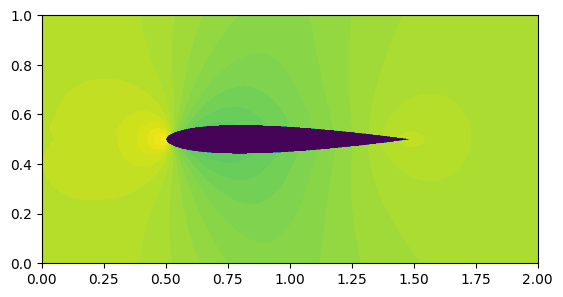

In [7]:
plt.figure()
plt.contourf(x_grid[:,0,:],y_grid[:,0,:],ue,60)
#plt.pcolor(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.colorbar(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.scatter(x_int_train[:,1],)
#plt.pcolor(x[:],u[:,1])
#plt.pcolor(x[:],u[:,2])
ax = plt.gca()
ax.set_aspect(1)
plt.show()
plt.savefig("Riemann2.pdf", dpi=150)


In [85]:
            #fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#surf = ax.plot_surface(x_grid[:,0,:], y_grid[:,0,:], ue, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)
#
## Customize the z axis.
#ax.set_zlim(0, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
## A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')
#
## Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.show()

In [ ]:
xlimits = np.array([[0.,Tend],[0.0, 3], [0.0,3]])  #interal
sampling = LHS(xlimits=xlimits)
x_int_train = sampling(num_int)
A = []
for i in range(num_int):
    x = x_int_train[i,1]
    y = x_int_train[i,2]
    if (x< 0.5 and y< 1.5):
        A.append(i)
x_int_train = np.delete(x_int_train,A,axis=0)

In [ ]:
plt.figure()
plt.scatter(x_int_train[1:1000,1],x_int_train[1:1000,2])
#plt.pcolor(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.colorbar(x_grid[:,0,:],y_grid[:,0,:],ue)
#plt.scatter(x_int_train[:,1],)
#plt.pcolor(x[:],u[:,1])
#plt.pcolor(x[:],u[:,2])
ax = plt.gca()
ax.set_aspect(1)
plt.show()

In [ ]:
torch.save(model,'2DRiemanncase8.pt')

In [ ]:
model

In [ ]:
#device1 = torch.device("cpu")
#model.load_state_dict(torch.load(PATH))
#model = model.to(device1)
#torch.save(model,'2DRiemanncase8.pt')
model = torch.load('2DRiemanncase8.pt')

In [ ]:
model